In [1]:
from collections import defaultdict
from collections import Counter
from IPython.display import display, HTML
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from os import path
import pandas as pd
from PIL import Image
import re
import requests
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
sns.set()

##### first, use the AO3 scraper (https://github.com/radiolarian/AO3Scraper) to get the metadata

##### get the work IDs

In [2]:
'''!python3 AO3Scraper/ao3_work_ids.py \
https://archiveofourown.org/tags/Timeless%20\(TV%202016\)/works \
    --out_csv all_fic_ids'''

processing...

................................................................................................That's all, folks.


##### then get the metadata and text

##### NB: this step takes about 3 hours.

In [3]:
'''!python3 AO3Scraper/ao3_get_fanfics.py all_fic_ids.csv \
--csv all_fics_with_summaries.csv'''

Writing a header row for the csv.
Scraping  13235889
Done.
Scraping  18003980
Done.
Scraping  16218182
Done.
Scraping  17999975
Done.
Scraping  16299755
Done.
Scraping  15048743
Done.
Scraping  17476628
Done.
Scraping  16769359
Done.
Scraping  17902007
Done.
Scraping  17978879
Done.
Scraping  16341452
Done.
Scraping  15292356
Done.
Scraping  17731016
Done.
Scraping  14955140
Done.
Scraping  17111198
Done.
Scraping  15283815
Done.
Scraping  14961737
Done.
Scraping  17161190
Done.
Scraping  17519039
Done.
Scraping  17963891
Done.
Scraping  17897291
Done.
Scraping  17966249
Done.
Scraping  16607378
Done.
Scraping  14909622
Done.
Scraping  17964611
Done.
Scraping  17964386
Done.
Scraping  17963405
Done.
Scraping  17956196
Done.
Scraping  16602494
Done.
Scraping  15297498
Done.
Scraping  14425692
Done.
Scraping  17038478
Done.
Scraping  17842247
Done.
Scraping  17808230
Done.
Scraping  17826446
Done.
Scraping  16445045
Done.
Scraping  17630246
Done.
Scraping  17903153
Done.
Scraping  179010

Done.
Scraping  16837681
Done.
Scraping  16837846
Done.
Scraping  16845310
Done.
Scraping  16565171
Done.
Scraping  14197638
Done.
Scraping  16827856
Done.
Scraping  16821688
Done.
Scraping  16817338
Done.
Scraping  16817227
Done.
Scraping  16807819
Done.
Scraping  16809673
Done.
Scraping  16760725
Done.
Scraping  16810621
Done.
Scraping  16808398
Done.
Scraping  16806376
Done.
Scraping  16804654
Done.
Scraping  16788133
Done.
Scraping  16782106
Done.
Scraping  15085127
Done.
Scraping  16776127
Done.
Scraping  16761685
Done.
Scraping  16754977
Done.
Scraping  16745050
Done.
Scraping  15779094
Done.
Scraping  16717463
Done.
Scraping  16713508
Done.
Scraping  16704649
Done.
Scraping  16704589
Done.
Scraping  16699969
Done.
Scraping  16625588
Done.
Scraping  16687120
Done.
Scraping  16676398
Done.
Scraping  14906831
Done.
Scraping  16667944
Done.
Scraping  16663162
Done.
Scraping  16660669
Done.
Scraping  16659664
Done.
Scraping  16651639
Done.
Scraping  16606277
Done.
Scraping  16406600


Done.
Scraping  15378021
Done.
Scraping  15827031
Done.
Scraping  15821121
Done.
Scraping  15823200
Done.
Scraping  15821706
Done.
Scraping  15812130
Done.
Scraping  15815958
Done.
Scraping  15814533
Done.
Scraping  15814011
Done.
Scraping  15809775
Done.
Scraping  15813630
Done.
Scraping  15808770
Done.
Scraping  15799692
Done.
Scraping  15798282
Done.
Scraping  15797658
Done.
Scraping  15795243
Done.
Scraping  15795090
Done.
Scraping  15794883
Done.
Scraping  15794679
Done.
Scraping  15789543
Done.
Scraping  15789171
Done.
Scraping  15788598
Done.
Scraping  15784323
Done.
Scraping  15778146
Done.
Scraping  15775599
Done.
Scraping  14691666
Done.
Scraping  15774387
Done.
Scraping  15515085
Done.
Scraping  15773676
Done.
Scraping  15773550
Done.
Scraping  15773364
Done.
Scraping  15728193
Done.
Scraping  15766800
Done.
Scraping  15765504
Done.
Scraping  15764100
Done.
Scraping  15763968
Done.
Scraping  15763749
Done.
Scraping  15761517
Done.
Scraping  15752979
Done.
Scraping  15757554


Done.
Scraping  14922702
Done.
Scraping  14918846
Done.
Scraping  14859347
Done.
Scraping  14916551
Done.
Scraping  11585289
Done.
Scraping  14905952
Done.
Scraping  14905628
Done.
Scraping  14904983
Done.
Scraping  14901185
Done.
Scraping  14900663
Done.
Scraping  14900003
Done.
Scraping  14899533
Done.
Scraping  14720160
Done.
Scraping  14899121
Done.
Scraping  14898752
Done.
Scraping  14896338
Done.
Scraping  14895099
Done.
Scraping  14893517
Done.
Scraping  14892773
Done.
Scraping  14891924
Done.
Scraping  14888696
Done.
Scraping  14888390
Done.
Scraping  14888109
Done.
Scraping  14887886
Done.
Scraping  14883843
Done.
Scraping  14883725
Done.
Scraping  14880621
Done.
Scraping  14879901
Done.
Scraping  14209413
Done.
Scraping  14878658
Done.
Scraping  14877017
Done.
Scraping  14876651
Done.
Scraping  14876561
Done.
Scraping  14873987
Done.
Scraping  14873600
Done.
Scraping  14813622
Done.
Scraping  14872479
Done.
Scraping  14872149
Done.
Scraping  14871953
Done.
Scraping  14871327


Done.
Scraping  14395050
Done.
Scraping  14393661
Done.
Scraping  14393691
Done.
Scraping  14392239
Done.
Scraping  14392044
Done.
Scraping  14341536
Done.
Scraping  14381019
Done.
Scraping  14379324
Done.
Scraping  14377395
Done.
Scraping  14373318
Done.
Scraping  14375874
Done.
Scraping  14370519
Done.
Scraping  14367873
Done.
Scraping  14361999
Done.
Scraping  14362143
Done.
Scraping  14361492
Done.
Scraping  14360307
Done.
Scraping  14358939
Done.
Scraping  14358417
Done.
Scraping  14357607
Done.
Scraping  14120217
Done.
Scraping  14354490
Done.
Scraping  14353212
Done.
Scraping  14294391
Done.
Scraping  14075280
Done.
Scraping  10136414
Done.
Scraping  14331972
Done.
Scraping  10452438
Done.
Scraping  14336532
Done.
Scraping  14336475
Done.
Scraping  14334840
Done.
Scraping  14328078
Done.
Scraping  14324724
Done.
Scraping  14319021
Done.
Scraping  14318322
Done.
Scraping  14316312
Done.
Scraping  14316273
Done.
Scraping  14314719
Done.
Scraping  14310297
Done.
Scraping  14310906


Scraping  11048475
Done.
Scraping  11044452
Done.
Scraping  11018379
Done.
Scraping  11017194
Done.
Scraping  11014119
Done.
Scraping  11012355
Done.
Scraping  11005014
Done.
Scraping  11001795
Done.
Scraping  10959741
Done.
Scraping  10572087
Done.
Scraping  10054478
Done.
Scraping  10986111
Done.
Scraping  10983393
Done.
Scraping  10535493
Done.
Scraping  10969791
Done.
Scraping  10948239
Done.
Scraping  10930629
Done.
Scraping  10930503
Done.
Scraping  10151093
Done.
Scraping  10914273
Done.
Scraping  10555298
Done.
Scraping  10894266
Done.
Scraping  10893105
Done.
Scraping  10519701
Done.
Scraping  10546190
Done.
Scraping  10879353
Done.
Scraping  10872474
Done.
Scraping  10868295
Done.
Scraping  10862301
Done.
Scraping  10861614
Done.
Scraping  10851309
Done.
Scraping  10852770
Done.
Scraping  10852401
Done.
Scraping  10847583
Done.
Scraping  10847358
Done.
Scraping  10828683
Done.
Scraping  10825314
Done.
Scraping  10823397
Done.
Scraping  10818603
Done.
Scraping  10809561
Done.


##### split off the metadata

In [4]:
'''!python3 AO3Scraper/extras/extract_metadata.py all_fics_with_summaries'''

##### the metadata is saved as all_fics_with_summaries_metadata.csv

##### load the metadata

In [2]:
md = pd.read_csv("all_fics_with_summaries_metadata.csv")

In [3]:
md.head()

work_id                      title            author  \
0  13235889               Phase Change    Mack_the_Spoon   
1  18003980  Not an Instruction Manual           RedGold   
2  16218182              Rain or Shine       llmarmalade   
3  17999975          What Lies Beneath          MajorSam   
4  16299755                      Q & A  Somekindofflower   

                  rating  category              fandom  \
0  Teen And Up Audiences  F/M, Gen  Timeless (TV 2016)   
1  Teen And Up Audiences       F/M  Timeless (TV 2016)   
2                 Mature       F/M  Timeless (TV 2016)   
3                 Mature       F/M  Timeless (TV 2016)   
4  Teen And Up Audiences       F/M  Timeless (TV 2016)   

                                        relationship  \
0                           Wyatt Logan/Lucy Preston   
1                 Garcia Flynn/Original Character(s)   
2  Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy P...   
3  Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy P...   
4                          Garcia Flynn/Lucy Preston   

                                           character  \
0  Lucy Preston, Wyatt Logan, Rufus Carlin, Emma ...   
1  Garcia Flynn, Original Characters, Lucy Presto...   
2                       Jiya (Timeless), Amy Preston   
3                          Lucy Preston, Wyatt Logan   
4                         Garcia Flynn, Lucy Preston   

                                     additional tags language   published  \
0                      Alternate Universe - Werewolf  English  2018-01-01   
1  Prompt Fic, Canon Divergent, Flynn needs a hug...  English  2019-03-05   
2  Unplanned Pregnancy, Angst with a Happy Ending...  English  2018-10-07   
3  lyatt, Date Night, suprises, Lucy you little m...  English  2019-03-04   
4  Pre-Relationship, Slow Burn, Friends to Lovers...  English  2018-10-14   

      status status date  words chapters  comments  kudos  bookmarks    hits  \
0    Updated  2019-03-05  93629     18/?      60.0   49.0        4.0  2159.0   
1  Completed  2019-03-05  11100      1/1       3.0    7.0        NaN    47.0   
2    Updated  2019-03-04  24680      4/?      27.0   42.0       10.0   866.0   
3  Completed  2019-03-04   6471      1/1       6.0   15.0        1.0   227.0   
4    Updated  2019-03-04   5696      3/?      32.0  111.0        9.0   646.0   

                                             summary  
0  Following the big revelation of her status to ...  
1  Sequel to 'In Case You Forget Her' Now that Fl...  
2  It was her luck that the guy she had to work w...  
3  Something was going on with Lucy. Wyatt could ...  
4  It's not romantic. ...It's not un romantic, ei...

##### explore the data

In [4]:
md.shape

(1881, 20)

In [5]:
len(md["author"].unique())

442

In [6]:
np.sum(md["words"])

12332590

##### 12,332,590 words in 1,881 fics by 442 authors

##### compile # fics, # words, # hits, and # unique authors by date

In [7]:
md["status date"].head()

0    2019-03-05
1    2019-03-05
2    2019-03-04
3    2019-03-04
4    2019-03-04
Name: status date, dtype: object

##### count = 1 is a hack to make getting the cumulative number of fics easier

In [8]:
md["count"] = 1

##### convert the date to month, and put it in the format we need: each date is essentially "rounded" to the first of its month

In [9]:
md["date"] = md["status date"].astype('datetime64[M]')

In [10]:
md["date"].head()

0   2019-03-01
1   2019-03-01
2   2019-03-01
3   2019-03-01
4   2019-03-01
Name: date, dtype: datetime64[ns]

In [11]:
md.sort_values("date").head()

work_id                                            title  \
1880  8205764           Pros and Cons of Being a Time Traveler   
1865  8426842                             A Random Observation   
1866  8415688                                   Sex in the 70s   
1867  8417449                                   Learning curve   
1868  8408449  Clothes Make the Man (but Don't Make the Woman)   

                     author                 rating  category  \
1880             TuesdayToo  Teen And Up Audiences       Gen   
1865  writingfromdarkplaces      General Audiences  F/M, Gen   
1866              DizzyDrea               Explicit       F/M   
1867        SnufflestheBear      General Audiences       Gen   
1868  writingfromdarkplaces      General Audiences       F/M   

                                     fandom              relationship  \
1880  Timeless - Fandom, Timeless (TV 2016)                       NaN   
1865                     Timeless (TV 2016)  Wyatt Logan/Lucy Preston   
1866                     Timeless (TV 2016)  Wyatt Logan/Lucy Preston   
1867                     Timeless (TV 2016)                       NaN   
1868                     Timeless (TV 2016)  Wyatt Logan/Lucy Preston   

                                              character  \
1880            Lucy Preston, Wyatt Logan, Rufus Carlin   
1865                        Lucy Preston, Carol Preston   
1866  Wyatt Logan, Lucy Preston, Rufus Carlin, Denis...   
1867            Rufus Carlin, Wyatt Logan, Lucy Preston   
1868                          Wyatt Logan, Lucy Preston   

                                        additional tags language    ...      \
1880                                                NaN  English    ...       
1865  Mother-Daughter Relationship, Friendship, Pre-...  English    ...       
1866  Sex, Sex Pollen, Time Travel, Romance, Trope B...  English    ...       
1867  Team Bonding, Friendship, Rufus is a big scien...  English    ...       
1868                                   Pre-Relationship  English    ...       

     status date words chapters  comments  kudos  bookmarks    hits  \
1880  2016-10-04  1006      1/1      11.0   56.0        2.0  1353.0   
1865  2016-10-31   460      1/1      12.0  246.0       11.0  3241.0   
1866  2016-10-30  1728      1/1      17.0  247.0       35.0  6550.0   
1867  2016-10-30  2056      3/3      24.0  149.0       14.0  1301.0   
1868  2016-10-29   243      1/1       5.0  140.0        9.0  2234.0   

                                                summary  count       date  
1880  Time traveling has its perks ...And its not-so...      1 2016-10-01  
1865  Lucy's mother and her friend have a surprising...      1 2016-10-01  
1866  The anti-war protest turning into a riot wasn'...      1 2016-10-01  
1867  They’re getting to know each other, and they t...      1 2016-10-01  
1868  Wyatt never thought about fashion much before,...      1 2016-10-01  

[5 rows x 22 columns]

##### first, count the cumulative number of fics by each month

In [12]:
by_date = pd.DataFrame(md.groupby('date')["count"].sum().cumsum())

In [13]:
by_date.head()

count
date             
2016-10-01     16
2016-11-01     32
2016-12-01     47
2017-01-01     70
2017-02-01    117

##### that looks reasonable

##### add the number of words and the number of hits

In [14]:
by_date["words"] = md.groupby('date')["words"].sum().cumsum()
by_date["hits"] = md.groupby('date')["hits"].sum().cumsum()

In [15]:
by_date.head()

count   words      hits
date                               
2016-10-01     16   24586   30025.0
2016-11-01     32   53864   50837.0
2016-12-01     47   96909   78893.0
2017-01-01     70  203760  110054.0
2017-02-01    117  396037  181902.0

##### we need something a little more elaborate to get the cumulative number of unique authors by month

##### can we pull out all fics last updated by a certain date? 

##### while we're looking at it, how many of the fics in the fandom are completed vs. in-progress?

In [16]:
md["status"].value_counts()

Completed    1637
Updated       244
Name: status, dtype: int64

In [17]:
md["status"].value_counts(normalize=True)

Completed    0.870282
Updated      0.129718
Name: status, dtype: float64

##### nearly 90% are completed, so we should be safe using the status date

In [18]:
md.loc[md["date"] <= "2016-10-01",:].head()

work_id                                            title  \
1865  8426842                             A Random Observation   
1866  8415688                                   Sex in the 70s   
1867  8417449                                   Learning curve   
1868  8408449  Clothes Make the Man (but Don't Make the Woman)   
1869  8387116              It's in a Movie, So It Must Be True   

                     author             rating  category              fandom  \
1865  writingfromdarkplaces  General Audiences  F/M, Gen  Timeless (TV 2016)   
1866              DizzyDrea           Explicit       F/M  Timeless (TV 2016)   
1867        SnufflestheBear  General Audiences       Gen  Timeless (TV 2016)   
1868  writingfromdarkplaces  General Audiences       F/M  Timeless (TV 2016)   
1869  writingfromdarkplaces  General Audiences  F/M, Gen  Timeless (TV 2016)   

                  relationship  \
1865  Wyatt Logan/Lucy Preston   
1866  Wyatt Logan/Lucy Preston   
1867                       NaN   
1868  Wyatt Logan/Lucy Preston   
1869  Wyatt Logan/Lucy Preston   

                                              character  \
1865                        Lucy Preston, Carol Preston   
1866  Wyatt Logan, Lucy Preston, Rufus Carlin, Denis...   
1867            Rufus Carlin, Wyatt Logan, Lucy Preston   
1868                          Wyatt Logan, Lucy Preston   
1869            Wyatt Logan, Rufus Carlin, Lucy Preston   

                                        additional tags language    ...      \
1865  Mother-Daughter Relationship, Friendship, Pre-...  English    ...       
1866  Sex, Sex Pollen, Time Travel, Romance, Trope B...  English    ...       
1867  Team Bonding, Friendship, Rufus is a big scien...  English    ...       
1868                                   Pre-Relationship  English    ...       
1869  Friendship, Teasing, Jealousy, Some Humor, Pre...  English    ...       

     status date words chapters  comments  kudos  bookmarks    hits  \
1865  2016-10-31   460      1/1      12.0  246.0       11.0  3241.0   
1866  2016-10-30  1728      1/1      17.0  247.0       35.0  6550.0   
1867  2016-10-30  2056      3/3      24.0  149.0       14.0  1301.0   
1868  2016-10-29   243      1/1       5.0  140.0        9.0  2234.0   
1869  2016-10-26   359      1/1       8.0  232.0       12.0  3752.0   

                                                summary  count       date  
1865  Lucy's mother and her friend have a surprising...      1 2016-10-01  
1866  The anti-war protest turning into a riot wasn'...      1 2016-10-01  
1867  They’re getting to know each other, and they t...      1 2016-10-01  
1868  Wyatt never thought about fashion much before,...      1 2016-10-01  
1869  Wyatt decides he's lucky Lucy is too distracte...      1 2016-10-01  

[5 rows x 22 columns]

In [19]:
len(md.loc[md["date"] <= "2016-10-01","author"].unique())

9

##### set up the authors column

In [20]:
by_date["authors"] = np.nan

In [21]:
by_date.reset_index(inplace=True)

##### for each month, add the cumulative number of authors

In [22]:
for date in md["date"].unique():
    
    #print(date)
    
    chunk = md.loc[md["date"] <= date,:]
    #print(len(chunk))
    
    authors = chunk["author"].unique()
    #print(len(authors))
    
    by_date.loc[by_date["date"] == date, "authors"] = len(authors)

In [23]:
by_date.head()

date  count   words      hits  authors
0 2016-10-01     16   24586   30025.0      9.0
1 2016-11-01     32   53864   50837.0     17.0
2 2016-12-01     47   96909   78893.0     30.0
3 2017-01-01     70  203760  110054.0     47.0
4 2017-02-01    117  396037  181902.0     73.0

##### okay, that looks reasonable

In [24]:
by_date.tail()

date  count     words       hits  authors
25 2018-11-01   1538   8040263  1471107.0    399.0
26 2018-12-01   1694   9222734  1563968.0    419.0
27 2019-01-01   1763   9853724  1615354.0    429.0
28 2019-02-01   1853  11474992  1709381.0    437.0
29 2019-03-01   1881  12332590  1747727.0    442.0

##### that also looks reasonable

In [25]:
by_date

date  count     words       hits  authors
0  2016-10-01     16     24586    30025.0      9.0
1  2016-11-01     32     53864    50837.0     17.0
2  2016-12-01     47     96909    78893.0     30.0
3  2017-01-01     70    203760   110054.0     47.0
4  2017-02-01    117    396037   181902.0     73.0
5  2017-03-01    178    645790   268699.0     94.0
6  2017-04-01    200    723690   303066.0     99.0
7  2017-05-01    242    876303   348891.0    109.0
8  2017-06-01    269    973908   381958.0    113.0
9  2017-07-01    296   1122731   413042.0    117.0
10 2017-08-01    308   1163451   424923.0    121.0
11 2017-09-01    322   1314703   446699.0    127.0
12 2017-10-01    328   1355242   453286.0    128.0
13 2017-11-01    340   1494212   463332.0    131.0
14 2017-12-01    362   1654945   483073.0    146.0
15 2018-01-01    389   1752747   504782.0    149.0
16 2018-02-01    416   2030002   549801.0    153.0
17 2018-03-01    482   2348873   638298.0    174.0
18 2018-04-01    614   2856382   780447.0    228.0
19 2018-05-01    811   3867896   984734.0    294.0
20 2018-06-01    980   4733621  1138176.0    334.0
21 2018-07-01   1089   5223928  1206694.0    352.0
22 2018-08-01   1232   6067558  1283523.0    363.0
23 2018-09-01   1368   6715792  1362486.0    375.0
24 2018-10-01   1469   7200011  1415396.0    389.0
25 2018-11-01   1538   8040263  1471107.0    399.0
26 2018-12-01   1694   9222734  1563968.0    419.0
27 2019-01-01   1763   9853724  1615354.0    429.0
28 2019-02-01   1853  11474992  1709381.0    437.0
29 2019-03-01   1881  12332590  1747727.0    442.0

##### make a list of significant dates in series history

In [26]:
events = pd.DataFrame({"event" : ["1.01","1.02","1.03","1.04","1.05",
              "1.06","1.07","1.08","1.09","1.10","1.11",
              "1.12","1.13","1.14","1.15","1.16",
              "Canceled","Renewed","2.01","2.02",
              "2.03","2.04","2.05","2.06","2.07","2.08",
             "2.09","2.10","Canceled",
              "Finale \nannounced","Finale"],
             "date" : ["2016-10-03","2016-10-10",
              "2016-10-17","2016-10-24","2016-10-31",
             "2016-11-14","2016-11-21","2016-11-28",
             "2016-12-05","2016-12-12","2017-01-16",
             "2017-01-23","2017-01-30","2017-02-06",
             "2017-02-13","2017-02-20","2017-05-10",
             "2017-05-13","2018-03-11","2018-03-18",
             "2018-03-25","2018-04-08","2018-04-15",
             "2018-04-22","2018-04-29","2018-05-06",
             "2018-05-13","2018-05-13","2018-06-22",
             "2018-07-31","2018-12-20"],
                      "type" : ["ep","ep","ep","ep","ep","ep","ep","ep","ep","ep","ep","ep",
                      "ep","ep","ep","ep","announcement","announcement",
                      "ep","ep","ep","ep","ep","ep","ep","ep","ep","ep","announcement",
                      "announcement","finale"],
                      "y" : [1100,1100,1100,1100,1100,1100,1100,1100,
                            1100,1100,1100,1100,1100,1100,1100,1100,
                            1100,1200,
                            1100,1100,1100,1100,1100,1100,1100,1100,
                            1100,1100,
                            1100,1200,1100]})

In [27]:
len(events)

31

In [28]:
events["date"] = pd.to_datetime(events["date"])

In [29]:
events.head()

date event type     y
0 2016-10-03  1.01   ep  1100
1 2016-10-10  1.02   ep  1100
2 2016-10-17  1.03   ep  1100
3 2016-10-24  1.04   ep  1100
4 2016-10-31  1.05   ep  1100

##### now, plot the total number of fics

''

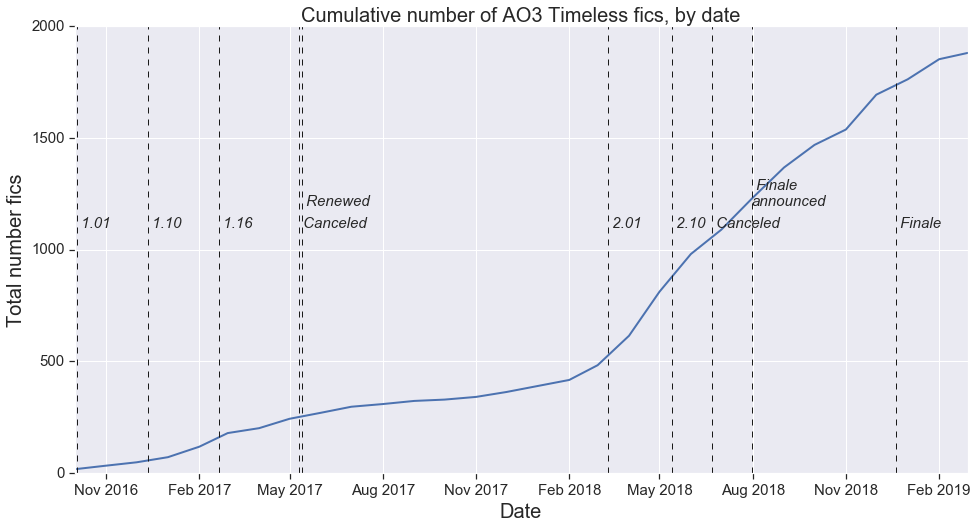

In [30]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(by_date["date"], by_date["count"], linestyle="-", linewidth=2)

ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Total number fics", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15, top=False, right=False)
ax.set_title("Cumulative number of AO3 Timeless fics, by date", fontsize=20)

for index, row in events.iterrows():
    
    if row["type"] != "ep" or row["event"] == "1.01" or row["event"] == "1.10" or\
    row["event"] == "1.16" or row["event"] == "2.01" or row["event"] == "2.10":
    
        ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
        ax.text(row["date"], row["y"], (" " + row["event"]), fontsize=15, style="italic")
;

''

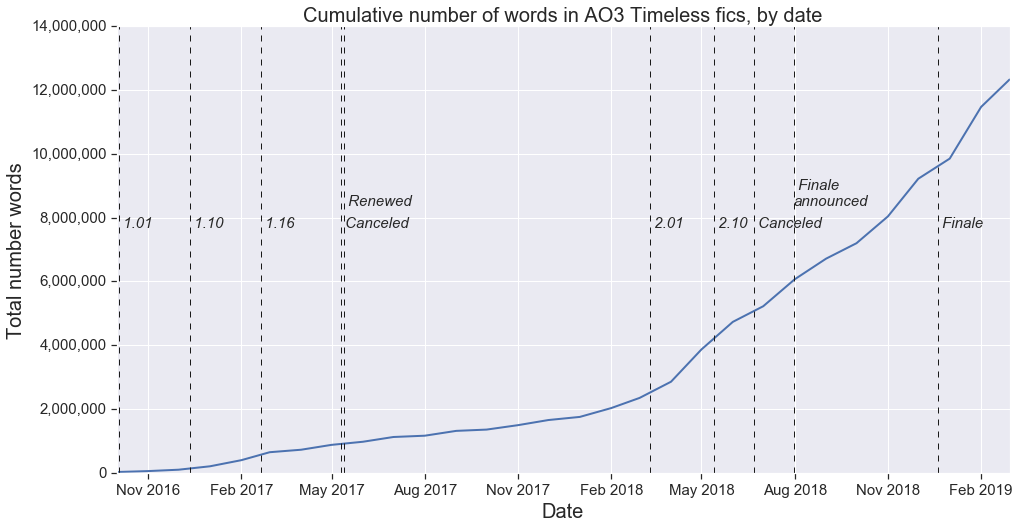

In [31]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(by_date["date"], by_date["words"], linestyle="-", linewidth=2)

ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Total number words", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15, top=False, right=False)
ax.set_title("Cumulative number of words in AO3 Timeless fics, by date", fontsize=20)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for index, row in events.iterrows():
    
    if row["type"] != "ep" or row["event"] == "1.01" or row["event"] == "1.10" or\
    row["event"] == "1.16" or row["event"] == "2.01" or row["event"] == "2.10":
    
        ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
        ax.text(row["date"], row["y"]*7000, (" " + row["event"]), fontsize=15, style="italic")
;

''

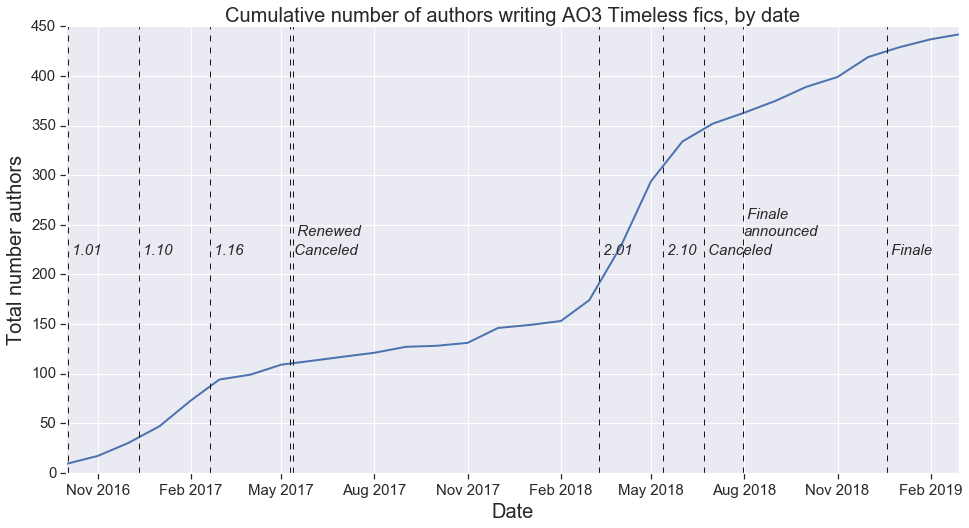

In [32]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(by_date["date"], by_date["authors"], linestyle="-", linewidth=2)

ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Total number authors", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15, top=False, right=False)
ax.set_title("Cumulative number of authors writing AO3 Timeless fics, by date", fontsize=20)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for index, row in events.iterrows():
    
    if row["type"] != "ep" or row["event"] == "1.01" or row["event"] == "1.10" or\
    row["event"] == "1.16" or row["event"] == "2.01" or row["event"] == "2.10":
    
        ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
        ax.text(row["date"], row["y"]/5, (" " + row["event"]), fontsize=15, style="italic")
;

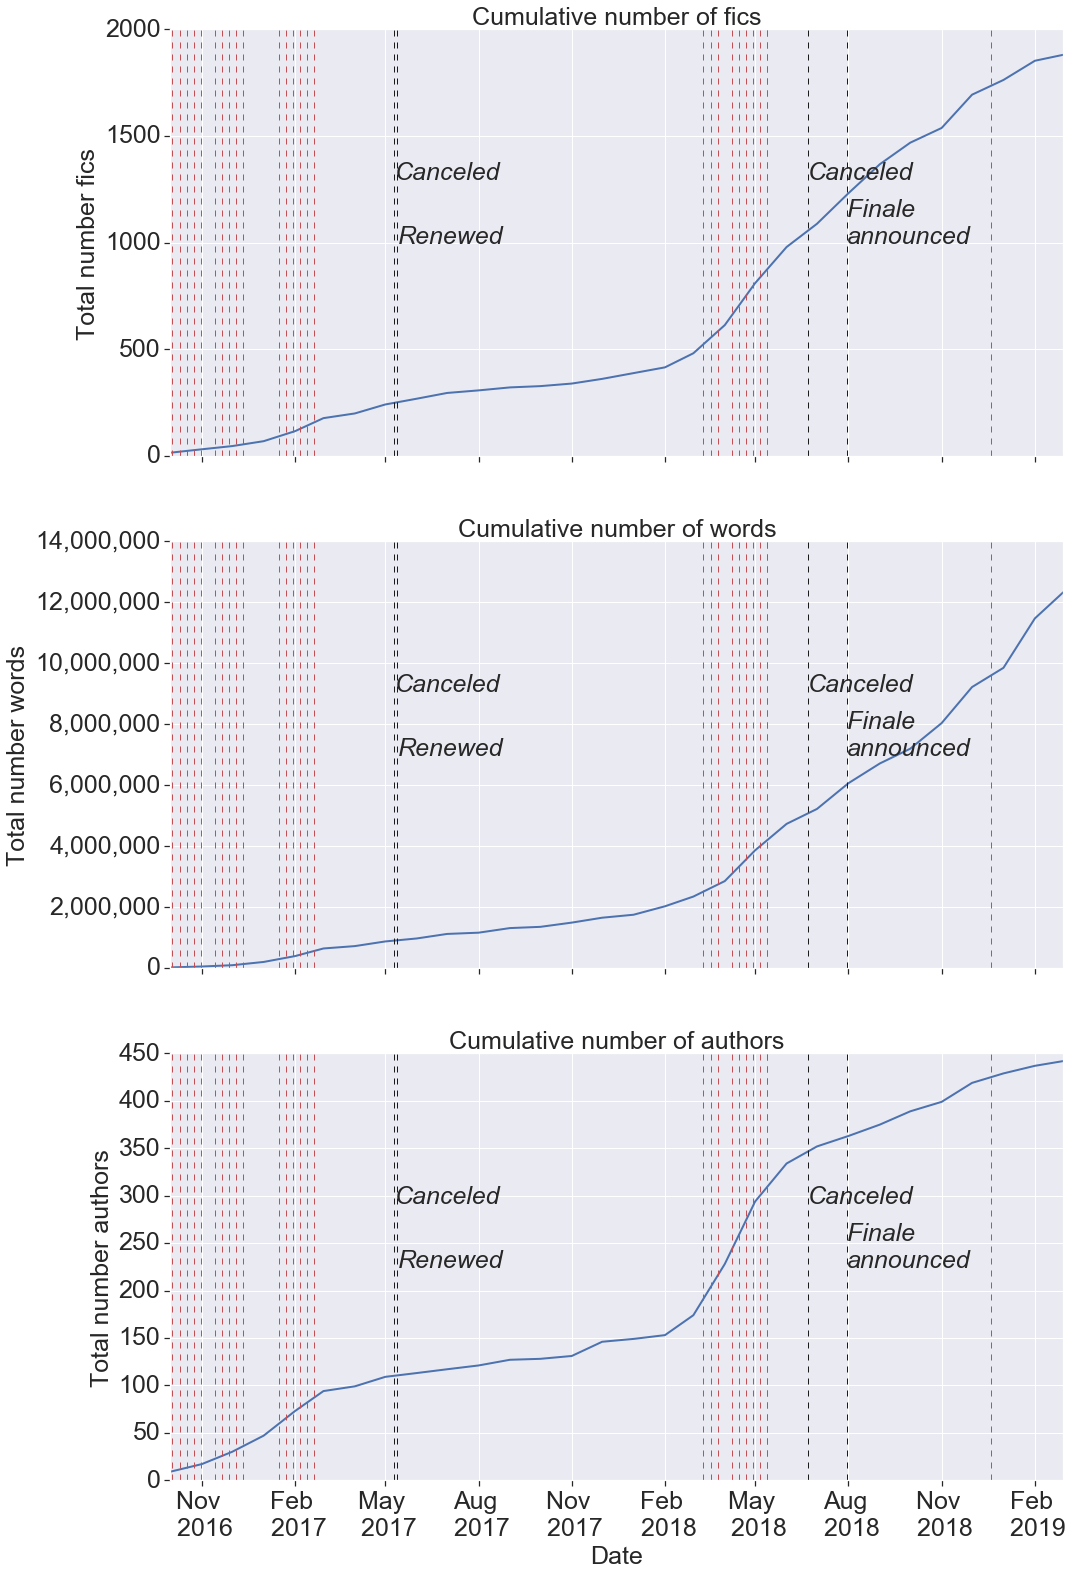

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize = (16, 26))

axes[0].plot(by_date["date"], by_date["count"], linestyle="-", linewidth=2)
axes[0].set_ylabel("Total number fics", fontsize=25)
axes[0].set_title("Cumulative number of fics", fontsize=25)

axes[1].plot(by_date["date"], by_date["words"], linestyle="-", linewidth=2)
axes[1].set_ylabel("Total number words", fontsize=25)
axes[1].set_title("Cumulative number of words", fontsize=25)
axes[1].get_yaxis().get_major_formatter().set_scientific(False)
axes[1].get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

axes[2].plot(by_date["date"], by_date["authors"], linestyle="-", linewidth=2)
axes[2].set_ylabel("Total number authors", fontsize=25)
axes[2].set_title("Cumulative number of authors", 
                  fontsize=25)

axes[2].set_xlabel("Date", fontsize=25)
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b \n %Y'))

for ax_index, ax in enumerate(axes):
    ax.tick_params(axis='both', which='major', labelsize=25, top=False, right=False)
    
    for index, row in events.iterrows():
        
        if row["type"] == "ep" or row["type"] == "finale":
            
            ax.axvline(x=row["date"], color='r', linewidth=1, linestyle="--")
                
        elif row["type"] == "announcement" and row["event"] == "Canceled":
            
            ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
            ax.text(row["date"], 0.65, 
                    (row["event"]), fontsize=25, style="italic", 
                    transform=ax.get_xaxis_transform())
            
        else:
            
            ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
            ax.text(row["date"], 0.5, 
                    (row["event"]), fontsize=25, style="italic", 
                    transform=ax.get_xaxis_transform())

#plt.savefig("cumulative_fics_words_authors.png", bbox_inches="tight");

##### now, what about the wild and wonderful world that is the additional tags?

In [34]:
md["additional tags"]

0                           Alternate Universe - Werewolf
1       Prompt Fic, Canon Divergent, Flynn needs a hug...
2       Unplanned Pregnancy, Angst with a Happy Ending...
3       lyatt, Date Night, suprises, Lucy you little m...
4       Pre-Relationship, Slow Burn, Friends to Lovers...
5                                                     NaN
6       Alternate Timelines, Fluff and Angst, Rufus Ca...
7       Prompt Fill, Ficlet Collection, Because I need...
8       Marriage of Convenience, The AU that like two ...
9                                           Smut, Bondage
10                       Angst with a Happy Ending, Fluff
11      Fluff and Angst, Angst and Hurt/Comfort, Angst...
12      Alternate Universe - Vampire, Alternate Univer...
13              Ficlet Collection, Cross-Posted on Tumblr
14      slight slow burn, Mutual Pining, Smut, Sex, Or...
15      Shameless Smut, Rough Sex, Vaginal Fingering, ...
16                                                    NaN
17      Altern

In [35]:
np.sum(md["additional tags"].str.contains("Fluff", case=False, regex=False))

412

In [36]:
np.sum(md["additional tags"].str.contains("Angst", case=False, regex=False))

414

In [37]:
np.sum(md["additional tags"].str.contains("Smut", case=False, regex=False))

130

##### first, I need to expand the tags for each fic, and clean them up

##### I'll also make everything lower case. It won't look as nice, but it'll collapse duplicates.

In [38]:
tags_df = md["additional tags"].str.lower().str.split(",", expand=True)

In [39]:
tags_df.shape

(1881, 76)

In [40]:
tags_df_clean = tags_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [41]:
tags_df_clean

0   \
0                         alternate universe - werewolf   
1                                            prompt fic   
2                                   unplanned pregnancy   
3                                                 lyatt   
4                                      pre-relationship   
5                                                   NaN   
6                                   alternate timelines   
7                                           prompt fill   
8                               marriage of convenience   
9                                                  smut   
10                            angst with a happy ending   
11                                      fluff and angst   
12                         alternate universe - vampire   
13                                    ficlet collection   
14                                     slight slow burn   
15                                       shameless smut   
16                                                  NaN   
17                alternate universe - canon divergence   
18                                            crossover   
19                                                whump   
20                           canon lesbian relationship   
21                                      hurt no comfort   
22                                                angst   
23                                          stargate au   
24                                                fluff   
25                                                lyatt   
26                                       domestic fluff   
27                                                fluff   
28                                                  NaN   
29                                               family   
...                                                 ...   
1851                                            rescues   
1852                      2016 us presidential election   
1853                              post-season/series 03   
1854                                                NaN   
1855                                       team bonding   
1856                                      introspection   
1857                                   pre-relationship   
1858                                         friendship   
1859                                                NaN   
1860                     robert todd lincoln - freeform   
1861                                      jessica lives   
1862                                       team bonding   
1863                                         friendship   
1864                                       hurt/comfort   
1865                       mother-daughter relationship   
1866                                                sex   
1867                                       team bonding   
1868                                   pre-relationship   
1869                                         friendship   
1870                                         friendship   
1871              alternate universe - canon divergence   
1872  movie night where our heroes watch the james b...   
1873                                   pre-relationship   
1874                                mentions of alcohol   
1875                                                NaN   
1876                                   timeless tv show   
1877                                                NaN   
1878                                          post-1x02   
1879                           spoilers for episode two   
1880                                                NaN   

                                                   1   \
0                                                None   
1                                     canon divergent   
2                           angst with a happy ending   
3                                          date night   
4                                           slow burn   
5                                                 Na

In [42]:
tags_df_clean.fillna("None", inplace=True)

In [43]:
tags_df_clean.values.flatten()

array(['alternate universe - werewolf', 'None', 'None', ..., 'None',
       'None', 'None'], dtype=object)

In [44]:
pd.Series(tags_df_clean.values.flatten()).value_counts()

None                                                                 133397
fluff                                                                   242
angst                                                                   225
hurt/comfort                                                            146
garcy                                                                   133
romance                                                                  99
friendship                                                               87
angst with a happy ending                                                85
lyatt                                                                    78
alternate universe - canon divergence                                    73
emotional hurt/comfort                                                   67
friendship/love                                                          66
humor                                                                    65
smut        

In [45]:
pd.Series(tags_df_clean.values.flatten()).shape

(142956,)

##### how often do these unique tags occur?

In [46]:
pd.Series(tags_df_clean.values.flatten()).value_counts()

None                                                                 133397
fluff                                                                   242
angst                                                                   225
hurt/comfort                                                            146
garcy                                                                   133
romance                                                                  99
friendship                                                               87
angst with a happy ending                                                85
lyatt                                                                    78
alternate universe - canon divergence                                    73
emotional hurt/comfort                                                   67
friendship/love                                                          66
humor                                                                    65
smut        

In [47]:
all_alt_tags = pd.Series(tags_df_clean.values.flatten()).value_counts()

In [48]:
all_alt_tags.to_dict()

{'so many garcy moments': 1,
 'and rufus just wants a snack': 1,
 'no romance': 2,
 'implied future garcy. like as in when flynn knew lucy in the future they were more than friends': 1,
 'fighter pilots': 1,
 'epistolary': 1,
 'lgbtq character(s) of color': 1,
 'alternate reality': 1,
 'crossing timelines': 1,
 'war crimes': 1,
 'sex in a car': 1,
 'post episode': 3,
 '5+1 things': 3,
 'the murder ent very nearly gets to blow half the cast up and it makes his night': 1,
 'slow burn ish': 1,
 'infertility': 1,
 'i apologize if this sucks': 1,
 'episode: s02e10 chinatown': 6,
 'ghosts': 2,
 'attempt at humor': 2,
 'flirting': 15,
 'flynn himself is a kink': 1,
 'books': 1,
 'physical/domestic/psychological abuse (lyatt)': 1,
 'gratuious use of mistletoe': 1,
 'flynn is smitten': 1,
 'wyatt is not a jealous jerk': 1,
 'little bit of angst': 2,
 'yuletide treat': 2,
 'femslash february': 3,
 'mentions of gore': 1,
 'it has a dick punch...enter at your own peril': 1,
 "is this because i'm s

In [49]:
np.sum(all_alt_tags > 20)

47

In [50]:
all_alt_tags[all_alt_tags > 20]

None                                     133397
fluff                                       242
angst                                       225
hurt/comfort                                146
garcy                                       133
romance                                      99
friendship                                   87
angst with a happy ending                    85
lyatt                                        78
alternate universe - canon divergence        73
emotional hurt/comfort                       67
friendship/love                              66
humor                                        65
smut                                         63
time travel                                  61
future fic                                   51
fluff and angst                              50
first kiss                                   46
domestic fluff                               40
pre-relationship                             40
drama                                   

##### what if I look at frequency by how many words a tag has?

In [51]:
all_alt_tags.index

Index(['None', 'fluff', 'angst', 'hurt/comfort', 'garcy', 'romance',
       'friendship', 'angst with a happy ending', 'lyatt',
       'alternate universe - canon divergence',
       ...
       'i think that's what this is', 'like a little bit extra',
       'alternate universe - vampire', 'oh my heart...',
       'lorena and iris flynn', 'canon through 2.10',
       'buckle up it's a bumpy ride', 'oh my god', 'corn maze',
       'and rufus just wants a snack'],
      dtype='object', length=4720)

In [52]:
all_alt_tags_df = pd.DataFrame({"tag" : all_alt_tags.index, "count" : all_alt_tags.values})

In [53]:
all_alt_tags_df

count                                                tag
0     133397                                               None
1        242                                              fluff
2        225                                              angst
3        146                                       hurt/comfort
4        133                                              garcy
5         99                                            romance
6         87                                         friendship
7         85                          angst with a happy ending
8         78                                              lyatt
9         73              alternate universe - canon divergence
10        67                             emotional hurt/comfort
11        66                                    friendship/love
12        65                                              humor
13        63                                               smut
14        61                                        time travel
15        51                                         future fic
16        50                                    fluff and angst
17        46                                         first kiss
18        40                                     domestic fluff
19        40                                   pre-relationship
20        39                                              drama
21        39                           established relationship
22        38                                               love
23        36                                    fluff and humor
24        32                                      mutual pining
25        32                                          christmas
26        32                              post-season/series 02
27        30                                            kissing
28        29                                 alternate universe
29        29                                  friends to lovers
...      ...                                                ...
4690       1                                               2x04
4691       1                there is no naked penis in this fic
4692       1                        rufus and lucy save the day
4693       1  it gets violent..... lucy just burned a bunch ...
4694       1                                           airports
4695       1   carol preston continues to be mother of the year
4696       1    do not try this with animals in your local area
4697       1     everyone except carol and emma are pure angels
4698       1                                     birthday fluff
4699       1                                            heroics
4700       1                             polyamory negotiations
4701       1                              jiya is a little shit
4702       1                                         after 1x05
4703       1                    lucy and flynn are little shits
4704       1  theologically questionable use of biblical ima...
4705       1  this was meant to be a tiny little ficlet but ...
4706       1                 rufus is the biggest lyatt shipper
4707       1                                     double drabble
4708       1                                      bunker gossip
4709       1                                         season one
4710       1                        i think that's what this is
4711       1                            like a little bit extra
4712       1                       alternate universe - vampire
4713       1                                     oh my heart...
4714       1                              lorena and iris flynn
4715       1                                 canon through 2.10
4716       1                        buckle up it's a bumpy ride
4717       1                                          oh my god
4718       1                                          corn maze
4719       1                       and rufus just wants a snack

[4720 rows x 2 columns]

##### add the word count: I'll split on spaces, but also on "/" to account for things like "hurt/comfort"

In [54]:
all_alt_tags_df["word_length"] = pd.Series([(tag.count(' ') + tag.count('/') + 1)\
                                            for tag in all_alt_tags.index])
all_alt_tags_df["length"] = pd.Series([len(tag) for tag in all_alt_tags.index])

In [55]:
all_alt_tags_df.head()

count           tag  word_length  length
0  133397          None            1       4
1     242         fluff            1       5
2     225         angst            1       5
3     146  hurt/comfort            2      12
4     133         garcy            1       5

##### drop "None"

In [56]:
all_alt_tags_df.drop(0, axis=0, inplace=True)

##### what does this look like as a scatter plot?

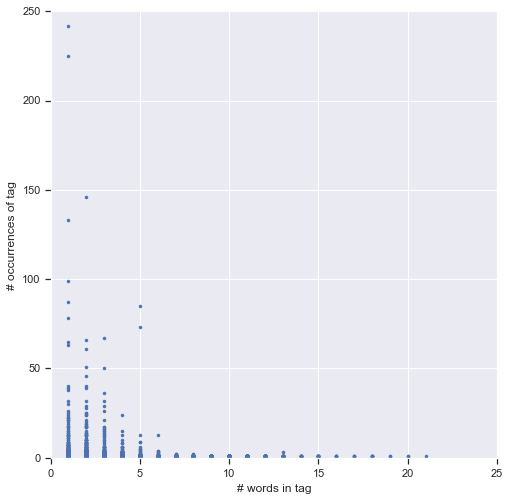

In [57]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(all_alt_tags_df["word_length"].values, all_alt_tags_df["count"].values, linestyle=" ",
       marker = ".")
ax.tick_params(axis='both', which='major', top=False, right=False)
ax.set_xlabel("# words in tag")
ax.set_ylabel("# occurrences of tag");

In [58]:
all_alt_tags_df.loc[((all_alt_tags_df["word_length"] == 5) &\
                     (all_alt_tags_df["count"] > 50)),:]

count                                    tag  word_length  length
7     85              angst with a happy ending            5      25
9     73  alternate universe - canon divergence            5      37

In [59]:
all_alt_tags_df.loc[((all_alt_tags_df["word_length"] == 4) &\
                     (all_alt_tags_df["count"] > 20)),:]

count                               tag  word_length  length
36     24  wyatt logan's bisexuality crisis            4      32

In [60]:
all_alt_tags_df.loc[all_alt_tags_df["count"] > 50,:]

count                                    tag  word_length  length
1     242                                  fluff            1       5
2     225                                  angst            1       5
3     146                           hurt/comfort            2      12
4     133                                  garcy            1       5
5      99                                romance            1       7
6      87                             friendship            1      10
7      85              angst with a happy ending            5      25
8      78                                  lyatt            1       5
9      73  alternate universe - canon divergence            5      37
10     67                 emotional hurt/comfort            3      22
11     66                        friendship/love            2      15
12     65                                  humor            1       5
13     63                                   smut            1       4
14     61                            time travel            2      11
15     51                             future fic            2      10

In [61]:
all_alt_tags_df.loc[all_alt_tags_df["word_length"] >= 15,"tag"].values

array(['lucy is also low-key a hamilton fan but not a fan of hamilton the man',
       'cause flynn is in love with lucy and no one will ever convince me otherwise okay',
       "i had to do it y'all especially sine bellarke and lyatt are the same people",
       "but they don't actually need to bc they figure it out all on their own",
       "right i have no idea what americans call hot chocolate so we're going with cocoa",
       'implied future garcy. like as in when flynn knew lucy in the future they were more than friends',
       'and he probably should start working out more now that he is gallivanting through history like this',
       "i swear these tags make it seem like it's all about sex but there's a shit ton of plot i swear",
       "i'm so confused but also i was a teensy bit drunk when i wrote this",
       "lucy: i'll kick your ass i'll kick my mom's ass i'll kick my own ass i don't care",
       "don't worry i have an alternate ending planned to cut through the angst 

In [62]:
top_tags = pd.DataFrame(columns=("tag","count"))

In [63]:
top_tags

Empty DataFrame
Columns: [tag, count]
Index: []

##### what if I compile the most frequent tags by length?

In [64]:
for length in range(1,11):
    
    top_tags = top_tags.append(pd.DataFrame(all_alt_tags_df.loc[((
        all_alt_tags_df["word_length"] == length))
                              ,["tag","count","word_length"]].sort_values("count", 
                                                                          ascending=False)[0:5]),
                              ignore_index=True)

##### then, keep only those that occur at least twice

In [65]:
top_tags = top_tags.loc[(top_tags["count"] > 1),:]

In [66]:
top_tags["word_length"] = top_tags["word_length"].map(int)

In [67]:
top_tags = top_tags[["tag","word_length","count"]]

In [68]:
len(top_tags)

35

In [69]:
display(HTML(top_tags.rename({"tag" : "Tag", "count" : "Count", "word_length" : "Word Length"},
                             axis=1).to_html(index=False)))

In [70]:
display(HTML(top_tags[:17].rename({"tag" : "Tag", "count" : "Count", 
                                   "word_length" : "Word Length"},
                             axis=1).to_html(index=False)))

In [71]:
display(HTML(top_tags[17:].rename({"tag" : "Tag", "count" : "Count", 
                                   "word_length" : "Word Length"},
                             axis=1).to_html(index=False)))

##### I took screenshots of those two

##### and what about all tags with at least 20 uses?

In [72]:
over_20 = all_alt_tags_df.loc[all_alt_tags_df["count"] >= 20,["tag","count"]].rename(
    {"count" : "Count","tag" : "Tag"}, axis=1)

In [73]:
over_20.shape

(48, 2)

In [74]:
display(HTML(over_20[:16].to_html(index=False)))

In [75]:
display(HTML(over_20[16:32].to_html(index=False)))

In [76]:
display(HTML(over_20[32:].to_html(index=False)))

##### I screenshot those too

##### can I find tags for years or decades?

In [77]:
all_alt_tags_df[all_alt_tags_df["tag"].str.contains("16|17|18|19|20")]

count                                       tag  word_length  length
217       5             episode: s01e16 the red scare            5      29
253       4                                   tbb2017            1       7
293       4                    free garcia flynn 2k17            4      22
346       3                    femslash february 2019            3      22
444       3                                       18+            1       3
620       2                  renew timeless (tv 2016)            4      24
635       2                                     1920s            1       5
649       2                                     1950s            1       5
674       2                               war of 1812            3      11
776       2                                 post 1x16            2       9
1011      1                                     1940s            1       5
1317      1                           save rufus 2k18            3      15
1385      1                       fifa world cup 2018            4      19
1601      1                episode: s07e17 all things            4      26
1738      1                                      1929            1       4
1783      1                 episode: s01e16 red scare            4      25
1919      1                                      1x16            1       4
2059      1                 minor spoilers for s01e16            4      25
2263      1                                 au of 206            3       9
2277      1                          episode tag: 203            3      16
2324      1  give jessica logan a redemption arc 2k18            7      40
2395      1                       season of kink 2018            4      19
2447      1   the team goes back to 1816 without lucy            8      39
2786      1             2016 us presidential election            4      29
2931      1             1906 san francisco earthquake            4      29
3038      1           international fanworks day 2018            4      31
3071      1         the great arctic outbreak of 1899            6      33
3104      1                             rip week 2018            3      13
3342      1                       happy halloween '18            3      19
3405      1                              20th century            2      12
3447      1                             possible 1x16            2      13
3531      1                         sexytimes in 1770            3      17
3631      1  alternate universe - holes (2003) fusion            6      40
3658      1                             yuletide 2017            2      13
3674      1              podfic length: 10-20 minutes            4      28
3930      1                        1880s prostitution            2      18
3998      1                     save baumgardner 2k17            3      21
4042      1                                 2018-2023            1       9
4126      1                        letflynngrieve2k18            1      18
4158      1               and it's 20gayteen everyone            4      27
4175      1                     timeless bigbang 2017            3      21
4364      1                                     1850s            1       5
4582      1                 episode 16 ending rewrite            4      25

##### not really, no.

##### what about for episodes?

In [78]:
all_alt_tags_df[all_alt_tags_df["tag"].str.contains("episode", case=False)]

count                                                tag  word_length  \
53       18                                        episode tag            2   
145       7                                    episode related            2   
165       6                          episode: s02e10 chinatown            3   
217       5                      episode: s01e16 the red scare            5   
460       3                                       post episode            2   
527       2                 post-episode: s02e03 hollywoodland            3   
538       2                                   between episodes            2   
569       2                          episode: s01e05 the alamo            4   
786       2                      episode: s02e03 hollywoodland            3   
1190      1                post-episode: s11e10 my struggle iv            5   
1300      1  episode: s01e02 the assassination of abraham l...            7   
1357      1                                      pilot episode            2   
1436      1                                      episode remix            2   
1601      1                         episode: s07e17 all things            4   
1766      1                                  episode tag: 2x04            3   
1783      1                          episode: s01e16 red scare            4   
1822      1                 episode tag: s02e02 darlington 500            5   
1880      1                               post episode drabble            3   
1892      1                     post episode: s02e10 chinatown            4   
2108      1                         episode 1x08: "space race"            4   
2189      1                                  post-episode 2x02            2   
2218      1                                 mid-episode insert            2   
2247      1                           episode 1x07: "stranded"            3   
2277      1                                   episode tag: 203            3   
2279      1                    spoilers for season 2 episode 3            6   
2337      1  this is what happens when i start daydreaming ...           13   
2554      1                     set during season 1 episode 10            6   
2623      1  post-episode: s02e11-12 the miracle of christm...            7   
2710      1                                  post episode 2x10            3   
2774      1     episode: s01e10 the capture of benedict arnold            7   
2860      1                        episode: s02e09 the general            4   
2985      1  post episode: s01e11 the world's columbian exp...            7   
3032      1                           spoilers for episode two            4   
3059      1                               episode tag for 2x04            4   
3149      1        episode: s02e06 the king of the delta blues            8   
3150      1         post-episode: s02e01 a war to end all wars            8   
3276      1                        episode: s07e21 je souhaite            4   
3281      1                           episode: s11e03 plus one            4   
3339      1                                season 2 episode 03            4   
3348      1            possible spoilers for previous episodes            5   
3350      1                                       post-episode            1   
3666      1       no spoilers except for episode 7 sneak peeks            8   
3700      1                      post episode: s01e07 stranded            4   
3830      1                                       episode 2x01            2   
4052      1                 episode: s01e06 the watergate tape            5   
4152      1                episode: s01e14 the lost generation            5   
4203      1      episode: s01e09 last ride of bonnie and clyde            8   
4280      1                                       episode tags            2   
4526      1          and so do i after this episode apparently            8   
4582      1                          episode 16 ending r

##### what about certain kinds of AUs?

In [79]:
all_alt_tags_df[all_alt_tags_df["tag"].str.contains(" au |alternate universe", case=False)]

count                                                tag  word_length  \
9        73              alternate universe - canon divergence            5   
28       29                                 alternate universe            2   
122       8                     alternate universe - soulmates            4   
183       6            alternate universe - college/university            5   
290       4                       alternate universe - regency            4   
350       3                alternate universe - no time travel            6   
363       3                    alternate universe - historical            4   
378       3                        alternate universe - fusion            4   
393       3             alternate universe - zombie apocalypse            5   
400       3                       alternate universe - fantasy            4   
471       3                         alternate universe - magic            4   
498       2                alternate universe - modern setting            5   
502       2                    alternate universe - post-canon            4   
512       2                     alternate universe - victorian            4   
542       2          alternate universe - coffee shops & cafes            7   
555       2                      alternate universe - werewolf            4   
615       2                        alternate universe - future            4   
621       2                   alternate universe - high school            5   
750       2                     alternate universe - steampunk            4   
930       1  alternate universe - eternal sunshine of the s...           10   
947       1  the college musical theatre au that no one ask...           10   
962       1               alternate universe - firefly setting            5   
1008      1                   alternate universe - summer camp            5   
1022      1                 alternate universe- phantom thread            4   
1037      1                     alternate universe - mythology            4   
1097      1  started out as a crack au idea and is maybe ac...           13   
1123      1                      alternate universe - medieval            4   
1299      1                 alternate universe - reincarnation            4   
1314      1                   alternate universe - flower shop            5   
1600      1                       alternate universe - dragons            4   
...     ...                                                ...          ...   
1979      1                     alternate universe - hollywood            4   
1990      1                       sort of au not really though            6   
2141      1                       alternate universe - royalty            4   
2195      1                    alternate universe - professors            4   
2235      1           alternate universe - american revolution            5   
2267      1                       alternate universe - parents            4   
2333      1                   the hogwarts au no-one asked for            6   
2363      1  alsoooo this is a really??? weird au that i th...           14   
2678      1               alternate universe - angels & demons            6   
2745      1             alternate universe - modern with magic            6   
2751      1       alternate universe - different first meeting            6   
2805      1       the au like three people and a cat asked for           10   
2839      1                     alternate universe - pre-canon            4   
2972      1                  alternate universe - world war ii            6   
2981      1                   alternate universe - time travel            5   
3099      1          alternate universe - harry potter setting            6   
3304      1                      alternate universe - hogwarts            4   
3470      1                         alternate universe - space            4   
3528      1             alternate universe - arranged ma

In [80]:
all_alt_tags_df.loc[all_alt_tags_df["tag"].str.contains(" au |alternate universe", case=False),
               ["count","tag"]].rename({"count" : "Count", "tag" : "Tag"}, axis=1)

Count                                                Tag
9        73              alternate universe - canon divergence
28       29                                 alternate universe
122       8                     alternate universe - soulmates
183       6            alternate universe - college/university
290       4                       alternate universe - regency
350       3                alternate universe - no time travel
363       3                    alternate universe - historical
378       3                        alternate universe - fusion
393       3             alternate universe - zombie apocalypse
400       3                       alternate universe - fantasy
471       3                         alternate universe - magic
498       2                alternate universe - modern setting
502       2                    alternate universe - post-canon
512       2                     alternate universe - victorian
542       2          alternate universe - coffee shops & cafes
555       2                      alternate universe - werewolf
615       2                        alternate universe - future
621       2                   alternate universe - high school
750       2                     alternate universe - steampunk
930       1  alternate universe - eternal sunshine of the s...
947       1  the college musical theatre au that no one ask...
962       1               alternate universe - firefly setting
1008      1                   alternate universe - summer camp
1022      1                 alternate universe- phantom thread
1037      1                     alternate universe - mythology
1097      1  started out as a crack au idea and is maybe ac...
1123      1                      alternate universe - medieval
1299      1                 alternate universe - reincarnation
1314      1                   alternate universe - flower shop
1600      1                       alternate universe - dragons
...     ...                                                ...
1979      1                     alternate universe - hollywood
1990      1                       sort of au not really though
2141      1                       alternate universe - royalty
2195      1                    alternate universe - professors
2235      1           alternate universe - american revolution
2267      1                       alternate universe - parents
2333      1                   the hogwarts au no-one asked for
2363      1  alsoooo this is a really??? weird au that i th...
2678      1               alternate universe - angels & demons
2745      1             alternate universe - modern with magic
2751      1       alternate universe - different first meeting
2805      1       the au like three people and a cat asked for
2839      1                     alternate universe - pre-canon
2972      1                  alternate universe - world war ii
2981      1                   alternate universe - time travel
3099      1          alternate universe - harry potter setting
3304      1                      alternate universe - hogwarts
3470      1                         alternate universe - space
3528      1             alternate universe - arranged marriage
3532      1                    alternate universe - farm/ranch
3631      1           alternate universe - holes (2003) fusion
3656      1                           the little au that could
3834      1         alternate universe - spies & secret agents
3956      1                       it's the mummy au i promised
3975      1            from the same au as the first one i did
4007      1                         alternate universe - canon
4023      1            alternate universe - sentinels & guides
4063      1  was there ever an au so perfectly suited for t...
4650      1                                alternate universes
4712      1                       alternate universe - vampire

[64 rows x 2 columns]

In [81]:
all_alt_tags_df.loc[((all_alt_tags_df["tag"].str.contains(
    r"\b(au)\b|alternate universe", case=False,)) & (all_alt_tags_df["count"] >= 2)),
               ["count","tag"]].rename(
    {"count" : "Count", "tag" : "Tag"}, axis=1).reset_index(drop=True)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


Count                                        Tag
0      73      alternate universe - canon divergence
1      29                         alternate universe
2      18                                         au
3       8             alternate universe - soulmates
4       6    alternate universe - college/university
5       4                                   mummy au
6       4                               the mummy au
7       4               alternate universe - regency
8       3        alternate universe - no time travel
9       3            alternate universe - historical
10      3                alternate universe - fusion
11      3     alternate universe - zombie apocalypse
12      3               alternate universe - fantasy
13      3                 alternate universe - magic
14      2        alternate universe - modern setting
15      2            alternate universe - post-canon
16      2             alternate universe - victorian
17      2  alternate universe - coffee shops & cafes
18      2              alternate universe - werewolf
19      2                alternate universe - future
20      2           alternate universe - high school
21      2                   post-season/series 02 au
22      2                                season 2 au
23      2                            shapeshifter au
24      2             alternate universe - steampunk
25      2                                soulmate au
26      2                                   canon au

In [82]:
display(HTML(all_alt_tags_df.loc[((all_alt_tags_df["tag"].str.contains(
    r"\b(au)\b|alternate universe", case=False)) & (all_alt_tags_df["count"] >= 3)),
               ["tag","count"]].rename(
    {"count" : "Count", "tag" : "Tag"}, axis=1).reset_index(drop=True).to_html(index=False)))

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


##### I screenshot that too

##### Do certain tags tend to go together often?

In [83]:
tags_df_trimmed = tags_df_clean.copy()

##### first, get all tags that occur at least twenty times

In [84]:
tags_trimmed = all_alt_tags_df.loc[(all_alt_tags_df["count"] >= 20),:]

##### then, keep only those tags in the original data frame that are in that set of tags occurring at least twenty times

In [85]:
mask = tags_df_trimmed.isin(tags_trimmed["tag"].values)

In [86]:
tags_df_subset = tags_df_trimmed[mask]

In [87]:
tags_df_subset

0                          1   \
0                                       NaN                        NaN   
1                                       NaN                        NaN   
2                                       NaN  angst with a happy ending   
3                                     lyatt                        NaN   
4                          pre-relationship                  slow burn   
5                                       NaN                        NaN   
6                                       NaN            fluff and angst   
7                                       NaN                        NaN   
8                                       NaN                        NaN   
9                                      smut                        NaN   
10                angst with a happy ending                      fluff   
11                          fluff and angst                        NaN   
12                                      NaN                        NaN   
13                                      NaN                        NaN   
14                                      NaN              mutual pining   
15                                      NaN                        NaN   
16                                      NaN                        NaN   
17    alternate universe - canon divergence                        NaN   
18                                      NaN                      angst   
19                                    whump                        NaN   
20                                      NaN                        NaN   
21                                      NaN                        NaN   
22                                    angst                      drama   
23                                      NaN                        NaN   
24                                    fluff                        NaN   
25                                    lyatt                        NaN   
26                           domestic fluff                        NaN   
27                                    fluff                        NaN   
28                                      NaN                        NaN   
29                                   family         alternate universe   
...                                     ...                        ...   
1851                                    NaN                        NaN   
1852                                    NaN                        NaN   
1853                                    NaN                        NaN   
1854                                    NaN                        NaN   
1855                                    NaN                        NaN   
1856                          introspection                      angst   
1857                       pre-relationship              introspection   
1858                             friendship           pre-relationship   
1859                                    NaN                        NaN   
1860                                    NaN                time travel   
1861                                    NaN                        NaN   
1862                                    NaN              introspection   
1863                             friendship                light angst   
1864                           hurt/comfort                        NaN   
1865                                    NaN                 friendship   
1866                                    NaN                        NaN   
1867                                    NaN                 friendship   
1868                       pre-relationship                        NaN   
1869                             friendship                        NaN   
1870                             friendship                        NaN   
1871  alternate universe - canon divergence                        NaN   
1872                                    NaN                        NaN   
1873                       pre-relationship  

##### clean this up a bit

In [88]:
tags_df_subset.dropna(axis=1, how="all", inplace=True)

In [89]:
tags_df_subset.shape

(1881, 37)

##### use a recipe from the internet to see how often certain tags go together

In [90]:
##from https://codereview.stackexchange.com/questions/107413/find-co-occurrence-of-elements

def calculate_cooccurrence(data):
    result = defaultdict(Counter)

    for line in data:
        for word in line:
            result[word].update([w for w in line if w is not word])
    return result

In [91]:
trimmed_tags_cooccurrence = []

for index, row in tags_df_subset.iterrows():
    
    trimmed_tags_cooccurrence.append(row[~row.isnull()].values)

In [92]:
cooccur_dict = calculate_cooccurrence(trimmed_tags_cooccurrence)

In [93]:
cooccur_df = pd.DataFrame.from_dict(cooccur_dict)

##### if two tags don't occur together, set the value to 0

In [94]:
cooccur_df.fillna(0, inplace=True)

##### use another recipe to plot this

In [95]:
cooccur_df

alternate universe  \
alternate universe                                    0.0   
alternate universe - canon divergence                 2.0   
angst                                                 8.0   
angst with a happy ending                             1.0   
canon compliant                                       0.0   
christmas                                             0.0   
comfort                                               0.0   
crack                                                 0.0   
domestic fluff                                        0.0   
drama                                                 1.0   
emotional hurt/comfort                                1.0   
established relationship                              0.0   
family                                                1.0   
family feels                                          1.0   
first kiss                                            1.0   
fix-it                                                1.0   
fluff                                                 6.0   
fluff and angst                                       3.0   
fluff and humor                                       0.0   
friends to lovers                                     3.0   
friendship                                            2.0   
friendship/love                                       5.0   
future fic                                            0.0   
garcy                                                 2.0   
grief/mourning                                        1.0   
humor                                                 2.0   
hurt/comfort                                          1.0   
introspection                                         0.0   
kissing                                               2.0   
light angst                                           1.0   
love                                                  2.0   
love confessions                                      1.0   
lyatt                                                 1.0   
mutual pining                                         4.0   
oral sex                                              1.0   
polyamory                                             0.0   
post-canon                                            0.0   
post-season/series 02                                 0.0   
pre-relationship                                      0.0   
rittenhouse                                           0.0   
romance                                               6.0   
slow burn                                             3.0   
smut                                                  1.0   
team as family                                        0.0   
time travel                                           2.0   
timeless fanfic prompts                               0.0   
whump                                                 0.0   
wyatt logan's bisexuality crisis                      0.0   

                                       alternate universe - canon divergence  \
alternate universe                                                       2.0   
alternate universe - canon divergence                                    0.0   
angst                                                                   16.0   
angst with a happy ending                                                8.0   
canon compliant                                                          4.0   
christmas                                                                2.0   
comfort                                                                  1.0   
crack                                                                    0.0   
domestic fluff                                                           5.0   
drama                                                                    2.0   
emotional hurt/comfort                                                   8.0   
established relationship                                                 3.0   
family   

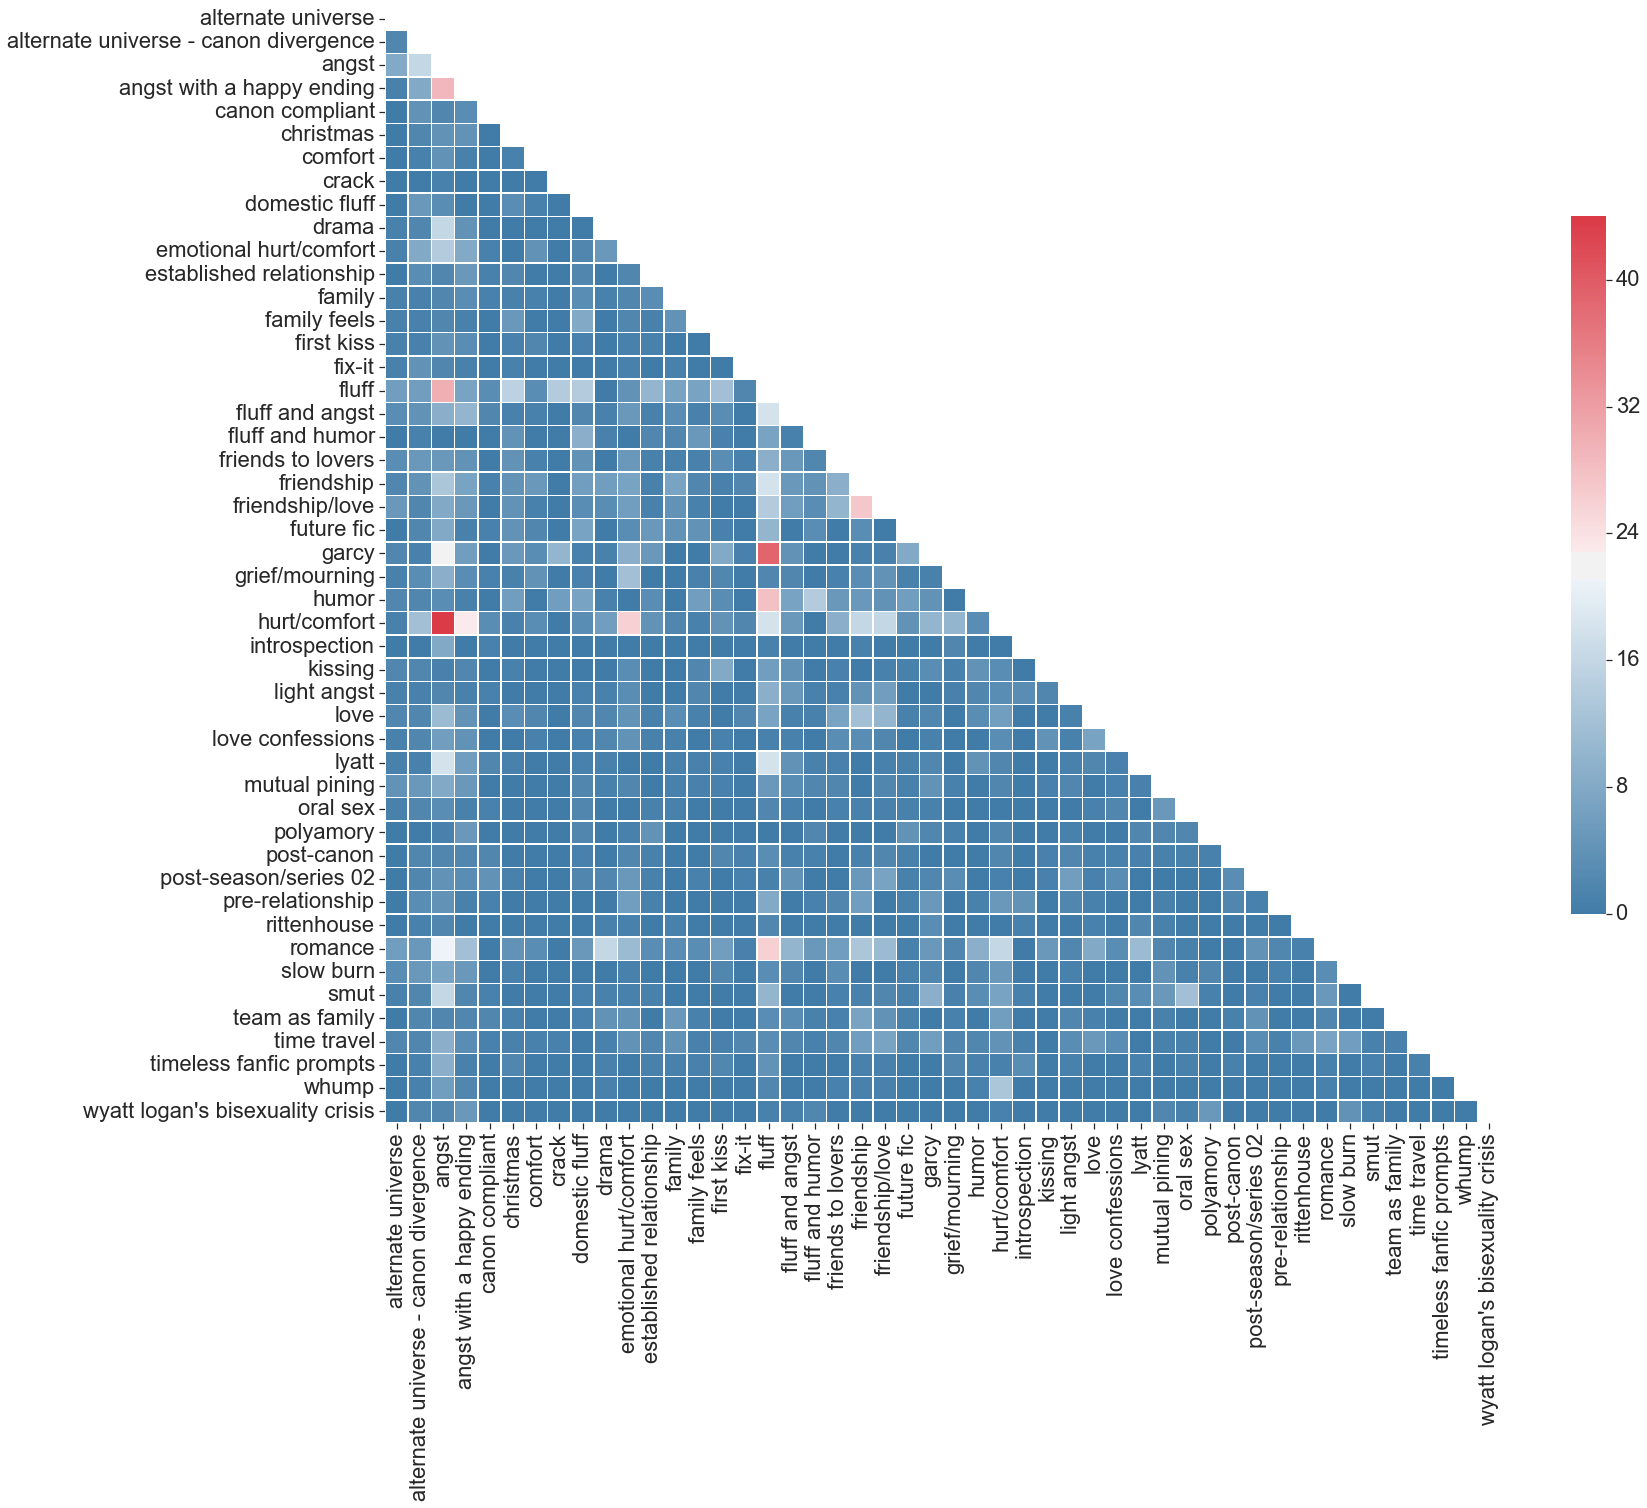

In [96]:
##from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

from string import ascii_letters

sns.set(style="white", font_scale=2)

# Generate a mask for the upper triangle
mask = np.zeros_like(cooccur_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))
ax.tick_params(axis='both', which='major', top=False, right=False)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cooccur_df, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### huh. let's use the option that pegs the colorbar to the quantiles of the values, not the extremes

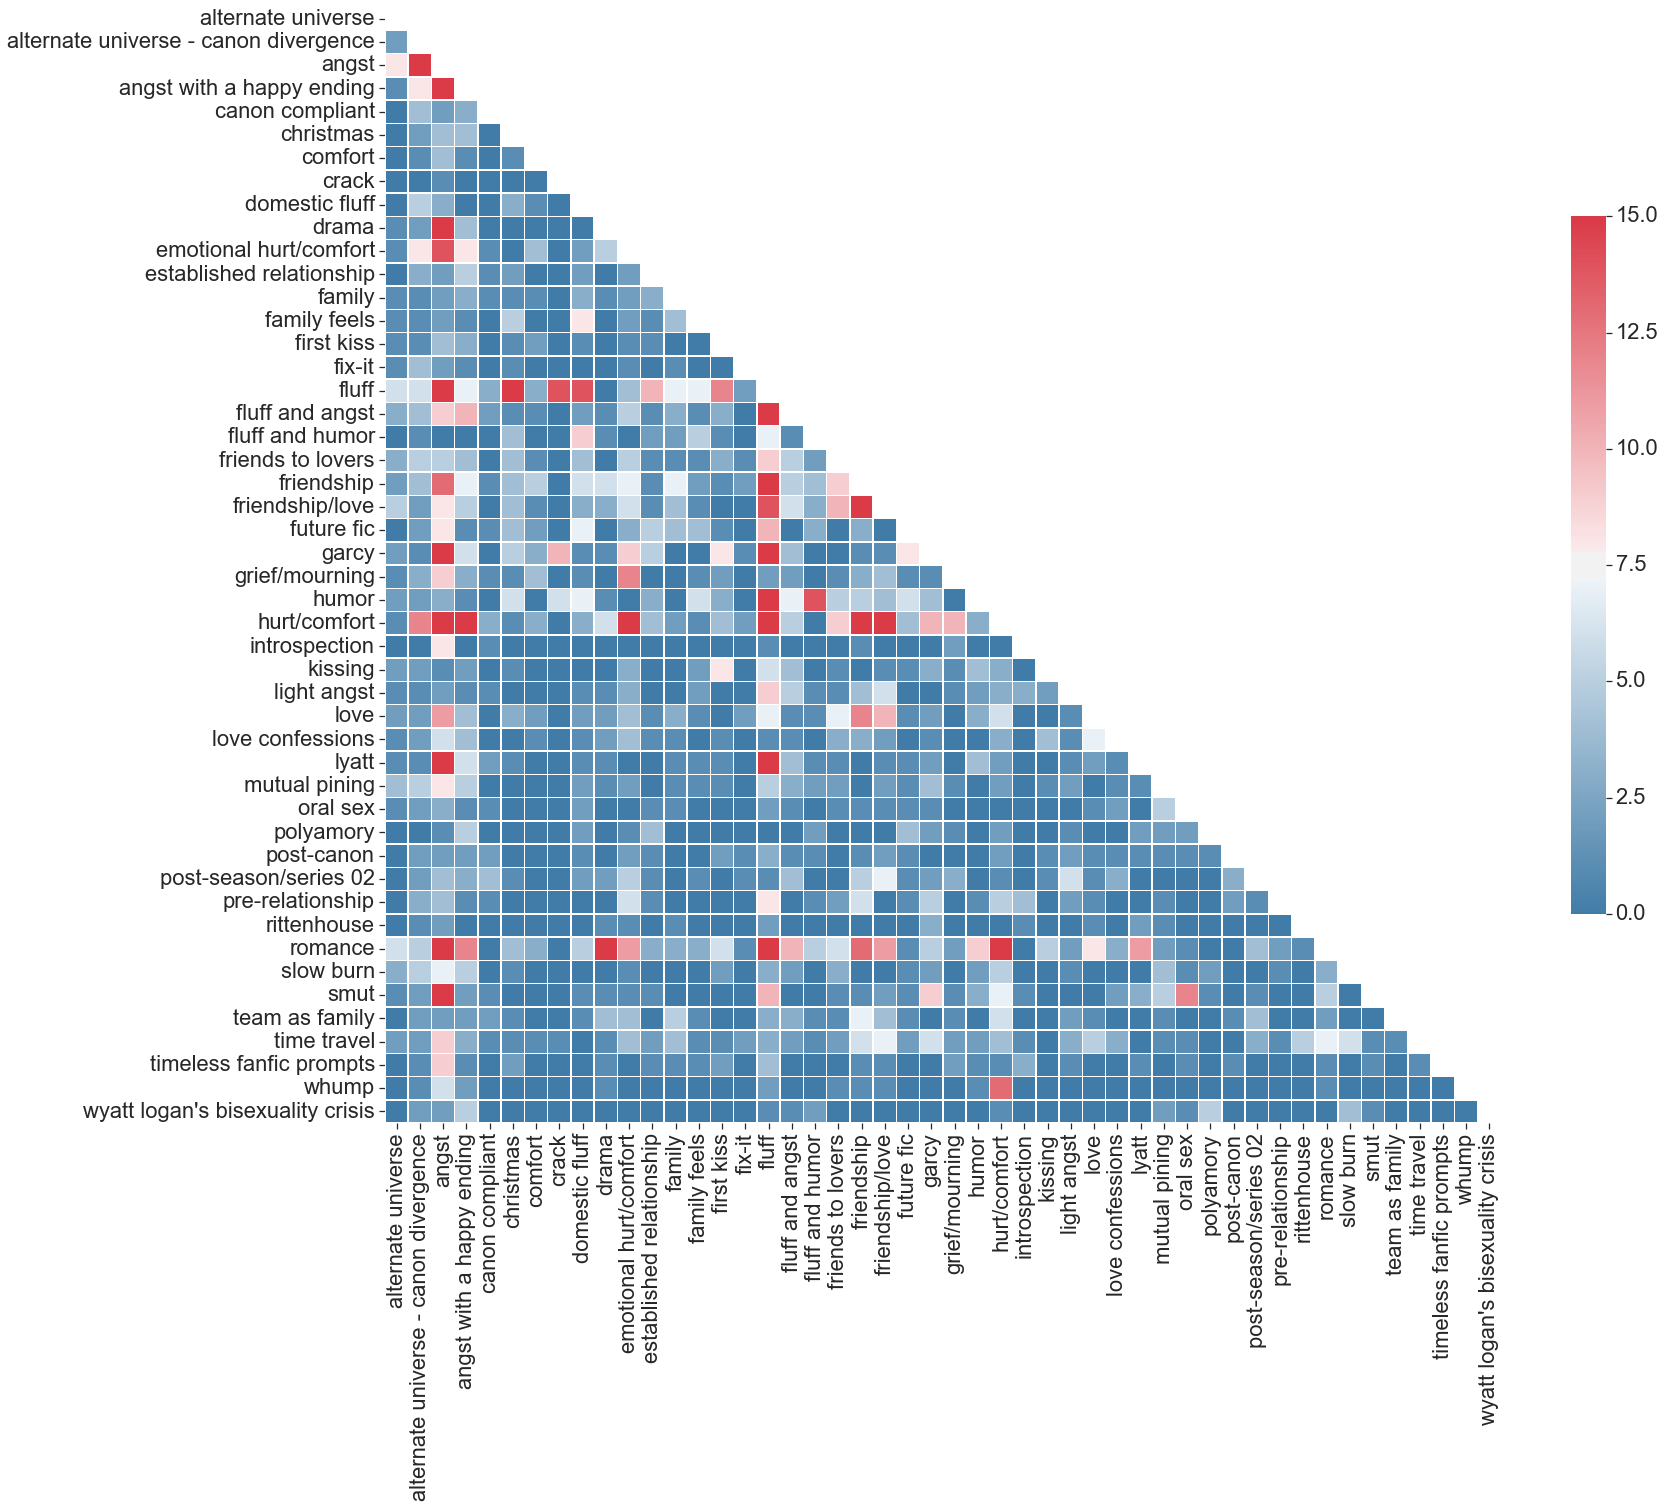

In [97]:
##from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", font_scale=2)
#sns.set(font_scale=1.4)

# Generate a mask for the upper triangle
mask = np.zeros_like(cooccur_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))
ax.tick_params(axis='both', which='major', top=False, right=False)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cooccur_df, mask=mask, cmap=cmap, robust=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#plt.savefig("common_tag_cooccurrence.png", bbox_inches="tight")
sns.set()

##### now...

##### ... wrangle the ships tag

In [98]:
ships_df = md["relationship"].str.split(",", expand=True)

In [99]:
ships_df

0   \
0                        Wyatt Logan/Lucy Preston   
1              Garcia Flynn/Original Character(s)   
2                        Wyatt Logan/Lucy Preston   
3                        Wyatt Logan/Lucy Preston   
4                       Garcia Flynn/Lucy Preston   
5                                        OC/Flynn   
6                        Wyatt Logan/Lucy Preston   
7                       Garcia Flynn/Lucy Preston   
8                       Garcia Flynn/Lucy Preston   
9                       Garcia Flynn/Lucy Preston   
10                      Garcia Flynn/Lucy Preston   
11                       Wyatt Logan/Lucy Preston   
12                      Garcia Flynn/Lucy Preston   
13                      Garcia Flynn/Lucy Preston   
14                      Garcia Flynn/Lucy Preston   
15                      Garcia Flynn/Lucy Preston   
16                      Garcia Flynn/Lucy Preston   
17                      Garcia Flynn/Lucy Preston   
18                                            NaN   
19                       Garcia Flynn/Wyatt Logan   
20                      Garcia Flynn/Lucy Preston   
21           Wyatt Logan/Lucy Preston (mentioned)   
22                       Wyatt Logan/Lucy Preston   
23                      Garcia Flynn/Lucy Preston   
24          Garcia Flynn/Wyatt Logan/Lucy Preston   
25                       Wyatt Logan/Lucy Preston   
26                      Garcia Flynn/Lucy Preston   
27                      Garcia Flynn/Lucy Preston   
28                      Garcia Flynn/Lucy Preston   
29                      Garcia Flynn/Lucy Preston   
...                                           ...   
1851                                          NaN   
1852                   Wyatt Logan & Lucy Preston   
1853                                          NaN   
1854                                          NaN   
1855                                          NaN   
1856                   Wyatt Logan & Lucy Preston   
1857                     Wyatt Logan/Lucy Preston   
1858                     Wyatt Logan/Lucy Preston   
1859       Captain Hook | Killian Jones/Emma Swan   
1860                                          NaN   
1861                   Wyatt Logan & Lucy Preston   
1862                                          NaN   
1863                     Wyatt Logan/Lucy Preston   
1864                                          NaN   
1865                     Wyatt Logan/Lucy Preston   
1866                     Wyatt Logan/Lucy Preston   
1867                                          NaN   
1868                     Wyatt Logan/Lucy Preston   
1869                     Wyatt Logan/Lucy Preston   
1870                                          NaN   
1871                    Lucy Preston/Garcia Flynn   
1872  Pre-Wyatt Logan/Lucy Preston - Relationship   
1873                     Wyatt Logan/Lucy Preston   
1874                    Wyatt Logan/Jessica Logan   
1875                     Wyatt Logan/Lucy Preston   
1876                  Lucy Preston & Garcia Flynn   
1877                                Wyatt/Jessica   
1878  Pre-Lucy Preston/Wyatt Logan - Relationship   
1879                                          NaN   
1880                                          NaN   

                                              1   \
0                                           None   
1                                           None   
2                     Wyatt Logan & Lucy Preston   
3                     Wyatt Logan & Lucy Preston   
4                                           None   
5                                           None   
6                                           None   
7          Garcia Flynn/Wyatt Logan/Lucy Preston   
8                                           None   
9                                           None   
10                                          None   
11                                          None   
12                           Garcia Flynn & Jiya   
13                              

In [100]:
ships_df.fillna(np.nan, inplace=True)

In [101]:
ships_df[0].value_counts()

Garcia Flynn/Lucy Preston                      791
Wyatt Logan/Lucy Preston                       572
Wyatt Logan & Lucy Preston                      95
Garcia Flynn/Wyatt Logan/Lucy Preston           47
Rufus Carlin/Jiya                               39
Garcia Flynn & Lucy Preston                     32
Garcia Flynn/Wyatt Logan                        20
Lucy Preston/Wyatt Logan                        14
Jessica Logan/Wyatt Logan                       12
Garcia Flynn/Lucy Preston/Wyatt Logan           11
Garcia Flynn/Lorena Flynn                       11
Rufus Carlin & Wyatt Logan & Lucy Preston        9
Garcia Flynn & Wyatt Logan                       6
Garcia Flynn & Jiya                              5
Denise Christopher/Michelle Christopher          4
garcy - Relationship                             4
Karl & Jessica Logan                             4
Lucy Preston/Garcia Flynn                        4
Josephine Baker/Lucy Preston                     4
Rufus Carlin & Lucy Preston    

In [102]:
len(md["relationship"].unique())

429

##### 429 unique values in this field. humans: infinite diversity in infinite combinations

##### how many fics have more than three entries in this field?

In [103]:
np.sum(md["relationship"].str.count(",") > 2)

169

##### what are the entries that have a large number of ships?

In [104]:
md.loc[md["relationship"].str.count(",") > 10,"relationship"].values

array([ 'Garcia Flynn/Lucy Preston, Garcia Flynn/Wyatt Logan/Lucy Preston, Rufus Carlin/Jiya, Jiya & Lucy Preston, Rufus Carlin & Garcia Flynn, Denise Christopher & Lucy Preston, Garcia Flynn & Jiya, Jessica Logan & Lucy Preston, Denise Christopher/Michelle Christopher, Garcia Flynn & Jessica Logan, Garcia Flynn/Lorena Flynn, Rufus Carlin & Garcia Flynn & Jiya, Garcia Flynn/Wyatt Logan',
       'Rufus Carlin & Wyatt Logan, Lucy Preston & Rufus Carlin, Wyatt Logan & Lucy Preston, Agent Christopher & Connor Mason, Connor Mason & Jiya (Timeless), Rufus Carlin/Jiya (Timeless), Wyatt Logan/Lucy Preston, Garcia Flynn/Lucy Preston, Rufus Carlin & Wyatt Logan & Lucy Preston, Emma Whitmore - Relationship, Carolyn Preston & Lucy Preston, Carolyn Preston - Relationship, Nicholas Keynes - Relationship, Nicholas Keynes/Emma Whitmore, Jessica Logan/Wyatt Logan'], dtype=object)

##### can I drop all with &?

In [105]:
ampersand_mask = (~ships_df.apply(lambda r: r.astype(str).str.contains('&', case=False)))

In [106]:
ships_df_trimmed = ships_df[ampersand_mask]

In [107]:
ships_df_trimmed.shape

(1881, 15)

##### shift everything to the left to make it easier to drop empty columns

In [108]:
ships_df_trimmed = ships_df_trimmed.apply(lambda x: sorted(x, key=pd.isnull), 1)

In [109]:
ships_df_trimmed.dropna(axis=1, how="all", inplace=True)

In [110]:
ships_df_trimmed.shape

(1881, 10)

##### okay. now get all values.

In [111]:
ships_df_clean = ships_df_trimmed.apply(
    lambda x: x.str.strip() if x.dtype == "object" else x)

In [112]:
pd.Series(ships_df_clean.values.flatten()).value_counts()

Garcia Flynn/Lucy Preston                                                894
Wyatt Logan/Lucy Preston                                                 705
Rufus Carlin/Jiya                                                        214
Jessica Logan/Wyatt Logan                                                 96
Garcia Flynn/Wyatt Logan/Lucy Preston                                     63
Garcia Flynn/Wyatt Logan                                                  59
Garcia Flynn/Lorena Flynn                                                 28
garcy - Relationship                                                      25
Minor or Background Relationship(s)                                       19
Lucy Preston/Wyatt Logan                                                  18
lyatt - Relationship                                                      16
Denise Christopher/Michelle Christopher                                   16
Garcia Flynn/Lucy Preston/Wyatt Logan                                     14

##### get the list of all ships occurring more than once

In [113]:
all_ships = pd.Series(ships_df_clean.values.flatten()).value_counts()

In [114]:
all_ships[all_ships > 1]

Garcia Flynn/Lucy Preston                    894
Wyatt Logan/Lucy Preston                     705
Rufus Carlin/Jiya                            214
Jessica Logan/Wyatt Logan                     96
Garcia Flynn/Wyatt Logan/Lucy Preston         63
Garcia Flynn/Wyatt Logan                      59
Garcia Flynn/Lorena Flynn                     28
garcy - Relationship                          25
Minor or Background Relationship(s)           19
Lucy Preston/Wyatt Logan                      18
lyatt - Relationship                          16
Denise Christopher/Michelle Christopher       16
Garcia Flynn/Lucy Preston/Wyatt Logan         14
Jessica Logan/Amy Preston                      9
Rufus Carlin/Jiya Marri                        8
Noah/Lucy Preston                              8
Karl/Jessica Logan                             6
Jiya/Lucy Preston                              5
Lucy Preston/Garcia Flynn                      5
Flucy                                          4
Josephine Baker/Lucy

##### this, I can handle.

In [115]:
all_ships[all_ships > 1].index

Index(['Garcia Flynn/Lucy Preston', 'Wyatt Logan/Lucy Preston',
       'Rufus Carlin/Jiya', 'Jessica Logan/Wyatt Logan',
       'Garcia Flynn/Wyatt Logan/Lucy Preston', 'Garcia Flynn/Wyatt Logan',
       'Garcia Flynn/Lorena Flynn', 'garcy - Relationship',
       'Minor or Background Relationship(s)', 'Lucy Preston/Wyatt Logan',
       'lyatt - Relationship', 'Denise Christopher/Michelle Christopher',
       'Garcia Flynn/Lucy Preston/Wyatt Logan', 'Jessica Logan/Amy Preston',
       'Rufus Carlin/Jiya Marri', 'Noah/Lucy Preston', 'Karl/Jessica Logan',
       'Jiya/Lucy Preston', 'Lucy Preston/Garcia Flynn', 'Flucy',
       'Josephine Baker/Lucy Preston', 'Wyatt Logan/Jessica Logan',
       'Future Wyatt Logan/Future Lucy Preston', 'Jessica Logan/Emma Whitmore',
       'Lucy Preston/Emma Whitmore', 'Jessica Logan/Wyatt Logan (mentioned)',
       'Rufus Carlin/Wyatt Logan/Lucy Preston', 'Relationship - Garcy',
       'Garcia Flynn/Emma Whitmore', 'Asher Flynn/Maria Tompkins',
       'Pr

##### skipping Mick/Leonard and Oliver/Felicity because they're ships from other fandoms

##### also skipping Past Noah/Lucy Preston (as that doesn't describe a current ship), and Lucy Preston - Relationship (as it isn't specific), and mention of Wyatt Logan/Lucy Preston (as it also sounds like it's describing a past ship, after looking at the context in which its used)

##### can I also drop "garcy - Relationship" and "lyatt - Relationship"? I can if there's always another relationship tag that goes with it

In [116]:
md.loc[((md["relationship"].str.contains("garcy - Relationship")) &\
        (~ md["relationship"].isnull())),"relationship"].values

array([ 'Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy Preston, garcy - Relationship',
       'Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy Preston, Flynn/Lucy, garcy - Relationship',
       'Lucy Preston/Garcia Flynn, garcy - Relationship',
       'Riya - Relationship, garcy - Relationship, Garcia Flynn/Lucy Preston, Rufus Carlin/Jiya, murder vision (Jiya and flynn platonic)',
       'Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy Preston, garcy - Relationship',
       'Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy Preston, garcy - Relationship',
       'Garcia Flynn/Lucy Preston, garcy - Relationship',
       'Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy Preston, garcy - Relationship',
       'Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy Preston, garcy - Relationship, Flucy',
       'Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy Preston, garcy - Relationship, Flucy',
       'Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy Preston, garcy - Relationship',
       'Garcia Flynn/L

##### all but one for "garcy - Relationship"

In [117]:
md.loc[((md["relationship"].str.contains("garcy - Relationship")) &\
        (~ md["relationship"].isnull())),"relationship"]

54      Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy...
99      Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy...
218       Lucy Preston/Garcia Flynn, garcy - Relationship
384     Riya - Relationship, garcy - Relationship, Gar...
456     Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy...
495     Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy...
532       Garcia Flynn/Lucy Preston, garcy - Relationship
626     Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy...
627     Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy...
764     Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy...
827     Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy...
878     Garcia Flynn/Lucy Preston, Jessica Logan/Wyatt...
942                          garcy - Relationship, Flufus
1013    Garcia Flynn/Lucy Preston, Rufus Carlin/Jiya M...
1026    Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy...
1077      Garcia Flynn/Lucy Preston, garcy - Relationship
1124    garcy - Relationship, Garcia Flynn/Lucy Presto...
1128    Cheval

##### that one is 942

##### what about for "lyatt - Relationship"?

In [118]:
md.loc[((md["relationship"].str.contains("lyatt - Relationship")) &\
        (~ md["relationship"].isnull())),"relationship"].values

array([ 'Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy Preston, Rufus Carlin/Jiya, Rufus Carlin & Jiya, lyatt - Relationship, Riya - Relationship',
       'Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy Preston, lyatt - Relationship',
       'Wyatt Logan & Lucy Preston, Wyatt Logan/Lucy Preston, lyatt - Relationship',
       'Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy Preston, lyatt - Relationship',
       'Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy Preston, lyatt - Relationship',
       'Lucy/Wyatt, Wyatt/Rufus, Lucy/Wyatt/Rufus, Connor Mason & Jiya, Lucy & Wyatt, Wyatt & Rufus, Lucy & Wyatt & Rufus, Wyatt & Agent Christopher, Wyatt & Denise, lyatt - Relationship',
       'Wyatt Logan & Lucy Preston, lyatt - Relationship',
       'Wyatt Logan/Lucy Preston, Lucy Preston/Wyatt Loagan, lyatt - Relationship',
       'Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy Preston, lyatt - Relationship',
       'Lucy Preston/Wyatt Logan, Lucy Preston and Wyatt Logan, lyatt - Relationship',
       'W

##### there are three that need handling by hand here

In [119]:
md.loc[((md["relationship"].str.contains("lyatt - Relationship")) &\
        (~ md["relationship"].isnull())),"relationship"]

179     Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy P...
937     Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy P...
938     Wyatt Logan & Lucy Preston, Wyatt Logan/Lucy P...
940     Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy P...
950     Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy P...
1132    Lucy/Wyatt, Wyatt/Rufus, Lucy/Wyatt/Rufus, Con...
1151     Wyatt Logan & Lucy Preston, lyatt - Relationship
1160    Wyatt Logan/Lucy Preston, Lucy Preston/Wyatt L...
1225    Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy P...
1240    Lucy Preston/Wyatt Logan, Lucy Preston and Wya...
1249    Wyatt Logan/Lucy Preston, Lucy Preston/Wyatt L...
1288       Wyatt Logan/Lucy Preston, lyatt - Relationship
1347       Wyatt Logan/Lucy Preston, lyatt - Relationship
1373                   lyatt - Relationship, Lucy & Wyatt
1437    Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy P...
1609            wucy - Relationship, lyatt - Relationship
Name: relationship, dtype: object

##### 1151, 1373, and 1609

In [120]:
ships_clean_dict = {"Garcia Flynn/Lucy Preston" : "Lucy/Flynn",
                   "Wyatt Logan/Lucy Preston" : "Lucy/Wyatt",
                   "Rufus Carlin/Jiya" : "Jiya/Rufus",
                   "Jessica Logan/Wyatt Logan" : "Jessica/Wyatt",
                   "Garcia Flynn/Wyatt Logan/Lucy Preston" : "Lucy/Flynn/Wyatt",
                   "Garcia Flynn/Wyatt Logan" : "Flynn/Wyatt",
                   "Garcia Flynn/Lorena Flynn" : "Lorena/Garcia",
                   "Minor or Background Relationship(s)" : "Minor/Background",
                   "Lucy Preston/Wyatt Logan" : "Lucy/Wyatt",
                   "Denise Christopher/Michelle Christopher" : "Denise/Michelle",
                   "Garcia Flynn/Lucy Preston/Wyatt Logan" : "Lucy/Flynn/Wyatt",
                   "Jessica Logan/Amy Preston" : "Amy/Jessica",
                   "Rufus Carlin/Jiya Marri" : "Jiya/Rufus",
                   "Noah/Lucy Preston" : "Lucy/Noah",
                   "Karl/Jessica Logan" : "Jessica/Karl",
                   "Jiya/Lucy Preston" : "Jiya/Lucy",
                   "Lucy Preston/Garcia Flynn" : "Lucy/Flynn",
                   "Jessica Logan/Emma Whitmore" : "Emma/Jessica",
                   "Wyatt Logan/Jessica Logan" : "Jessica/Wyatt",
                   "Josephine Baker/Lucy Preston" : "Josephine/Lucy",
                   "Future Wyatt Logan/Future Lucy Preston" : "Lucy/Wyatt",
                   "Flucy" : "Lucy/Flynn",
                   "Lucy Preston/Emma Whitmore" : "Emma/Lucy",
                   "Asher Flynn/Maria Tompkins" : "Maria/Asher",
                   "Pre-Garcia Flynn/Wyatt Logan/Lucy Preston" : "Lucy/Flynn/Wyatt",
                   "Garcia Flynn/Emma Whitmore" : "Emma/Flynn",
                   "Flynn/Lucy" : "Lucy/Flynn",
                   "Jessica Logan/Wyatt Logan (mentioned)" : "Jessica/Wyatt",
                   "Relationship - Garcy" : "Lucy/Flynn",
                   "Rufus Carlin/Wyatt Logan/Lucy Preston" : "Lucy/Rufus/Wyatt",
                   "Amy Preston/Jessica Logan" : "Amy/Jessica",
                   "Nicholas Keynes/Emma Whitmore" : "Emma/Nicholas",
                   "Riya - Relationship" : "Jiya/Rufus",
                   "Jyatt - Relationship" : "Jessica/Wyatt",
                   "Lucy x Wyatt" : "Lucy/Wyatt",
                   "Lucy/Flynn" : "Lucy/Flynn",
                   "Lucy Preston/Original Character(s)" : "Lucy/OC",
                   "Lucy/Wyatt" : "Lucy/Wyatt"}

In [121]:
ships_df_clean = ships_df_clean.apply(lambda x: x.map(ships_clean_dict))

##### take care of those 4 by hand

In [122]:
ships_df_clean.iloc[942,0] = "Lucy/Flynn"
ships_df_clean.iloc[1151,0] = "Lucy/Wyatt"
ships_df_clean.iloc[1373,0] = "Lucy/Wyatt"
ships_df_clean.iloc[1609,0] = "Lucy/Wyatt"

In [123]:
ships_df_clean.head()

0    1    2    3    4    5    6    7    8    9
0  Lucy/Wyatt  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  Lucy/Wyatt  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  Lucy/Wyatt  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  Lucy/Flynn  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

##### now count the occurrences

In [124]:
pd.Series(ships_df_clean.values.flatten()).value_counts()

Lucy/Flynn          912
Lucy/Wyatt          734
Jiya/Rufus          224
Jessica/Wyatt       105
Lucy/Flynn/Wyatt     80
Flynn/Wyatt          59
Lorena/Garcia        28
Minor/Background     19
Denise/Michelle      16
Amy/Jessica          12
Lucy/Noah             8
Jessica/Karl          6
Jiya/Lucy             5
Emma/Jessica          4
Emma/Lucy             4
Josephine/Lucy        4
Emma/Flynn            3
Lucy/Rufus/Wyatt      3
Maria/Asher           3
Emma/Nicholas         2
Lucy/OC               2
dtype: int64

In [125]:
ships_df_clean.shape

(1881, 10)

In [126]:
ships_df_clean = ships_df_clean.apply(lambda x: sorted(x, key=pd.isnull), 1)

In [127]:
ships_df_clean.dropna(axis=1, how="all", inplace=True)

In [128]:
ships_df_clean.shape

(1881, 10)

##### it's really the top 5 I want to capture: Lucy/Flynn, Lucy/Wyatt, Jiya/Rufus, Jessica/Wyatt, Lucy/Flynn/Wyatt

##### why not five dummy variables? Lucy/Flynn, Lucy/Wyatt, Jessica/Wyatt, Jiya/Rufus, Lucy/Flynn/Wyatt

In [129]:
md["LF"] = np.nan
md["LW"] = np.nan
md["JW"] = np.nan
md["JR"] = np.nan
md["LFW"] = np.nan

for index, row in ships_df_clean.iterrows():
    
    ships = row[~row.isnull()].values
    
    if "Lucy/Flynn/Wyatt" in ships:
        #print(row)
        
        md.loc[index, "LFW"] = "yes"
    
    if "Lucy/Flynn" in ships:
        
        md.loc[index, "LF"] = "yes"
        
    if "Lucy/Wyatt" in ships:
        
        md.loc[index, "LW"] = "yes"
        
    if "Jiya/Rufus" in ships:
        
        md.loc[index, "JR"] = "yes"
        
    if "Jessica/Wyatt" in ships:
        
        md.loc[index, "JW"] = "yes"

In [130]:
md["LF"].fillna("no", inplace=True)
md["LW"].fillna("no", inplace=True)
md["LFW"].fillna("no", inplace=True)
md["JR"].fillna("no", inplace=True)
md["JW"].fillna("no", inplace=True)

In [131]:
md["LF"].value_counts()

no     980
yes    901
Name: LF, dtype: int64

In [132]:
md["LW"].value_counts()

no     1154
yes     727
Name: LW, dtype: int64

In [133]:
md["LFW"].value_counts()

no     1801
yes      80
Name: LFW, dtype: int64

In [134]:
md["JR"].value_counts()

no     1660
yes     221
Name: JR, dtype: int64

In [135]:
md["JW"].value_counts()

no     1778
yes     103
Name: JW, dtype: int64

In [136]:
md.loc[(md["LF"] == "yes") & (md["LW"] == "yes") & (md["LFW"] == "no"),:]

work_id                                              title  \
14    17111198                                      Tryst of Fate   
150   17383721                                       upside down.   
163   17347964                       leave me shuddering for days   
177   17265143                       The Mechanics of Uncertainty   
307   16942779                                          Waking Up   
315   16912287         And in the End, There Are No Happy Endings   
399   16502312                                         Cannonball   
429   16416053                                        Retribution   
438   15975344                                    Echo of the Day   
466   16271345                                      Book of Asher   
649   15196946                     The Bewitching of Garcia Flynn   
652   15688338                                    The Closed Loop   
1010  14879901                                             broken   
1099  14774510                                         Unbalanced   
1150  14723160                        A week of misunderstandings   
1152  14509794                            Baby, You're So Classic   
1171  14689884  Time's waters as they rose and fell - Soulmate...   
1228  14578674                                        All in Time   
1257  14512227                                         Unsinkable   
1270  14488113                         The Lies We Tell Ourselves   
1273  14362896                                      Invisible Ink   
1281  14453832                                        Dream Lover   
1282  14429808                   The String That Ties Us Together   
1357  14289048                                Buckled up for love   
1358  14282523                              A Matter of Questions   
1371  14247651                                             Spikes   
1394  14086662                                Drama in the Bunker   
1563   8918281                          So Close, Yet So Far Away   
1611  11363271                           this is not a love story   
1689  10573374                                            Reasons   
1724  10024232   i know you [i walked with you once upon a dream]   
1767   9971996                                             Safety   
1773   9947213                                      Possibilities   
1774   9943784                                               Here   
1797   9603857                                      Improbability   

                                    author                 rating  \
14    Gotta_Love_Garcy, kissedbydragonfire               Explicit   
150                             saveicarus  Teen And Up Audiences   
163                         orphan_account                 Mature   
177                              maelidify      General Audiences   
307                       Gotta_Love_Garcy  Teen And Up Audiences   
315                            llmarmalade                 Mature   
399                               Tsuuriki      General Audiences   
429                              Lyatt1941  Teen And Up Audiences   
438                     kissedbydragonfire  Teen And Up Audiences   
466                       Gotta_Love_Garcy                 Mature   
649                     kissedbydragonfire                 Mature   
652                 fellowshipofthefandoms                 Mature   
1010                            isoldewass  Teen And Up Audiences   
1099                             Steadfxst  Teen And Up Audiences   
1150                      HunterSixtySeven  Teen And Up Audiences   
1152                            Sunny_Lana  Teen And Up Audiences   
1171                       humongous_sheep                 Mature   
1228                           Lady_Nerd52              Not Rated   
1257                      themidnightqueen                 Mature   
1270                            Sunny_Lana  Teen And Up Audiences   
1273                       winter_dreaming              Not Rated   
1281

##### there are 35 fics that are labeled as Lucy/Flynn and Lucy/Wyatt, outside the OT3 and outside the rare labels I dropped earlier

##### now add ship-specific values to by_date

In [137]:
by_date.head()

date  count   words      hits  authors
0 2016-10-01     16   24586   30025.0      9.0
1 2016-11-01     32   53864   50837.0     17.0
2 2016-12-01     47   96909   78893.0     30.0
3 2017-01-01     70  203760  110054.0     47.0
4 2017-02-01    117  396037  181902.0     73.0

In [138]:
by_date.set_index("date", inplace=True)

In [139]:
by_date["LF_count"] =\
md.loc[((md["LF"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["count"].sum().cumsum()

by_date["LF_words"] =\
md.loc[((md["LF"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["words"].sum().cumsum()

by_date["LF_hits"] =\
md.loc[((md["LF"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["hits"].sum().cumsum()

by_date["LF_comments"] =\
md.loc[((md["LF"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["comments"].sum().cumsum()

by_date["LF_kudos"] =\
md.loc[((md["LF"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["kudos"].sum().cumsum()

by_date["LW_count"] =\
md.loc[((md["LW"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["count"].sum().cumsum()

by_date["LW_words"] =\
md.loc[((md["LW"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["words"].sum().cumsum()

by_date["LW_hits"] =\
md.loc[((md["LW"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["hits"].sum().cumsum()

by_date["LW_comments"] =\
md.loc[((md["LW"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["comments"].sum().cumsum()

by_date["LW_kudos"] =\
md.loc[((md["LW"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["kudos"].sum().cumsum()

by_date["JR_count"] =\
md.loc[((md["JR"] == "yes")),:].groupby('date')["count"].sum().cumsum()

by_date["JR_words"] =\
md.loc[((md["JR"] == "yes")),:].groupby('date')["words"].sum().cumsum()

by_date["JR_hits"] =\
md.loc[((md["JR"] == "yes")),:].groupby('date')["hits"].sum().cumsum()

by_date["JR_comments"] =\
md.loc[((md["JR"] == "yes")),:].groupby('date')["comments"].sum().cumsum()

by_date["JR_kudos"] =\
md.loc[((md["JR"] == "yes")),:].groupby('date')["kudos"].sum().cumsum()

by_date["JR_count"] =\
md.loc[((md["JR"] == "yes")),:].groupby('date')["count"].sum().cumsum()

by_date["JR_words"] =\
md.loc[((md["JR"] == "yes")),:].groupby('date')["words"].sum().cumsum()

by_date["JW_hits"] =\
md.loc[((md["JW"] == "yes")),:].groupby('date')["hits"].sum().cumsum()

by_date["JW_comments"] =\
md.loc[((md["JW"] == "yes")),:].groupby('date')["comments"].sum().cumsum()

by_date["JW_kudos"] =\
md.loc[((md["JW"] == "yes")),:].groupby('date')["kudos"].sum().cumsum()

by_date["JW_count"] =\
md.loc[((md["JW"] == "yes")),:].groupby('date')["count"].sum().cumsum()

by_date["LFW_count"] =\
md.loc[((md["LFW"] == "yes")),:].groupby('date')["count"].sum().cumsum()

by_date["LFW_words"] =\
md.loc[((md["LFW"] == "yes")),:].groupby('date')["words"].sum().cumsum()

by_date["LFW_hits"] =\
md.loc[((md["LFW"] == "yes")),:].groupby('date')["hits"].sum().cumsum()

by_date["LFW_comments"] =\
md.loc[((md["LFW"] == "yes")),:].groupby('date')["comments"].sum().cumsum()

by_date["LFW_kudos"] =\
md.loc[((md["LFW"] == "yes")),:].groupby('date')["kudos"].sum().cumsum()

In [140]:
by_date.head()

count   words      hits  authors  LF_count  LF_words  LF_hits  \
date                                                                        
2016-10-01     16   24586   30025.0      9.0       2.0    7128.0      0.0   
2016-11-01     32   53864   50837.0     17.0       NaN       NaN      NaN   
2016-12-01     47   96909   78893.0     30.0       NaN       NaN      NaN   
2017-01-01     70  203760  110054.0     47.0       5.0   20055.0   4872.0   
2017-02-01    117  396037  181902.0     73.0      19.0   59402.0  21109.0   

            LF_comments  LF_kudos  LW_count    ...      JR_kudos  JW_hits  \
date                                           ...                          
2016-10-01         55.0     246.0         6    ...           NaN    525.0   
2016-11-01          NaN       NaN        10    ...           NaN   2196.0   
2016-12-01          NaN       NaN        18    ...         212.0   3485.0   
2017-01-01        120.0     596.0        26    ...         468.0   4724.0   
2017-02-01        259.0    1453.0        46    ...        1050.0   6195.0   

            JW_comments  JW_kudos  JW_count  LFW_count  LFW_words  LFW_hits  \
date                                                                          
2016-10-01          2.0      19.0       1.0        NaN        NaN       NaN   
2016-11-01         22.0     120.0       2.0        NaN        NaN       NaN   
2016-12-01         50.0     220.0       3.0        NaN        NaN       NaN   
2017-01-01         52.0     245.0       4.0        NaN        NaN       NaN   
2017-02-01         60.0     277.0       5.0        NaN        NaN       NaN   

            LFW_comments  LFW_kudos  
date                                 
2016-10-01           NaN        NaN  
2016-11-01           NaN        NaN  
2016-12-01           NaN        NaN  
2017-01-01           NaN        NaN  
2017-02-01           NaN        NaN  

[5 rows x 28 columns]

In [141]:
by_date.reset_index(inplace=True)

In [142]:
by_date["LF_authors"] = np.nan
by_date["LW_authors"] = np.nan
by_date["JR_authors"] = np.nan
by_date["LFW_authors"] = np.nan
by_date["JW_authors"] = np.nan

In [143]:
by_date.head()

date  count   words      hits  authors  LF_count  LF_words  LF_hits  \
0 2016-10-01     16   24586   30025.0      9.0       2.0    7128.0      0.0   
1 2016-11-01     32   53864   50837.0     17.0       NaN       NaN      NaN   
2 2016-12-01     47   96909   78893.0     30.0       NaN       NaN      NaN   
3 2017-01-01     70  203760  110054.0     47.0       5.0   20055.0   4872.0   
4 2017-02-01    117  396037  181902.0     73.0      19.0   59402.0  21109.0   

   LF_comments  LF_kudos     ...      LFW_count  LFW_words  LFW_hits  \
0         55.0     246.0     ...            NaN        NaN       NaN   
1          NaN       NaN     ...            NaN        NaN       NaN   
2          NaN       NaN     ...            NaN        NaN       NaN   
3        120.0     596.0     ...            NaN        NaN       NaN   
4        259.0    1453.0     ...            NaN        NaN       NaN   

   LFW_comments  LFW_kudos  LF_authors  LW_authors  JR_authors  LFW_authors  \
0           NaN        NaN         NaN         NaN         NaN          NaN   
1           NaN        NaN         NaN         NaN         NaN          NaN   
2           NaN        NaN         NaN         NaN         NaN          NaN   
3           NaN        NaN         NaN         NaN         NaN          NaN   
4           NaN        NaN         NaN         NaN         NaN          NaN   

   JW_authors  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 34 columns]

In [144]:
for date in md["date"].unique():
    
    #print(date)
    
    LF_chunk = md.loc[((md["date"] <= date) & (md["LF"] == "yes") & (md["LFW"] == "no")),:]
    LW_chunk = md.loc[((md["date"] <= date) & (md["LW"] == "yes") & (md["LFW"] == "no")),:]
    JR_chunk = md.loc[((md["date"] <= date) & (md["JR"] == "yes")),:]
    LFW_chunk = md.loc[((md["date"] <= date) & (md["LFW"] == "yes")),:]
    JW_chunk = md.loc[((md["date"] <= date) & (md["JW"] == "yes")),:]

    #print(len(chunk))
    
    LF_authors = LF_chunk["author"].unique()
    LW_authors = LW_chunk["author"].unique()
    JR_authors = JR_chunk["author"].unique()
    LFW_authors = LFW_chunk["author"].unique()
    JW_authors = JW_chunk["author"].unique()

    #print("LF :", len(LF_authors))
    #print("LW :", len(LW_authors))
    #print("JR :", len(JR_authors))
    #print("LFW :", len(LFW_authors))
    #print("JW :", len(JW_authors))
    
    by_date.loc[by_date["date"] == date, "LF_authors"] = len(LF_authors)
    by_date.loc[by_date["date"] == date, "LW_authors"] = len(LW_authors)
    by_date.loc[by_date["date"] == date, "JR_authors"] = len(JR_authors)
    by_date.loc[by_date["date"] == date, "LFW_authors"] = len(LFW_authors)
    by_date.loc[by_date["date"] == date, "JW_authors"] = len(JW_authors)

##### sanity check

In [145]:
len(md.loc[md["LF"] == "yes","author"].unique())

179

In [146]:
len(md.loc[md["LW"] == "yes","author"].unique())

221

In [147]:
len(md.loc[((md["LF"] == "yes") & (md["date"] <= "2018-07-01")),"author"].unique())

117

In [148]:
len(md.loc[((md["LW"] == "yes") & (md["date"] <= "2018-07-01")),"author"].unique())

181

##### redo the graphs

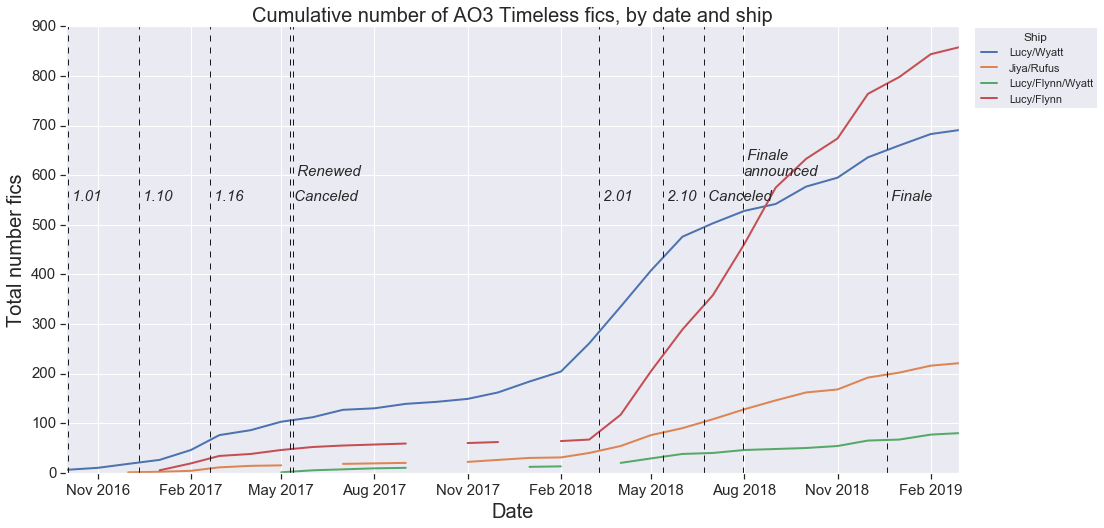

In [149]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(by_date["date"], by_date["LW_count"], linestyle="-", linewidth=2,
        label = "Lucy/Wyatt")
ax.plot(by_date["date"], by_date["JR_count"], linestyle="-", linewidth=2,
        label = "Jiya/Rufus")
ax.plot(by_date["date"], by_date["LFW_count"], linestyle="-", linewidth=2,
        label = "Lucy/Flynn/Wyatt")
ax.plot(by_date["date"], by_date["LF_count"], linestyle="-", linewidth=2,
        label = "Lucy/Flynn")

ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Total number fics", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15, top=False, right=False)
ax.set_title("Cumulative number of AO3 Timeless fics, by date and ship", fontsize=20)

for index, row in events.iterrows():
    
    if row["type"] != "ep" or row["event"] == "1.01" or row["event"] == "1.10" or\
    row["event"] == "1.16" or row["event"] == "2.01" or row["event"] == "2.10":
    
        ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
        ax.text(row["date"], row["y"]/2, (" " + row["event"]), fontsize=15, style="italic")

ax.legend(title="Ship", loc="upper left", bbox_to_anchor=(1.01,1.01));

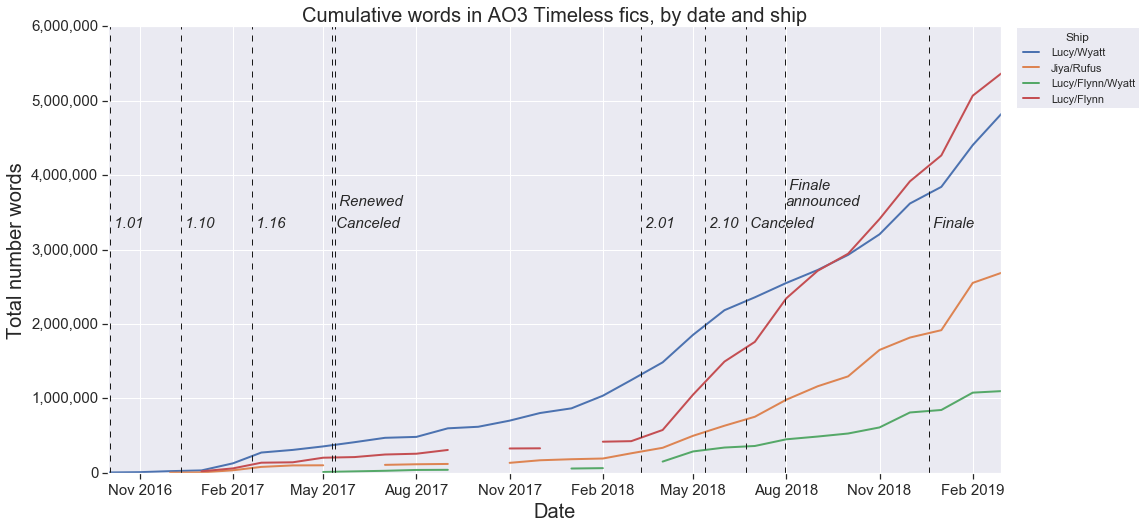

In [150]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(by_date["date"], by_date["LW_words"], linestyle="-", linewidth=2,
        label = "Lucy/Wyatt")
ax.plot(by_date["date"], by_date["JR_words"], linestyle="-", linewidth=2,
        label = "Jiya/Rufus")
ax.plot(by_date["date"], by_date["LFW_words"], linestyle="-", linewidth=2,
        label = "Lucy/Flynn/Wyatt")
ax.plot(by_date["date"], by_date["LF_words"], linestyle="-", linewidth=2,
        label = "Lucy/Flynn")


ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Total number words", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15, top=False, right=False)
ax.set_title("Cumulative words in AO3 Timeless fics, by date and ship", fontsize=20)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for index, row in events.iterrows():
    
    if row["type"] != "ep" or row["event"] == "1.01" or row["event"] == "1.10" or\
    row["event"] == "1.16" or row["event"] == "2.01" or row["event"] == "2.10":
    
        ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
        ax.text(row["date"], row["y"]*3000, (" " + row["event"]), fontsize=15, style="italic")

ax.legend(title="Ship", loc="upper left", bbox_to_anchor=(1.01,1.01));

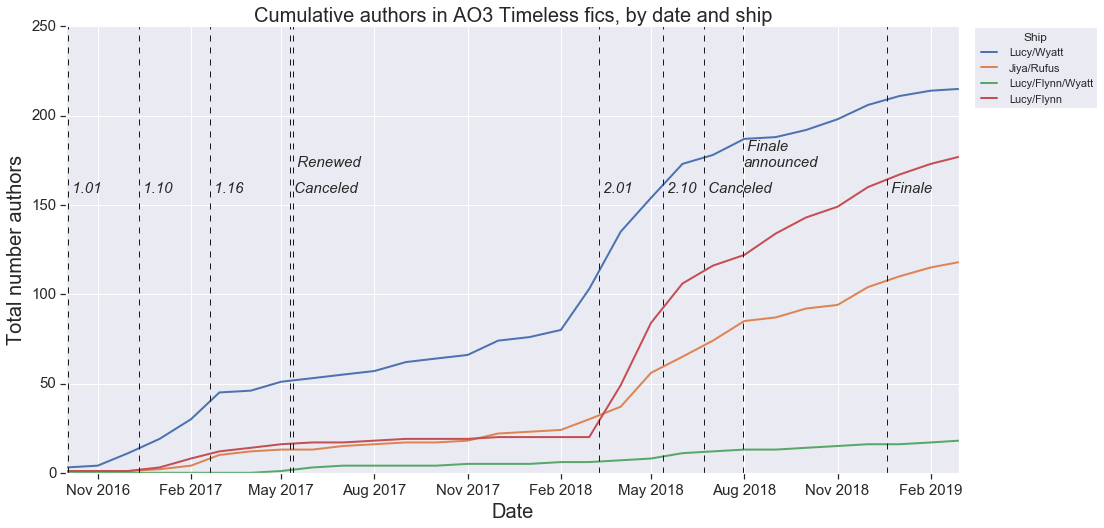

In [151]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(by_date["date"], by_date["LW_authors"], linestyle="-", linewidth=2,
        label = "Lucy/Wyatt")
ax.plot(by_date["date"], by_date["JR_authors"], linestyle="-", linewidth=2,
        label = "Jiya/Rufus")
ax.plot(by_date["date"], by_date["LFW_authors"], linestyle="-", linewidth=2,
        label = "Lucy/Flynn/Wyatt")
ax.plot(by_date["date"], by_date["LF_authors"], linestyle="-", linewidth=2,
        label = "Lucy/Flynn")

ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Total number authors", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15, top=False, right=False)
ax.set_title("Cumulative authors in AO3 Timeless fics, by date and ship", fontsize=20)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for index, row in events.iterrows():
    
    if row["type"] != "ep" or row["event"] == "1.01" or row["event"] == "1.10" or\
    row["event"] == "1.16" or row["event"] == "2.01" or row["event"] == "2.10":
    
        ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
        ax.text(row["date"], row["y"]/7, (" " + row["event"]), fontsize=15, style="italic")

ax.legend(title="Ship", loc="upper left", bbox_to_anchor=(1.01,1.01));

##### combine

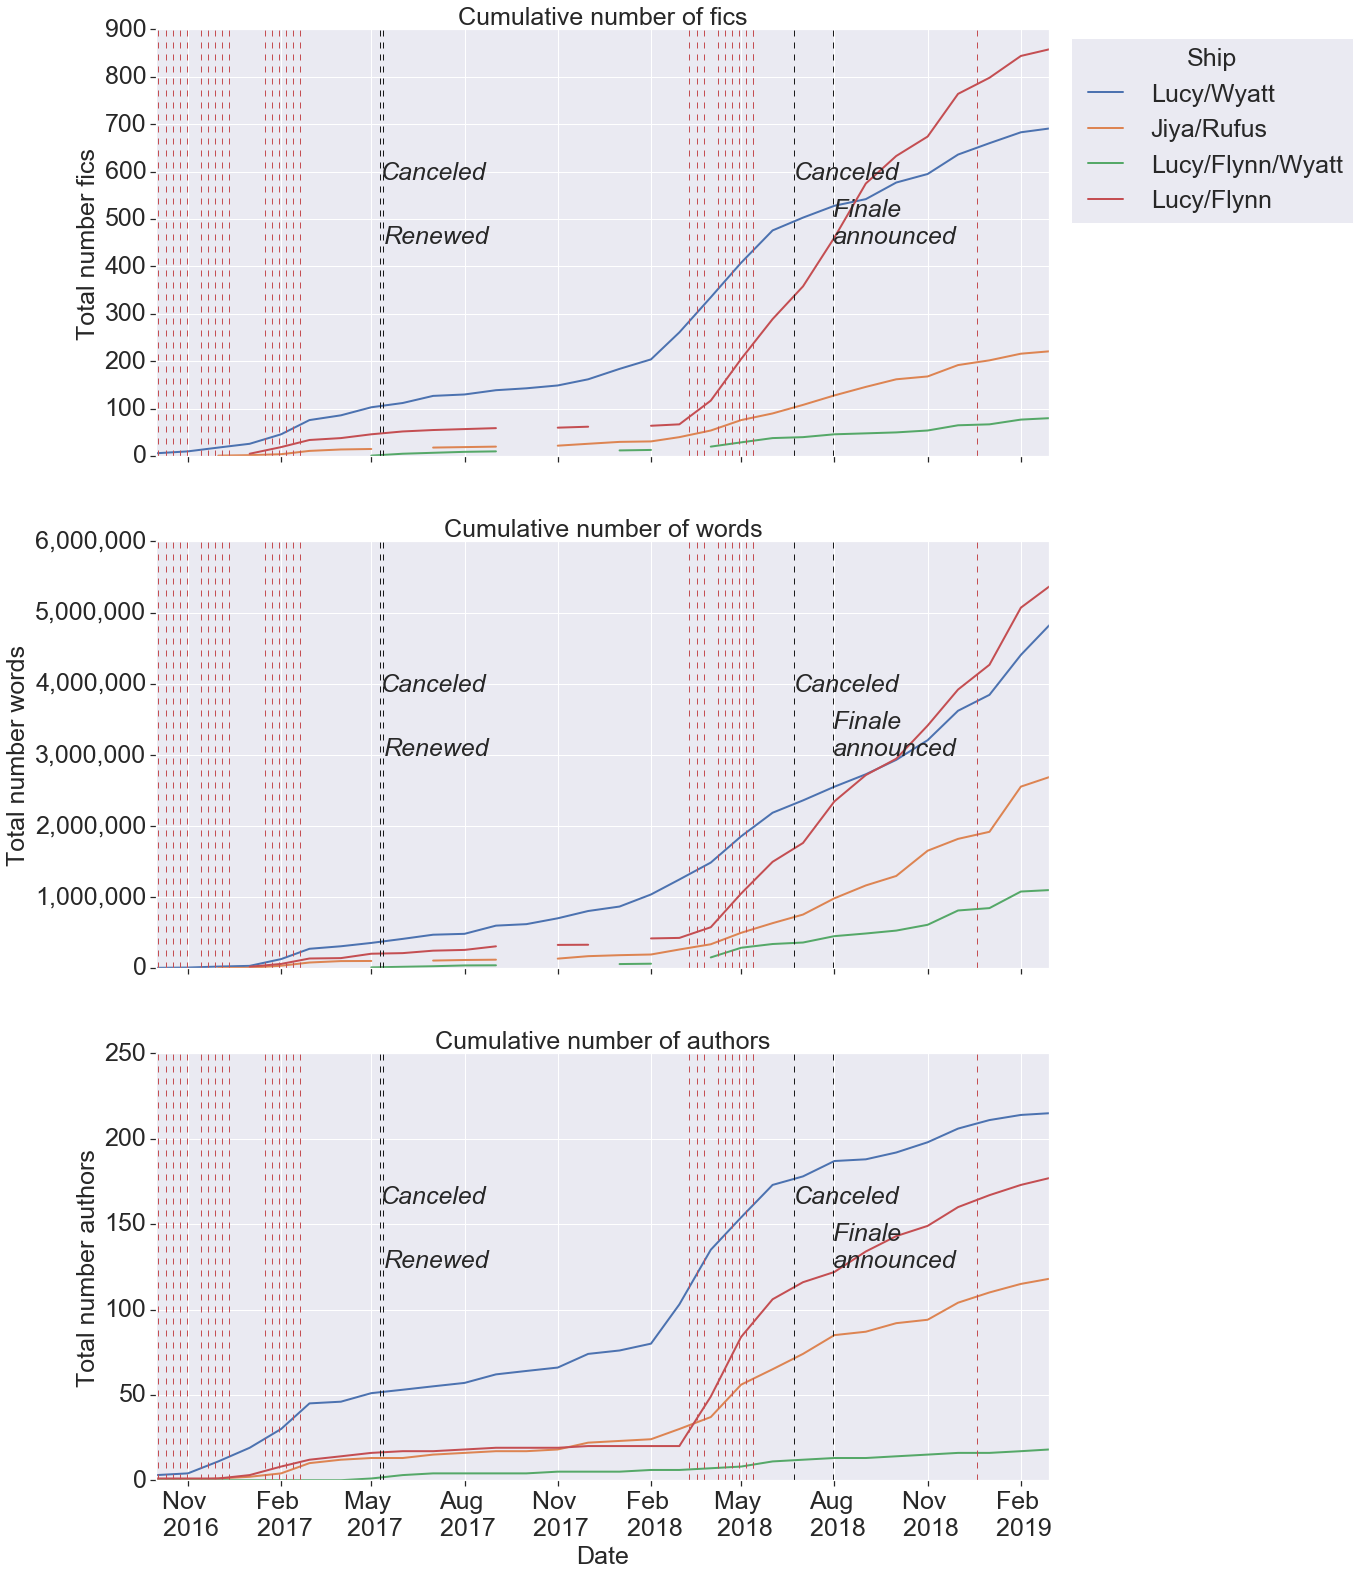

In [152]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize = (16, 26))

##number of fics
axes[0].plot(by_date["date"], by_date["LW_count"], linestyle="-", linewidth=2,
        label = "Lucy/Wyatt")
axes[0].plot(by_date["date"], by_date["JR_count"], linestyle="-", linewidth=2,
        label = "Jiya/Rufus")
axes[0].plot(by_date["date"], by_date["LFW_count"], linestyle="-", linewidth=2,
        label = "Lucy/Flynn/Wyatt")
axes[0].plot(by_date["date"], by_date["LF_count"], linestyle="-", linewidth=2,
        label = "Lucy/Flynn")
axes[0].set_ylabel("Total number fics", fontsize=25)
axes[0].set_title("Cumulative number of fics", fontsize=25)

##number of words
axes[1].plot(by_date["date"], by_date["LW_words"], linestyle="-", linewidth=2,
        label = "Lucy/Wyatt")
axes[1].plot(by_date["date"], by_date["JR_words"], linestyle="-", linewidth=2,
        label = "Jiya/Rufus")
axes[1].plot(by_date["date"], by_date["LFW_words"], linestyle="-", linewidth=2,
        label = "Lucy/Flynn/Wyatt")
axes[1].plot(by_date["date"], by_date["LF_words"], linestyle="-", linewidth=2,
        label = "Lucy/Flynn")

axes[1].set_ylabel("Total number words", fontsize=25)
axes[1].set_title("Cumulative number of words", fontsize=25)
axes[1].get_yaxis().get_major_formatter().set_scientific(False)
axes[1].get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

##number of authors
axes[2].plot(by_date["date"], by_date["LW_authors"], linestyle="-", linewidth=2,
        label = "Lucy/Wyatt")
axes[2].plot(by_date["date"], by_date["JR_authors"], linestyle="-", linewidth=2,
        label = "Jiya/Rufus")
axes[2].plot(by_date["date"], by_date["LFW_authors"], linestyle="-", linewidth=2,
        label = "Lucy/Flynn/Wyatt")
axes[2].plot(by_date["date"], by_date["LF_authors"], linestyle="-", linewidth=2,
        label = "Lucy/Flynn")

axes[2].set_ylabel("Total number authors", fontsize=25)
axes[2].set_title("Cumulative number of authors", 
                  fontsize=25)

axes[2].set_xlabel("Date", fontsize=25)
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b \n %Y'))

for ax_index, ax in enumerate(axes):
    ax.tick_params(axis='both', which='major', labelsize=25, top=False, right=False)
    
    for index, row in events.iterrows():
        
        if row["type"] == "ep" or row["type"] == "finale":
            
            ax.axvline(x=row["date"], color='r', linewidth=1, linestyle="--")
                
        elif row["type"] == "announcement" and row["event"] == "Canceled":
            
            ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
            ax.text(row["date"], 0.65, 
                    (row["event"]), fontsize=25, style="italic", 
                    transform=ax.get_xaxis_transform())
            
        else:
            
            ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
            ax.text(row["date"], 0.5, 
                    (row["event"]), fontsize=25, style="italic", 
                    transform=ax.get_xaxis_transform())
            
legend = axes[0].legend(title="Ship", loc="upper left", 
                        bbox_to_anchor=(1.01,1.01), fontsize=25)
legend.get_title().set_fontsize(25)

#plt.savefig("cumulative_fics_words_authors_by_ship.png", bbox_inches="tight");

##### hits, kudos, and comments are all measures of how popular a story is, but hits and comments are also going to correlate with chapters, and all three will be affected by how old a story is

##### what if I normalize hits and kudos by the length of time a fic has been up?

In [153]:
pd.to_datetime("today")

Timestamp('2019-03-06 00:00:00')

In [154]:
md["date_published"] = md["published"].astype('datetime64[M]')

In [155]:
md["days_up"] =\
(pd.to_datetime("today") - md["date_published"]).dt.total_seconds() / (24 * 60 * 60)

In [156]:
md["hits_normalized"] = md["hits"] / md["days_up"]
md["kudos_normalized"] = md["kudos"] / md["days_up"]

In [157]:
LF_chunk =\
md.loc[((md["LF"] == "yes") & (md["LFW"] == "no") & (md["status"] == "Completed")),:]

LW_chunk =\
md.loc[((md["LW"] == "yes") & (md["LFW"] == "no") & (md["status"] == "Completed")),:]

JR_chunk =\
md.loc[((md["JR"] == "yes") & (md["status"] == "Completed")),:]

LFW_chunk =\
md.loc[((md["LFW"] == "yes") & (md["status"] == "Completed")),:]

In [158]:
by_date.set_index("date", inplace=True)

In [159]:
by_date["LF_hits_normalized"] =\
md.loc[((md["LF"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["hits_normalized"].sum().cumsum()
by_date["LF_kudos_normalized"] =\
md.loc[((md["LF"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["kudos_normalized"].sum().cumsum()

by_date["LW_hits_normalized"] =\
md.loc[((md["LW"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["hits_normalized"].sum().cumsum()
by_date["LW_kudos_normalized"] =\
md.loc[((md["LW"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["kudos_normalized"].sum().cumsum()

by_date["JR_hits_normalized"] =\
md.loc[((md["JR"] == "yes")),:].groupby('date')["hits_normalized"].sum().cumsum()
by_date["JR_kudos_normalized"] =\
md.loc[((md["JR"] == "yes")),:].groupby('date')["kudos_normalized"].sum().cumsum()

by_date["LFW_hits_normalized"] =\
md.loc[((md["LFW"] == "yes")),:].groupby('date')["hits_normalized"].sum().cumsum()
by_date["LFW_kudos_normalized"] =\
md.loc[((md["LFW"] == "yes")),:].groupby('date')["kudos_normalized"].sum().cumsum()

In [160]:
md.sort_values("hits_normalized", ascending=False)

work_id                                              title  \
36    17630246  the shadows spill across the floor (they're in...   
118   17368805  the thing with shadows is (they come from ligh...   
25    17964386                                     Stolen Moments   
17    17161190                               whispers like poetry   
3     17999975                                  What Lies Beneath   
30    14425692                            Like a Dumpster on Fire   
21    17966249                              When the Evening Hits   
11    15292356                                            Torrent   
542   14203557                                       When in Rome   
101   15925325                        What Your Heart Is Made For   
227   16960332                                 If The Fates Allow   
6     17476628                               What Might Have Been   
116   17528813                           Let the Broken Pieces Go   
535   14309436                         The Life I Want (With You)   
12    17731016                             the alchemical wedding   
757   14813871                          Starlight & Strange Magic   
20    17897291                                      Ballet-Feerie   
115    9555539                                             Timing   
9     17978879                                 Garcy Smut Prompts   
26    17963405                                       Lucky Indeed   
64    17352689                                           Only You   
19    17963891                                 Timeless Whumplets   
45    16034894                              As Fate Would Have It   
345   15085127                                     Sand and Water   
359   14906831                    Make Amends With All My Shadows   
161   17358848                               Rewrite (This Story)   
27    17956196                   I Don't Want a Lot For Christmas   
107   17649614                             Sunshine Almost Always   
209   14146743                                             All In   
29    15297498                                       Consequences   
...        ...                                                ...   
1654  10948239                                 Wyatt, Out Of Time   
1672  10847583                                             Mother   
57    17470205                                     Parallel Lines   
66    17700212                                            Chimera   
71    17795237                                         Unreliable   
266   16976502                                         Absolution   
278   15984929                                    Burgundy & Blue   
348   16754977                                 The Devil You Know   
370   16632314                          Tales from the Multiverse   
377   16586513                                       Clockblocked   
393   16523696                                         A New Hope   
416   16222583                                         New Normal   
472   16252025                          I Was In The Neighborhood   
644   15872283                       the way things could've gone   
830   15060320                           Lost. Gone. Disappeared.   
1201  14658444                              Man Out of Time(less)   
1215  14597811                            The Floor of the Bunker   
1294  14422380                         all these tears I've cried   
1343  14324724                      all my time (and all my love)   
1356  14292228                                 These Quiet Nights   
1364  10976637                                             Mobius   
1396  14171991                     sing while we're falling apart   
1425  14023767                     and darkness will be rewritten   
1532  13053210     The Late-Night Time Travelers' Philosophy Club   
1568  12546844  the depths of many marvelous moments seen all ...   
1723  10394160                               so difficult to talk   
1752 

In [161]:
md.sort_values("hits_normalized", ascending=False)[["title","author","rating","LF",
                                                   "LW","JW","JR","LFW","date_published",
                                                   "days_up","hits","hits_normalized"]][:50]

title  \
36    the shadows spill across the floor (they're in...   
118   the thing with shadows is (they come from ligh...   
25                                       Stolen Moments   
17                                 whispers like poetry   
3                                     What Lies Beneath   
30                              Like a Dumpster on Fire   
21                                When the Evening Hits   
11                                              Torrent   
542                                        When in Rome   
101                         What Your Heart Is Made For   
227                                  If The Fates Allow   
6                                  What Might Have Been   
116                            Let the Broken Pieces Go   
535                          The Life I Want (With You)   
12                               the alchemical wedding   
757                           Starlight & Strange Magic   
20                                        Ballet-Feerie   
115                                              Timing   
9                                    Garcy Smut Prompts   
26                                         Lucky Indeed   
64                                             Only You   
19                                   Timeless Whumplets   
45                                As Fate Would Have It   
345                                      Sand and Water   
359                     Make Amends With All My Shadows   
161                                Rewrite (This Story)   
27                     I Don't Want a Lot For Christmas   
107                              Sunshine Almost Always   
209                                              All In   
29                                         Consequences   
331                                    An Arrow in Time   
114                             Making Up for Lost Time   
1113                                 [VID] The Greatest   
396                                      Home, with you   
392                                        Habit of You   
1331                                Anything, Something   
87                           Let Me Call You Sweetheart   
106                                   Save Garcia Flynn   
50         If They're Out of Lifejackets, Grab a Friend   
1204                   the tangled web of fate we weave   
301                                  These Days of Dust   
14                                        Tryst of Fate   
55                                   Oh, the Humanities   
96                            Goodnight (Tuck and Kiss)   
203                                 Darling, So It Goes   
100                                     how sweet it is   
373                       Every Light is Like a Promise   
102         If Poetry is the Food of Love... We're Sunk   
122                             The Governor's Daughter   
276                                      The Procurator   

                                    author                 rating   LF   LW  \
36                        madsthenerdygirl               Explicit  yes  yes   
118                       madsthenerdygirl               Explicit  yes   no   
25                                MajorSam  Teen And Up Audiences   no  yes   
17          extasiswings, madsthenerdygirl               Explicit  yes   no   
3                                 MajorSam                 Mature   no  yes   
30                        madsthenerdygirl               Explicit  yes  yes   
21                      SugarsweetRomantic                 Mature   no   no   
11                               Lyatt1941  Teen And Up Audiences   no  yes   
542                                    CSM               Explicit   no  yes   
101                            angellwings  Teen And Up Audiences   no  yes   
227                            angellwings  Teen And Up Audiences   no  yes   
6                                Lyatt1941  Teen And Up Audiences   no  yes   
116          

##### plot

In [162]:
by_date.reset_index(inplace=True)

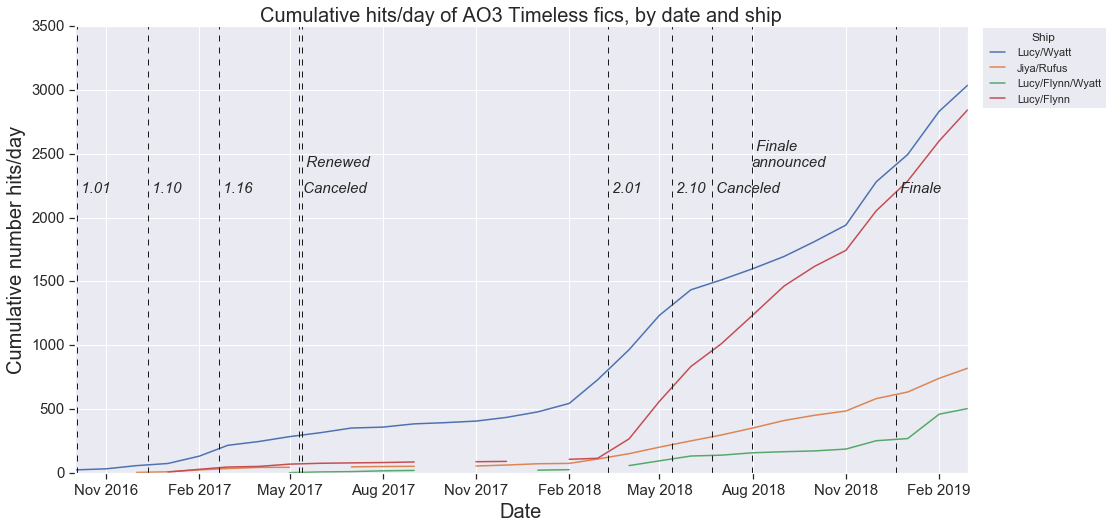

In [163]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(by_date["date"], by_date["LW_hits_normalized"], linestyle="-", label = "Lucy/Wyatt")
ax.plot(by_date["date"], by_date["JR_hits_normalized"], linestyle="-", label = "Jiya/Rufus")
ax.plot(by_date["date"], by_date["LFW_hits_normalized"], linestyle="-", label = "Lucy/Flynn/Wyatt")
ax.plot(by_date["date"], by_date["LF_hits_normalized"], linestyle="-", label = "Lucy/Flynn")

ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Cumulative number hits/day", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15, top=False, right=False)
ax.set_title("Cumulative hits/day of AO3 Timeless fics, by date and ship", fontsize=20)


for index, row in events.iterrows():
    
    if row["type"] != "ep" or row["event"] == "1.01" or row["event"] == "1.10" or\
    row["event"] == "1.16" or row["event"] == "2.01" or row["event"] == "2.10":
    
        ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
        ax.text(row["date"], row["y"]*2, (" " + row["event"]), fontsize=15, style="italic")

ax.legend(title="Ship", loc="upper left", bbox_to_anchor=(1.01,1.01));


##### and comments and kudos?

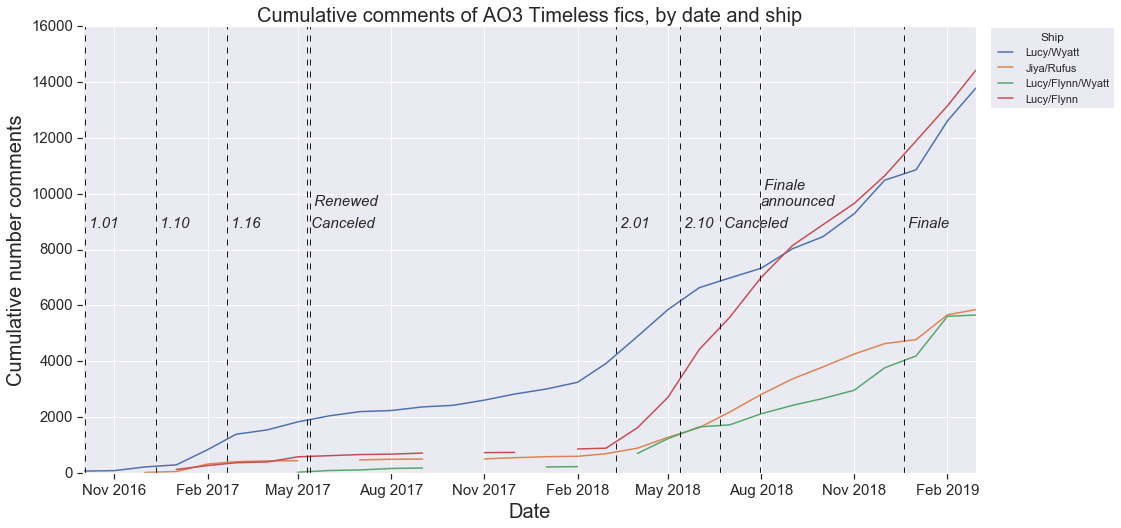

In [164]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(by_date["date"], by_date["LW_comments"], linestyle="-", label = "Lucy/Wyatt")
ax.plot(by_date["date"], by_date["JR_comments"], linestyle="-", label = "Jiya/Rufus")
ax.plot(by_date["date"], by_date["LFW_comments"], linestyle="-", label = "Lucy/Flynn/Wyatt")
ax.plot(by_date["date"], by_date["LF_comments"], linestyle="-", label = "Lucy/Flynn")

ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Cumulative number comments", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15, top=False, right=False)
ax.set_title("Cumulative comments of AO3 Timeless fics, by date and ship", fontsize=20)


for index, row in events.iterrows():
    
    if row["type"] != "ep" or row["event"] == "1.01" or row["event"] == "1.10" or\
    row["event"] == "1.16" or row["event"] == "2.01" or row["event"] == "2.10":
    
        ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
        ax.text(row["date"], row["y"]*8, (" " + row["event"]), fontsize=15, style="italic")

ax.legend(title="Ship", loc="upper left", bbox_to_anchor=(1.01,1.01));

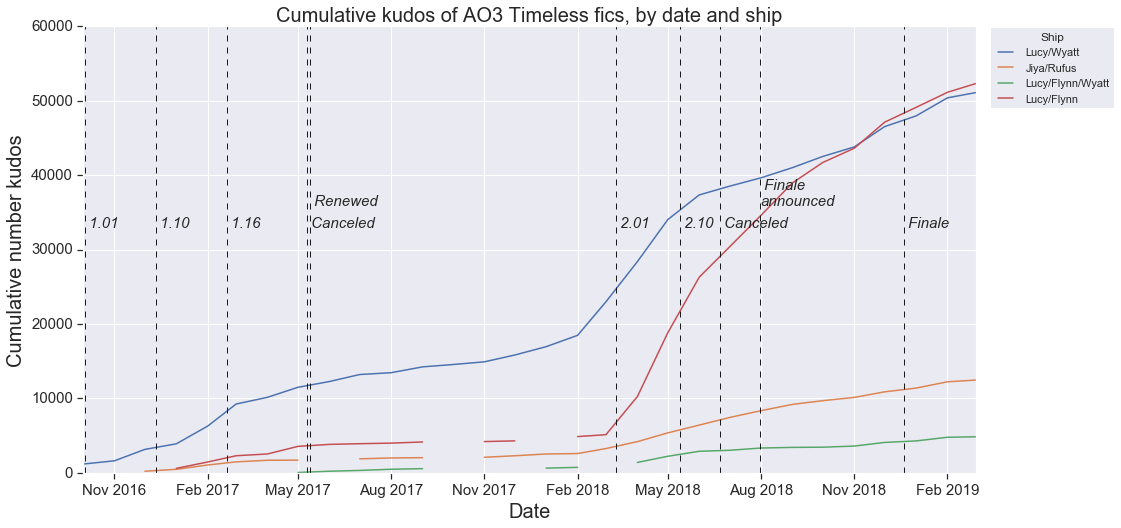

In [165]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(by_date["date"], by_date["LW_kudos"], linestyle="-", label = "Lucy/Wyatt")
ax.plot(by_date["date"], by_date["JR_kudos"], linestyle="-", label = "Jiya/Rufus")
ax.plot(by_date["date"], by_date["LFW_kudos"], linestyle="-", label = "Lucy/Flynn/Wyatt")
ax.plot(by_date["date"], by_date["LF_kudos"], linestyle="-", label = "Lucy/Flynn")

ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Cumulative number kudos", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15, top=False, right=False)
ax.set_title("Cumulative kudos of AO3 Timeless fics, by date and ship", fontsize=20)

for index, row in events.iterrows():
    
    if row["type"] != "ep" or row["event"] == "1.01" or row["event"] == "1.10" or\
    row["event"] == "1.16" or row["event"] == "2.01" or row["event"] == "2.10":
    
        ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
        ax.text(row["date"], row["y"]*30, (" " + row["event"]), fontsize=15, style="italic")

ax.legend(title="Ship", loc="upper left", bbox_to_anchor=(1.01,1.01));

##### kudos, normalized

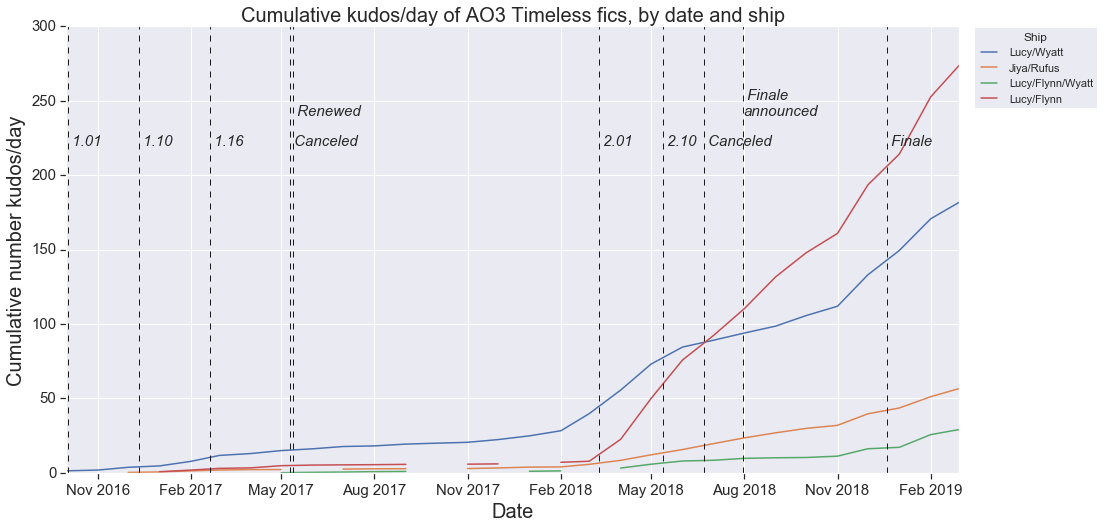

In [166]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(by_date["date"], by_date["LW_kudos_normalized"], linestyle="-", label = "Lucy/Wyatt")
ax.plot(by_date["date"], by_date["JR_kudos_normalized"], linestyle="-", label = "Jiya/Rufus")
ax.plot(by_date["date"], by_date["LFW_kudos_normalized"], linestyle="-", label = "Lucy/Flynn/Wyatt")
ax.plot(by_date["date"], by_date["LF_kudos_normalized"], linestyle="-", label = "Lucy/Flynn")

ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Cumulative number kudos/day", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15, top=False, right=False)
ax.set_title("Cumulative kudos/day of AO3 Timeless fics, by date and ship", fontsize=20)

for index, row in events.iterrows():
    
    if row["type"] != "ep" or row["event"] == "1.01" or row["event"] == "1.10" or\
    row["event"] == "1.16" or row["event"] == "2.01" or row["event"] == "2.10":
    
        ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
        ax.text(row["date"], row["y"]/5, (" " + row["event"]), fontsize=15, style="italic")

ax.legend(title="Ship", loc="upper left", bbox_to_anchor=(1.01,1.01));


##### what if I look at kudos/hit?

In [167]:
md["kudos/hit"] = md["kudos"] / md["hits"]

In [168]:
by_date.set_index("date", inplace=True)

In [169]:
by_date["LF_kudos_per_hit"] =\
md.loc[((md["LF"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["kudos/hit"].sum().cumsum()

by_date["LW_kudos_per_hit"] =\
md.loc[((md["LW"] == "yes") & (md["LFW"] == "no")),:].groupby('date')["kudos/hit"].sum().cumsum()

by_date["JR_kudos_per_hit"] =\
md.loc[((md["JR"] == "yes")),:].groupby('date')["kudos/hit"].sum().cumsum()

by_date["LFW_kudos_per_hit"] =\
md.loc[((md["LFW"] == "yes")),:].groupby('date')["kudos/hit"].sum().cumsum()

In [170]:
by_date.reset_index(inplace=True)

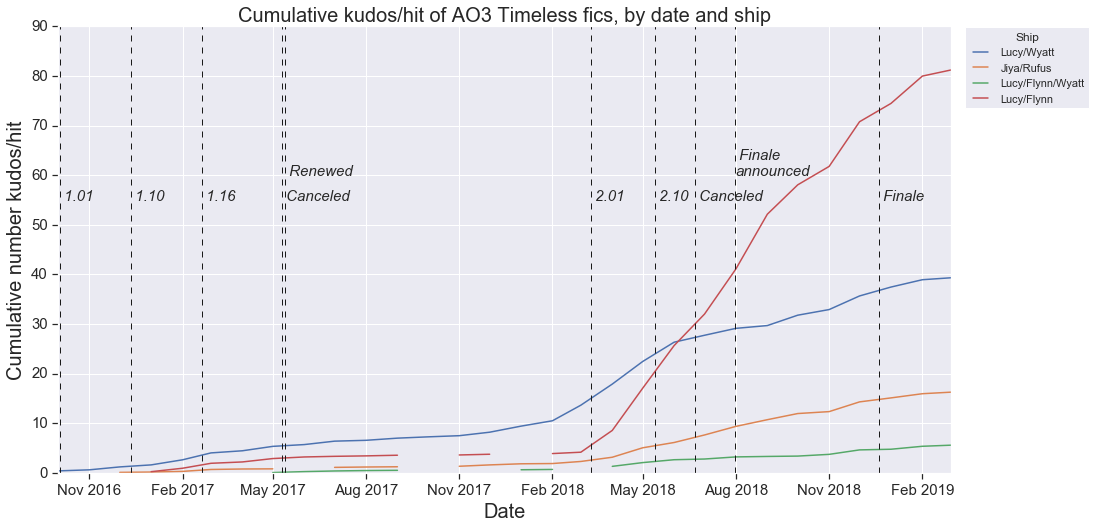

In [171]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(by_date["date"], by_date["LW_kudos_per_hit"], linestyle="-", label = "Lucy/Wyatt")
ax.plot(by_date["date"], by_date["JR_kudos_per_hit"], linestyle="-", label = "Jiya/Rufus")
ax.plot(by_date["date"], by_date["LFW_kudos_per_hit"], linestyle="-", label = "Lucy/Flynn/Wyatt")
ax.plot(by_date["date"], by_date["LF_kudos_per_hit"], linestyle="-", label = "Lucy/Flynn")

ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Cumulative number kudos/hit", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15, top=False, right=False)
ax.set_title("Cumulative kudos/hit of AO3 Timeless fics, by date and ship", fontsize=20)


for index, row in events.iterrows():
    
    if row["type"] != "ep" or row["event"] == "1.01" or row["event"] == "1.10" or\
    row["event"] == "1.16" or row["event"] == "2.01" or row["event"] == "2.10":
    
        ax.axvline(x = row["date"], color='k', linewidth=1, linestyle="--")
        ax.text(row["date"], row["y"]/20, (" " + row["event"]), fontsize=15, style="italic")

ax.legend(title="Ship", loc="upper left", bbox_to_anchor=(1.01,1.01));


In [172]:
md.sort_values("kudos/hit", ascending=False)

work_id                                              title  \
369   16644563                                    memory disorder   
272   17079512                                 Start of Something   
41    17898476                               a dustland fairytale   
109   17648360                     Time Leaves Us Polished Stones   
98    17706173                            Every Little Word I Say   
34    17826446                                        Sweet dream   
803   15487929                                           Umbrella   
223   17162153                                Not So Secret Santa   
73    17792558                                This Is How We Fall   
608   15924521                                     Frozen Mercury   
84    17770382                                       Never Forget   
403   16497890           God Only Knows (What I'd Be Without You)   
65    17797790                                           Oblivion   
42    17889152                 Of Broken Bottles and Tears Unshed   
70    17796365                 Happy Valentines Day, Garcia Flynn   
261   17100431                                           unspoken   
246   17131508                         I'll Be Home For Christmas   
147   17423066                                  The Solace of Tea   
217   17174621                                        Punch-Drunk   
436   16371953                           [VID] I Won't Waste Time   
242   17129936                         a man said to the universe   
202   17210282                                        As you wish   
90    17744030                               I'll Always Love You   
588   15946565                                              Lines   
69    17792267                                Tell Her Your Story   
81    17783438               herself (a shadow just out of range)   
59    17812328                                        Bitter Cold   
37    17903153            Put the Lonesome on the Shelf (You & I)   
141   17457446  we are all so caught up in our grief, in our p...   
544   16032275                              The Lincoln Deception   
...        ...                                                ...   
66    17700212                                            Chimera   
71    17795237                                         Unreliable   
266   16976502                                         Absolution   
278   15984929                                    Burgundy & Blue   
281   17056442                                Ch'ikh gub eto delo   
348   16754977                                 The Devil You Know   
370   16632314                          Tales from the Multiverse   
377   16586513                                       Clockblocked   
393   16523696                                         A New Hope   
416   16222583                                         New Normal   
472   16252025                          I Was In The Neighborhood   
644   15872283                       the way things could've gone   
830   15060320                           Lost. Gone. Disappeared.   
1201  14658444                              Man Out of Time(less)   
1215  14597811                            The Floor of the Bunker   
1294  14422380                         all these tears I've cried   
1343  14324724                      all my time (and all my love)   
1356  14292228                                 These Quiet Nights   
1364  10976637                                             Mobius   
1396  14171991                     sing while we're falling apart   
1425  14023767                     and darkness will be rewritten   
1532  13053210     The Late-Night Time Travelers' Philosophy Club   
1568  12546844  the depths of many marvelous moments seen all ...   
1654  10948239                                 Wyatt, Out Of Time   
1655  10930629                                  Where Did You Go?   
1723  10394160                               so difficult to talk   
1752 

##### with what fandoms does Timeless tend to overlap?

In [173]:
md["fandom"].value_counts()

Timeless (TV 2016)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

##### what about a word cloud of the summaries?

In [174]:
md["summary"]

0       Following the big revelation of her status to ...
1       Sequel to 'In Case You Forget Her' Now that Fl...
2       It was her luck that the guy she had to work w...
3       Something was going on with Lucy. Wyatt could ...
4       It's not romantic. ...It's not un romantic, ei...
5       If history is to change, let it change. If the...
6       Once upon a time in Rufus' Timeline, Lyatt wer...
7       ...of the people who many ways wandered while ...
8       Miss Lucy Preston does not need a husband. Nor...
9       A collection of smut prompts from Tumbler and/...
10        Garcy kiss and angst/fluff prompts from Tumblr.
11      Alternate Universe - Canon Divergence from 1x1...
12      Discovery of Witches AU. When Dr. Lucy Preston...
13      Assorted short ficlets and prompt fills from m...
14      Collaboratively written AU where Flynn and Luc...
15      Basically just wonderful, sometimes loving and...
16         Garcy Kisses. Prompts, orginal ideas... enjoy!
17      It was

##### missing values?

In [175]:
np.sum(md["summary"].isnull())

10

In [176]:
md.loc[md["summary"].isnull(),:]

work_id                                           title  \
297   16990002                            A Cough In The Night   
732   15698940         Stubborn. Tiny. Ferocious. Infuriating.   
937   15020696                                         Finally   
938   15020630                                      First Date   
1179  14677455                                        LIKE ICE   
1236  14569356                              Three More Minutes   
1742  11083524                                          "home"   
1754  10021412                               Back Through Time   
1757  10094861                         Just The Way Life Works   
1801   9587039  Cover art for 'All Tied Up and No Place to Go'   

                author                 rating  category              fandom  \
297   Gotta_Love_Garcy                 Mature  F/M, Gen  Timeless (TV 2016)   
732   Galaxy_Collector      General Audiences       F/M  Timeless (TV 2016)   
937   HunterSixtySeven  Teen And Up Audiences       F/M  Timeless (TV 2016)   
938   HunterSixtySeven      General Audiences       F/M  Timeless (TV 2016)   
1179  themidnightqueen                 Mature       F/F   Timeless - Fandom   
1236  themidnightqueen      General Audiences       NaN   Timeless - Fandom   
1742         rachelbee  Teen And Up Audiences       F/M  Timeless (TV 2016)   
1754    orphan_account      General Audiences       F/M  Timeless (TV 2016)   
1757    orphan_account  Teen And Up Audiences       F/M  Timeless (TV 2016)   
1801      uglybusiness                 Mature       M/M  Timeless (TV 2016)   

                                           relationship  \
297             Garcia Flynn/Lorena Flynn, Flynn Family   
732                           Garcia Flynn/Lucy Preston   
937   Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy P...   
938   Wyatt Logan & Lucy Preston, Wyatt Logan/Lucy P...   
1179                        Emma Whitmore/Jessica Logan   
1236                                                NaN   
1742                         Wyatt Logan & Lucy Preston   
1754  Garcia Flynn & Lucy Preston, Garcia Flynn/Lucy...   
1757  Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy...   
1801                           Garcia Flynn/Wyatt Logan   

                                              character  \
297              Garcia Flynn, Iris Flynn, Lorena Flynn   
732   Garcia Flynn, Lucy Preston, Wyatt Logan, Denis...   
937             Wyatt Logan, Lucy Preston, Rufus Carlin   
938                           Wyatt Logan, Lucy Preston   
1179                       Emma Whitmore, Jessica Logan   
1236                           Garcia Flynn, Iris Flynn   
1742                          Lucy Preston, Wyatt Logan   
1754  Wyatt Logan, Rufus Carlin, Lucy Preston, Garci...   
1757  Garcia Flynn, Lucy Preston, Wyatt Logan, Rufus...   
1801                          Garcia Flynn, Wyatt Logan   

                                        additional tags language    ...     \
297                                                 NaN  English    ...      
732   i don't usually write fluff, But Garcy brings ...  English    ...      
937                         Fluff, time team - Freeform  English    ...      
938                                   Fluff, First Date  English    ...      
1179  Mentioned Garcy, lowkey smut, Emma is worried ...  English    ...      
1236                                                NaN  English    ...      
1742                   Timeless Weekly Prompt Challenge  English    ...      
1754                                              garcy  English    ...      
1757                                  Ihadaneed, Ihadto  English    ...      
1801                                          Cover Art  English    ...      

       LF   LW  JW  JR LFW  date_published  days_up  hits_normalized  \
297    no   no  no  no  no      2018-12-01     95.0         1.221053   
732   yes   no  no  no  no      2018-08-01    217.0         1.714286   
937    no  yes  no  no  no      201

In [177]:
text = " ".join(str(item) for item in md["summary"])
len(text)

357006

(-0.5, 799.5, 399.5, -0.5)

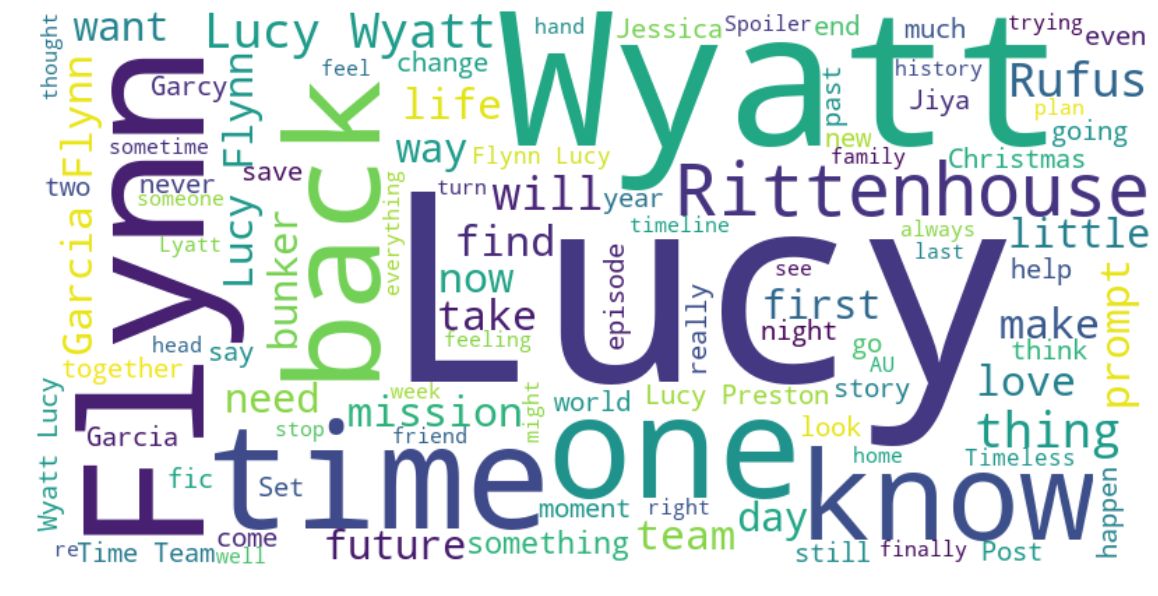

In [178]:
wordcloud = WordCloud(width=800, height=400, 
                      max_words=100, background_color="white").generate(text)
# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.show()
#plt.savefig("summaries_with_names_word_cloud.png", dpi=500, bbox_inches="tight")

##### and what if I mask names?

In [179]:
stopwords = set(STOPWORDS)
stopwords.update(["Lucy", "Garcia", "Flynn", "Wyatt", "Rufus","Jiya", " Lucy", "Lucy ", 
                  "Jessica","Preston", " Lucy ", "Logan", " Wyatt", "Wyatt ", " Wyatt",
                 "lucy","garcia","flynn","wyatt","rufus","jiya","Lucy's","Wyatt's","Flynn's",
                 "lucy's","wyatt's","flynn's"])

(-0.5, 799.5, 399.5, -0.5)

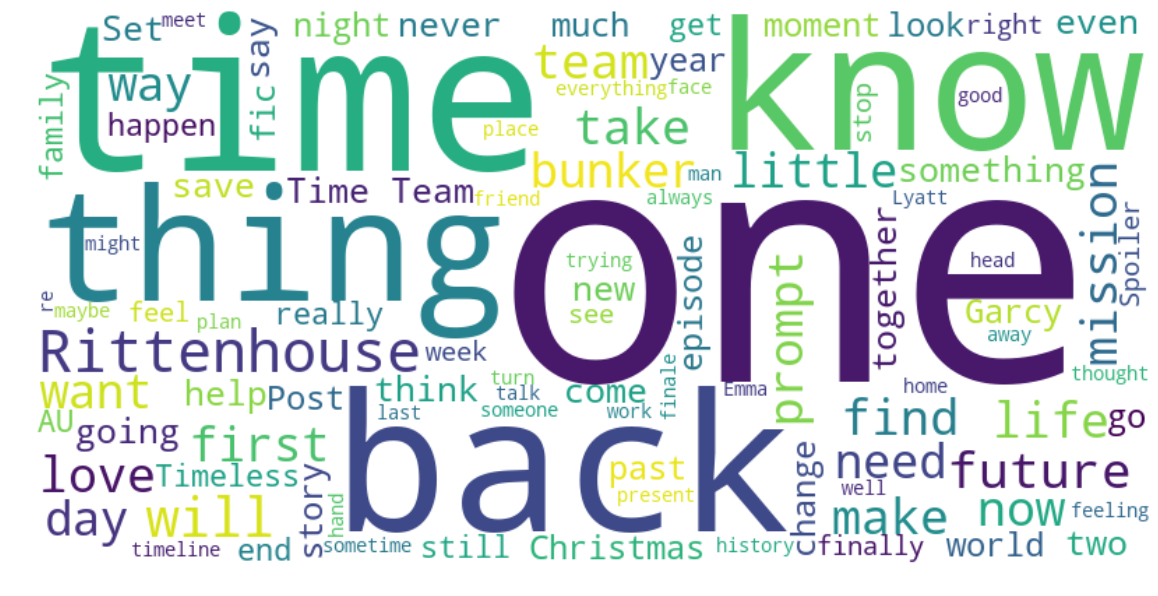

In [180]:
wordcloud = WordCloud(width=800, height=400,
                      stopwords=stopwords, max_words=100, 
                      background_color="white").generate(text)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig("summaries_word_cloud.png", dpi=500, bbox_inches="tight")

(-0.5, 799.5, 399.5, -0.5)

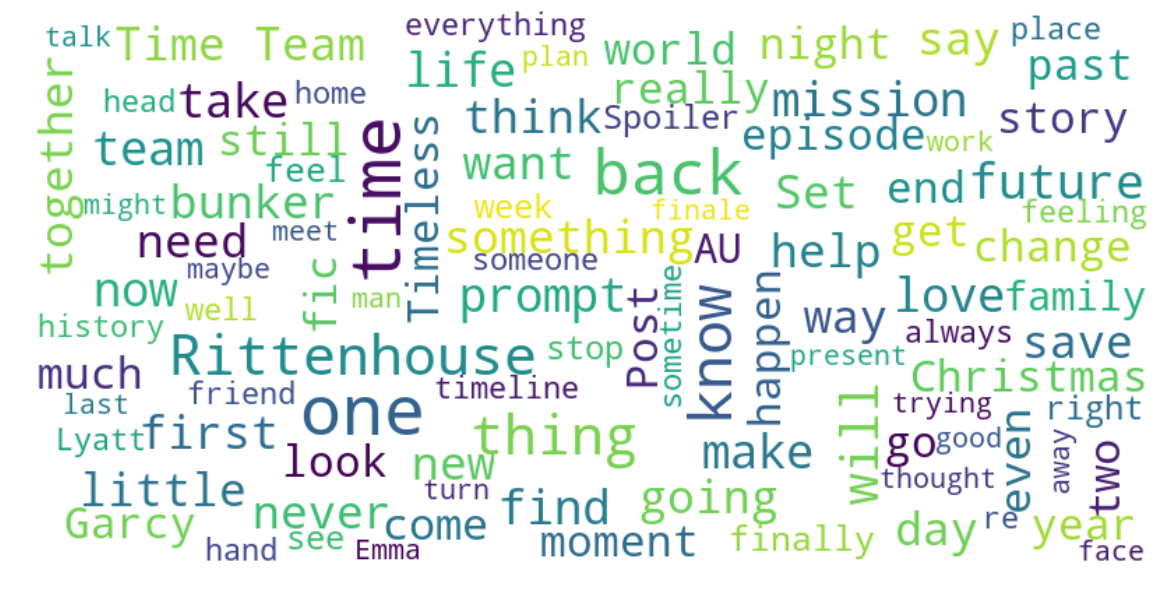

In [181]:
wordcloud = WordCloud(width=800, height=400,
                      stopwords=stopwords, max_font_size=50,
                      max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig("summaries_word_cloud_max_font_size.png", dpi=500, bbox_inches="tight")

(-0.5, 799.5, 399.5, -0.5)

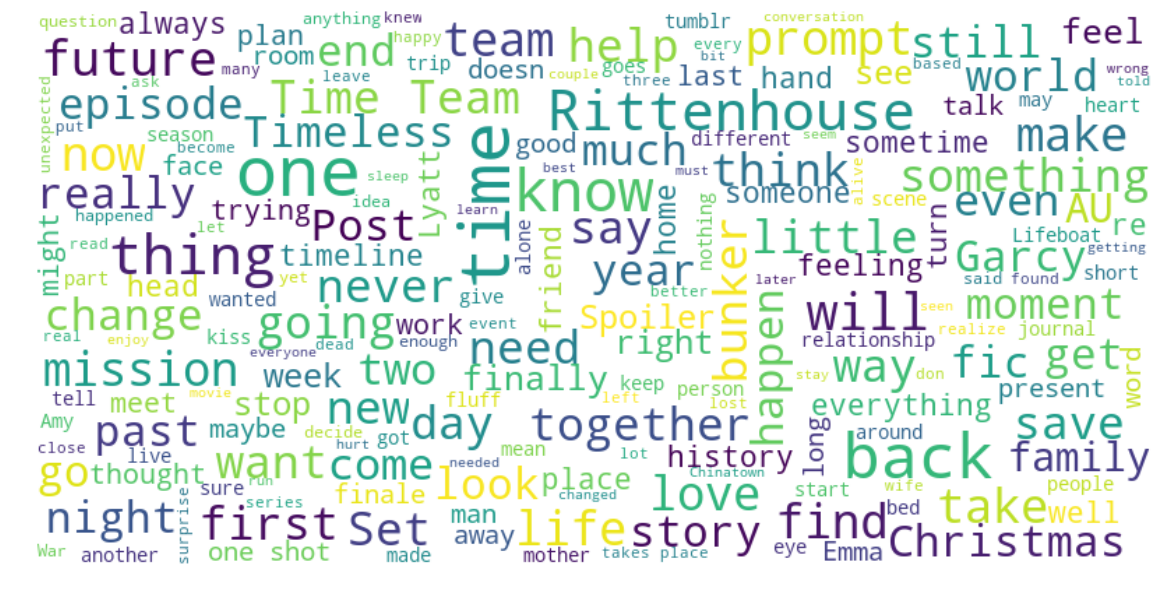

In [182]:
wordcloud = WordCloud(width=800, height=400,
                      stopwords=stopwords,
                      max_font_size=50, background_color="white").generate(text)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig("summaries_no_max_words_word_cloud.png", dpi=500, bbox_inches="tight")

(-0.5, 799.5, 399.5, -0.5)

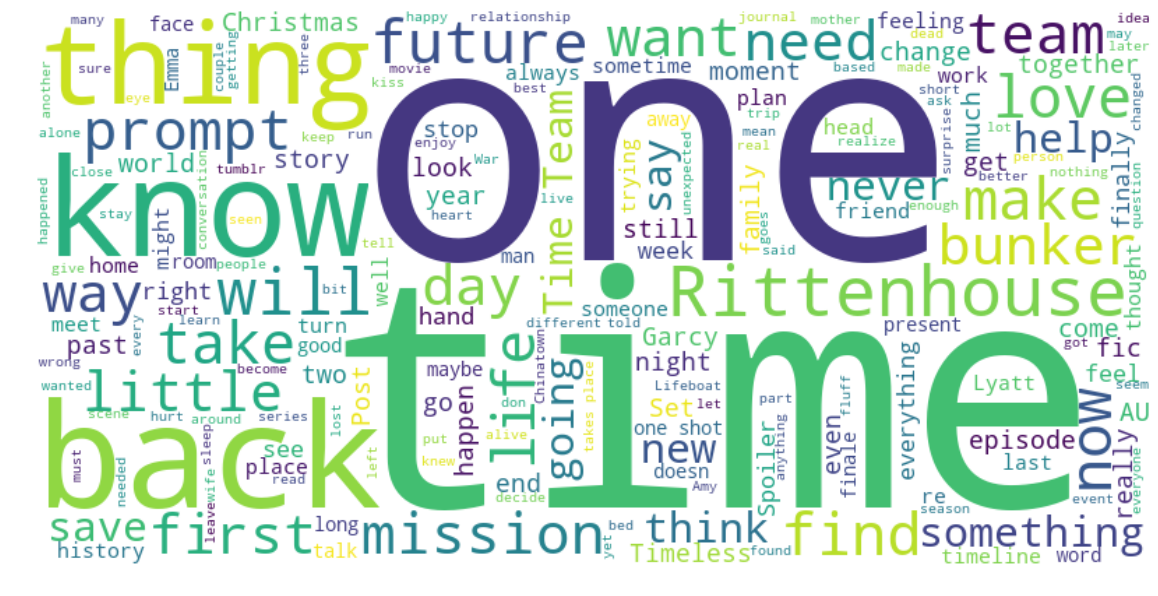

In [183]:
wordcloud = WordCloud(width=800, height=400,
                      stopwords=stopwords,
                      background_color="white").generate(text)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig("summaries_no_max_words_or_font_size_word_cloud.png", dpi=500, bbox_inches="tight")

##### what are the characteristics of fics/authors that tag with "bisexual," with LGBT* tags in general, or that write Denise/Michelle?

In [184]:
np.sum(((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual", case=False))))

33

In [185]:
md.loc[((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual", case=False))),["title","author",
                                                                   "additional tags","LF",
                                                                  "LW","JW","JR","LFW"]]

title  \
20                                        Ballet-Feerie   
36    the shadows spill across the floor (they're in...   
50         If They're Out of Lifejackets, Grab a Friend   
51                                     The Void is Open   
55                                   Oh, the Humanities   
102         If Poetry is the Food of Love... We're Sunk   
118   the thing with shadows is (they come from ligh...   
122                             The Governor's Daughter   
145                     Beat the Devil Around the Stump   
158                                               Sweat   
210                                         As an Ember   
287                                    Confidence Trick   
304                                     The Daily Grind   
330                                    Compared to What   
411                           Darkness Silence Solitude   
418                                             O Death   
526          This is a Theatre Department, Not a Circus   
644                        the way things could've gone   
742                could twist the sinews of thy heart?   
765                       Thunderclaps of Men's Despair   
767   An Explorer, an Adventurer, a Gunfighter, Some...   
803                                            Umbrella   
862                             The Temples are Falling   
926                                       The Top Shelf   
1066                  Cause You Know You're My Operator   
1070                                   A Hook in an Eye   
1121                                Stretch, Bend, Snap   
1122  In Which Wyatt Probably Listened to "Need You ...   
1233  Train Wrecks and Sexual Tension (Both End in a...   
1331                                Anything, Something   
1399                                        Revelations   
1426                    between the shadow and the soul   
1493         Your Hands Can Heal; Your Hands Can Bruise   

                               author  \
20    OldShrewsburyian, qqueenofhades   
36                   madsthenerdygirl   
50                   madsthenerdygirl   
51                   madsthenerdygirl   
55                   madsthenerdygirl   
102                  madsthenerdygirl   
118                  madsthenerdygirl   
122                  Gotta_Love_Garcy   
145                  madsthenerdygirl   
158                SugarsweetRomantic   
210                  madsthenerdygirl   
287                  madsthenerdygirl   
304                  madsthenerdygirl   
330                  madsthenerdygirl   
411                  madsthenerdygirl   
418                  madsthenerdygirl   
526                  madsthenerdygirl   
644     lucyprestons (leviosaphoenix)   
742                  madsthenerdygirl   
765                  madsthenerdygirl   
767                  madsthenerdygirl   
803                   thingswithwings   
862                  madsthenerdygirl   
926                   humongous_sheep   
1066                  Moonlightkitten   
1070                 madsthenerdygirl   
1121                 madsthenerdygirl   
1122                 madsthenerdygirl   
1233                 madsthenerdygirl   
1331                 madsthenerdygirl   
1399                     extasiswings   
1426                     extasiswings   
1493                   only_more_love   

                                        additional tags   LF   LW   JW   JR  \
20    Canon Lesbian Relationship, Canon Lesbian Char...  yes   no   no   no   
36    Oh god where do I even start, Sequel, Heavy BD...  yes  yes   no   no   
50    mentioned Homophobia, 3x09 Tag, Timeless Seaso...  yes  yes   no   no   
51    Alternate Universe - Canon Divergence, 1x10 Di...  yes  yes  yes  yes   
55    Alternate Universe - College/University, Alter...   no   no  yes   no   
102   Alternate Universe - High School, but plot twi...   no   no   no  yes   
118   Please Read Tags Carefully to Know What Kinks ...  yes   no   no   no   
122   Friends to

In [186]:
md.loc[((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual", case=False))),"LW"].value_counts()

no     17
yes    16
Name: LW, dtype: int64

In [187]:
md.loc[((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual", case=False))),"LFW"].value_counts()

yes    23
no     10
Name: LFW, dtype: int64

In [188]:
md.loc[((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual", case=False))),"LF"].value_counts()

yes    22
no     11
Name: LF, dtype: int64

In [189]:
md.loc[((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual", case=False)) &\
       (md["LFW"] == "no")),
       ["title","author","additional tags","LF","LW","LFW","JR","JW"]]

title  \
20                                        Ballet-Feerie   
118   the thing with shadows is (they come from ligh...   
122                             The Governor's Daughter   
158                                               Sweat   
644                        the way things could've gone   
803                                            Umbrella   
926                                       The Top Shelf   
1066                  Cause You Know You're My Operator   
1399                                        Revelations   
1426                    between the shadow and the soul   

                               author  \
20    OldShrewsburyian, qqueenofhades   
118                  madsthenerdygirl   
122                  Gotta_Love_Garcy   
158                SugarsweetRomantic   
644     lucyprestons (leviosaphoenix)   
803                   thingswithwings   
926                   humongous_sheep   
1066                  Moonlightkitten   
1399                     extasiswings   
1426                     extasiswings   

                                        additional tags   LF   LW LFW   JR  JW  
20    Canon Lesbian Relationship, Canon Lesbian Char...  yes   no  no   no  no  
118   Please Read Tags Carefully to Know What Kinks ...  yes   no  no   no  no  
122   Friends to Lovers, Kidnapping, Murder, Betraya...  yes   no  no   no  no  
158              Wyatt Logan's Bisexuality Crisis, Smut   no   no  no   no  no  
644                           Bisexual Female Character   no  yes  no   no  no  
803     Coming Out, Bisexual Character, Trans Character   no   no  no  yes  no  
926   Garcy Fluff, Tooth-Rotting Fluff, Cookies, six...  yes   no  no   no  no  
1066  Basically just a Jiya/Lucy centric fic, With o...  yes   no  no  yes  no  
1399  Developing Relationship, Angst, Implied/Refere...   no   no  no   no  no  
1426  Developing Relationship, First Time, Feelings,...  yes   no  no   no  no

In [190]:
np.sum(((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual|lesbian|gay|trans\b|lgbt", case=False))))

39

In [191]:
md.loc[((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual|lesbian|gay|trans\b|lgbt", case=False))),
       ["title","additional tags"]]

title  \
20                                        Ballet-Feerie   
36    the shadows spill across the floor (they're in...   
50         If They're Out of Lifejackets, Grab a Friend   
51                                     The Void is Open   
55                                   Oh, the Humanities   
102         If Poetry is the Food of Love... We're Sunk   
118   the thing with shadows is (they come from ligh...   
122                             The Governor's Daughter   
145                     Beat the Devil Around the Stump   
158                                               Sweat   
210                                         As an Ember   
287                                    Confidence Trick   
304                                     The Daily Grind   
330                                    Compared to What   
365   Teyshas, or, 5 Times Wyatt Logan Didn't Apolog...   
411                           Darkness Silence Solitude   
418                                             O Death   
526          This is a Theatre Department, Not a Circus   
644                        the way things could've gone   
742                could twist the sinews of thy heart?   
765                       Thunderclaps of Men's Despair   
767   An Explorer, an Adventurer, a Gunfighter, Some...   
768                                   Emergency Contact   
803                                            Umbrella   
818               and history immeasurably is wealthier   
862                             The Temples are Falling   
895                                          Debriefing   
926                                       The Top Shelf   
1066                  Cause You Know You're My Operator   
1070                                   A Hook in an Eye   
1113                                 [VID] The Greatest   
1121                                Stretch, Bend, Snap   
1122  In Which Wyatt Probably Listened to "Need You ...   
1233  Train Wrecks and Sexual Tension (Both End in a...   
1266                    sweet dreams (are made of this)   
1331                                Anything, Something   
1399                                        Revelations   
1426                    between the shadow and the soul   
1493         Your Hands Can Heal; Your Hands Can Bruise   

                                        additional tags  
20    Canon Lesbian Relationship, Canon Lesbian Char...  
36    Oh god where do I even start, Sequel, Heavy BD...  
50    mentioned Homophobia, 3x09 Tag, Timeless Seaso...  
51    Alternate Universe - Canon Divergence, 1x10 Di...  
55    Alternate Universe - College/University, Alter...  
102   Alternate Universe - High School, but plot twi...  
118   Please Read Tags Carefully to Know What Kinks ...  
122   Friends to Lovers, Kidnapping, Murder, Betraya...  
145   Trash ot3, Timeless (TV) Original Season 03, T...  
158              Wyatt Logan's Bisexuality Crisis, Smut  
210   Anastasia AU, Trash ot3, Wyatt Logan's Bisexua...  
287   Drug Runner AU, Trash ot3, Wyatt Logan's Bisex...  
304   The Requisite Coffeeshop AU, Because Every Shi...  
330   the man from uncle au, tmfu au, The Trash OT3 ...  
365   Canonical Character Death, POV Wyatt Logan, Te...  
411   Space Horror AU, Happy Halloween '18, Space zo...  
418   Until Dawn AU, rating is for violence, For Onc...  
526   Red the Blood of Angsty College Students, Blac...  
644                           Bisexual Female Character  
742   Wyatt Logan's Bisexuality Crisis, Angst, Heavy...  
765   Alternate Universe - Medieval, Alternate Unive...  
767   It's the Mummy AU I Promised, Buckle Up Butter...  
768   POV Female Character, Canon Lesbian Relationsh...  
803     Coming Out, Bisexual Character, Trans Character  
818   Team Feels, Post-Canon, Post-Traumatic Stress ...  
862   Alternate Universe - Apocalypse, Angst with a ...  
895   Post-Finale, Everyone Is Alive, Everyone Needs...  
926   Garcy Fluff, Tooth-Rotting Fluff, Cookies, six...  
1066  B

In [192]:
md.loc[((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual|lesbian|gay|trans\b|lgbt", case=False))),
       "additional tags"].values

array([ 'Canon Lesbian Relationship, Canon Lesbian Character, Alternate Universe, Pining, Mutual Pining, Ballet, Sister-Sister Relationship, Bechdel Test Pass, Grief/Mourning, Some Humor, Graduate School, Orphans, Past Violence, Female Friendship, Cooking, Bad Cooking, Food, Bisexual Lucy Preston, Canon Character of Color, Black Character(s), Friendship/Love, Emotional Hurt/Comfort, Repression, Touching, Winter, Family Feels, Light Angst, Self-Doubt, Books, Vodka, Historical References, Fluff and Angst, Loss of Parent(s), Chocolate, References to Canon, Kissing, Literary References & Allusions, Fairy Tale Logic',
       "Oh god where do I even start, Sequel, Heavy BDSM, Yes Stacy Returns, Triumphantly, As She Deserves, slight kid fic, Jess and Wyatt are Platonic Co-Parents, bit of a slow burn, Mutual Pining, Polyamory, Polyamory Negotiations, Wyatt Logan's Bisexuality Crisis, Wyatt Thinks They're Just Using Him For Sex, (Spoilers They're Not), (But It Sure Makes For Some Angst), Angst 

In [193]:
md.loc[((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual|lesbian|gay|trans\b|lgbt",
                                            case=False))),"LW"].value_counts(normalize=True)

no     0.589744
yes    0.410256
Name: LW, dtype: float64

In [194]:
md.loc[((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual|lesbian|gay|trans\b|lgbt",
                                            case=False))),"LFW"].value_counts(normalize=True)

yes    0.589744
no     0.410256
Name: LFW, dtype: float64

In [195]:
md.loc[((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual|lesbian|gay|trans\b|lgbt", 
                                            case=False))),"LF"].value_counts(normalize=True)

yes    0.641026
no     0.358974
Name: LF, dtype: float64

In [196]:
md["LF"].value_counts(normalize=True)

no     0.520999
yes    0.479001
Name: LF, dtype: float64

In [197]:
md["LW"].value_counts(normalize=True)

no     0.613503
yes    0.386497
Name: LW, dtype: float64

In [198]:
md.loc[((~ (md["additional tags"].isnull())) &\
        (md["additional tags"].str.contains("bisexual|lesbian|gay|trans\b|lgbt",
                                            case=False)) &\
       (md["LFW"] == "no")),
       ["title","author","additional tags","LF","LW","LFW","JR","JW"]]

title  \
20                                        Ballet-Feerie   
118   the thing with shadows is (they come from ligh...   
122                             The Governor's Daughter   
158                                               Sweat   
365   Teyshas, or, 5 Times Wyatt Logan Didn't Apolog...   
644                        the way things could've gone   
768                                   Emergency Contact   
803                                            Umbrella   
818               and history immeasurably is wealthier   
895                                          Debriefing   
926                                       The Top Shelf   
1066                  Cause You Know You're My Operator   
1113                                 [VID] The Greatest   
1266                    sweet dreams (are made of this)   
1399                                        Revelations   
1426                    between the shadow and the soul   

                               author  \
20    OldShrewsburyian, qqueenofhades   
118                  madsthenerdygirl   
122                  Gotta_Love_Garcy   
158                SugarsweetRomantic   
365                  OldShrewsburyian   
644     lucyprestons (leviosaphoenix)   
768                  OldShrewsburyian   
803                   thingswithwings   
818                  OldShrewsburyian   
895                  OldShrewsburyian   
926                   humongous_sheep   
1066                  Moonlightkitten   
1113                          bironic   
1266                         antigvne   
1399                     extasiswings   
1426                     extasiswings   

                                        additional tags   LF   LW LFW   JR  \
20    Canon Lesbian Relationship, Canon Lesbian Char...  yes   no  no   no   
118   Please Read Tags Carefully to Know What Kinks ...  yes   no  no   no   
122   Friends to Lovers, Kidnapping, Murder, Betraya...  yes   no  no   no   
158              Wyatt Logan's Bisexuality Crisis, Smut   no   no  no   no   
365   Canonical Character Death, POV Wyatt Logan, Te...   no   no  no  yes   
644                           Bisexual Female Character   no  yes  no   no   
768   POV Female Character, Canon Lesbian Relationsh...  yes   no  no   no   
803     Coming Out, Bisexual Character, Trans Character   no   no  no  yes   
818   Team Feels, Post-Canon, Post-Traumatic Stress ...  yes   no  no  yes   
895   Post-Finale, Everyone Is Alive, Everyone Needs...  yes   no  no  yes   
926   Garcy Fluff, Tooth-Rotting Fluff, Cookies, six...  yes   no  no   no   
1066  Basically just a Jiya/Lucy centric fic, With o...  yes   no  no  yes   
1113  Character(s) of Color, LGBTQ Character(s) of C...   no   no  no   no   
1266  i love my bi daughter lucy and my lesbian daug...   no   no  no   no   
1399  Developing Relationship, Angst, Implied/Refere...   no   no  no   no   
1426  Developing Relationship, First Time, Feelings,...  yes   no  no   no   

       JW  
20     no  
118    no  
122    no  
158    no  
365    no  
644    no  
768    no  
803    no  
818   yes  
895   yes  
926    no  
1066   no  
1113   no  
1266   no  
1399   no  
1426   no

##### and fics/authors that write Denise/Michelle?

In [199]:
md.loc[((md["relationship"].str.contains("Christopher/")) & (~ md["relationship"].isnull())),
      ["title","author","LF","LW","LFW","JR","JW"]]

title  \
7                          Tell Me, Oh Muse...   
12                      the alchemical wedding   
20                               Ballet-Feerie   
81        herself (a shadow just out of range)   
238            Our Pasts are Written in Pencil   
283                            Christmas Party   
299               A Time Team Family Christmas   
359            Make Amends With All My Shadows   
768                          Emergency Contact   
769                             Burn the Witch   
862                    The Temples are Falling   
895                                 Debriefing   
1095  slipping through my fingers all the time   
1101                     Living in the Present   
1144                                Mothership   
1403                             Possibilities   
1542                                      I Do   

                               author   LF   LW  LFW   JR   JW  
7                  SugarsweetRomantic  yes   no  yes  yes   no  
12                      qqueenofhades  yes   no   no  yes   no  
20    OldShrewsburyian, qqueenofhades  yes   no   no   no   no  
81                 SugarsweetRomantic   no   no   no   no   no  
238                           SSGarcy  yes   no   no  yes  yes  
283                             mks57  yes   no   no  yes   no  
299                             Ultra  yes   no   no  yes   no  
359                       deathmallow  yes   no   no  yes  yes  
768                  OldShrewsburyian  yes   no   no   no   no  
769             barefootwithneonhands  yes   no   no   no   no  
862                  madsthenerdygirl  yes  yes  yes  yes  yes  
895                  OldShrewsburyian  yes   no   no  yes  yes  
1095                 umbrellawarriors   no  yes   no  yes   no  
1101               TrueBelleoftheBall   no  yes   no  yes   no  
1144                      AVirtoMusae  yes   no   no  yes  yes  
1403                 distinctdarkness   no  yes   no  yes  yes  
1542                         stxpsign   no   no   no   no   no

In [200]:
md.loc[((md["relationship"].str.contains("Christopher/")) & (~ md["relationship"].isnull())),
      "LF"].value_counts(normalize=True)

yes    0.705882
no     0.294118
Name: LF, dtype: float64

In [201]:
md.loc[((md["relationship"].str.contains("Christopher/")) & (~ md["relationship"].isnull())),
      "LW"].value_counts(normalize=True)

no     0.764706
yes    0.235294
Name: LW, dtype: float64

In [202]:
md["LF"].value_counts(normalize=True)

no     0.520999
yes    0.479001
Name: LF, dtype: float64

In [203]:
md["LW"].value_counts(normalize=True)

no     0.613503
yes    0.386497
Name: LW, dtype: float64

##### what are the longest fics?

In [204]:
md.loc[:,
       ["work_id","title","author","relationship","additional tags","words"]].\
sort_values("words", ascending=False)

work_id                                              title  \
110   16230101                                   The Only Way Out   
359   14906831                    Make Amends With All My Shadows   
757   14813871                          Starlight & Strange Magic   
11    15292356                                            Torrent   
1204  13910544                   the tangled web of fate we weave   
5     15048743                                      Scars Of Time   
29    15297498                                       Consequences   
115    9555539                                             Timing   
276   15662283                                     The Procurator   
30    14425692                            Like a Dumpster on Fire   
392   13753707                                       Habit of You   
1194  10719312                                     Into the Light   
343   16788133                                          Space Run   
0     13235889                                       Phase Change   
118   17368805  the thing with shadows is (they come from ligh...   
1040   9883061                                            Prompts   
17    17161190                               whispers like poetry   
301   15760944                                 These Days of Dust   
1482   9795032                    (and perhaps it was) inevitable   
278   15984929                                    Burgundy & Blue   
1444  10438350                 these memories lose their meaning.   
45    16034894                              As Fate Would Have It   
614   14871735                              We'll Find Each Other   
12    17731016                             the alchemical wedding   
130   14699094                                        I will wait   
535   14309436                         The Life I Want (With You)   
101   15925325                        What Your Heart Is Made For   
345   15085127                                     Sand and Water   
626   14601678                               No End, No Beginning   
36    17630246  the shadows spill across the floor (they're in...   
...        ...                                                ...   
233   17149040                                Reunited in Fiction   
1094  14778419                  Forgiveness Comes Easier With Her   
596   15936254                                               Whys   
1598  11476011                                         Wundervoll   
485   16204424                                            Contact   
861   15279471                                        In His Arms   
1368  14257344                                           The Call   
1466  13790373                                    Asleep - Awoken   
1785   9855206                                  A Mistake is Made   
1568  12546844  the depths of many marvelous moments seen all ...   
1795   9633965                              With a Bottle of Beer   
1672  10847583                                             Mother   
821   15414330                                     Moving Forward   
1856   8570995                             Alone Again, Naturally   
816   15433035        The Space Between Us (or The Lack There Of)   
1771   9957398                                            The End   
1106  14764307                                           Betrayal   
1857   8558233                                    An Uneasy Start   
1698  10571094                                     Not Said to Me   
103   17677226                                          The Storm   
860   15279510                                              Again   
822   15414273                                             No SPA   
1428  14016336                                  A Force of Nature   
436   16371953                           [VID] I Won't Waste Time   
81    17783438               herself (a shadow just out of range)   
232   17149259                                    The RMS Titanic   
1841 

In [205]:
md.loc[:,
       ["work_id","title","author","relationship","additional tags","words"]].\
sort_values("words", ascending=False)[:10]["relationship"].values

array(['Rufus Carlin/Jiya, Garcia Flynn/Lucy Preston',
       'Garcia Flynn/Lucy Preston, Jessica Logan/Wyatt Logan, Rufus Carlin/Jiya Marri, Denise Christopher/Michelle Christopher, Garcia Flynn+Jiya Marri, Lucy Preston+Jiya Marri, Garcia Flynn+Wyatt Logan, Lucy Preston+Wyatt Logan',
       'Garcia Flynn/Lucy Preston', 'Wyatt Logan/Lucy Preston',
       'Garcia Flynn/Lucy Preston, Jessica Logan/Wyatt Logan, Garcia Flynn & Wyatt Logan',
       'OC/Flynn',
       'Garcia Flynn/Lucy Preston, Garcia Flynn & Lucy Preston, Rufus Carlin/Jiya',
       'Wyatt Logan/Lucy Preston, Wyatt Logan & Lucy Preston',
       'Garcia Flynn/Lucy Preston, Garcia Flynn & Iris Flynn',
       'Garcia Flynn/Lucy Preston, Garcia Flynn/Wyatt Logan/Lucy Preston, Wyatt Logan/Lucy Preston, Garcia Flynn/Wyatt Logan'], dtype=object)

##### who are the most prolific authors?

In [206]:
md.groupby('author')["words"].sum().sort_values(ascending=False)

author
madsthenerdygirl                               1021014
qqueenofhades                                   838548
angellwings                                     646545
Lyatt1941                                       405528
mks57                                           367701
SallyExactly                                    349564
OnceUponAWhim                                   284922
deathmallow                                     268195
Gotta_Love_Garcy                                198915
llmarmalade                                     181684
1SquealsnFeels                                  177935
extasiswings                                    168313
Somekindofflower                                137879
Zealprophet27                                   134715
rachelbee                                       132241
Mack_the_Spoon                                  132003
Namarie                                         131099
CindyRyan                                       128760
Red

##### attempt to norm the cooccur_df-- didn't work

In [207]:
cooccur_df_norm = cooccur_df.div(cooccur_df.sum(axis=1), axis=0)

In [208]:
cooccur_df_norm.loc[["garcy","lyatt"],:]

alternate universe  alternate universe - canon divergence     angst  \
garcy            0.010582                               0.005291  0.116402   
lyatt            0.010753                               0.010753  0.193548   

       angst with a happy ending  canon compliant  christmas   comfort  \
garcy                   0.031746         0.000000   0.026455  0.015873   
lyatt                   0.064516         0.021505   0.010753  0.000000   

         crack  domestic fluff     drama                ...                 \
garcy  0.05291        0.005291  0.005291                ...                  
lyatt  0.00000        0.010753  0.010753                ...                  

       pre-relationship  rittenhouse   romance  slow burn      smut  \
garcy          0.026455     0.015873  0.026455   0.010582  0.047619   
lyatt          0.000000     0.021505  0.118280   0.000000  0.032258   

       team as family  time travel  timeless fanfic prompts  whump  \
garcy             0.0     0.031746                 0.000000    0.0   
lyatt             0.0     0.000000                 0.010753    0.0   

       wyatt logan's bisexuality crisis  
garcy                               0.0  
lyatt                               0.0  

[2 rows x 48 columns]

In [209]:
cooccur_df.loc[["garcy","lyatt"],:]

alternate universe  alternate universe - canon divergence  angst  \
garcy                 2.0                                    1.0   22.0   
lyatt                 1.0                                    1.0   18.0   

       angst with a happy ending  canon compliant  christmas  comfort  crack  \
garcy                        6.0              0.0        5.0      3.0   10.0   
lyatt                        6.0              2.0        1.0      0.0    0.0   

       domestic fluff  drama                ...                 \
garcy             1.0    1.0                ...                  
lyatt             1.0    1.0                ...                  

       pre-relationship  rittenhouse  romance  slow burn  smut  \
garcy               5.0          3.0      5.0        2.0   9.0   
lyatt               0.0          2.0     11.0        0.0   3.0   

       team as family  time travel  timeless fanfic prompts  whump  \
garcy             0.0          6.0                      0.0    0.0   
lyatt             0.0          0.0                      1.0    0.0   

       wyatt logan's bisexuality crisis  
garcy                               0.0  
lyatt                               0.0  

[2 rows x 48 columns]

In [210]:
np.sum(cooccur_df["garcy"])

189.0

In [211]:
np.sum(cooccur_df["lyatt"])

93.0

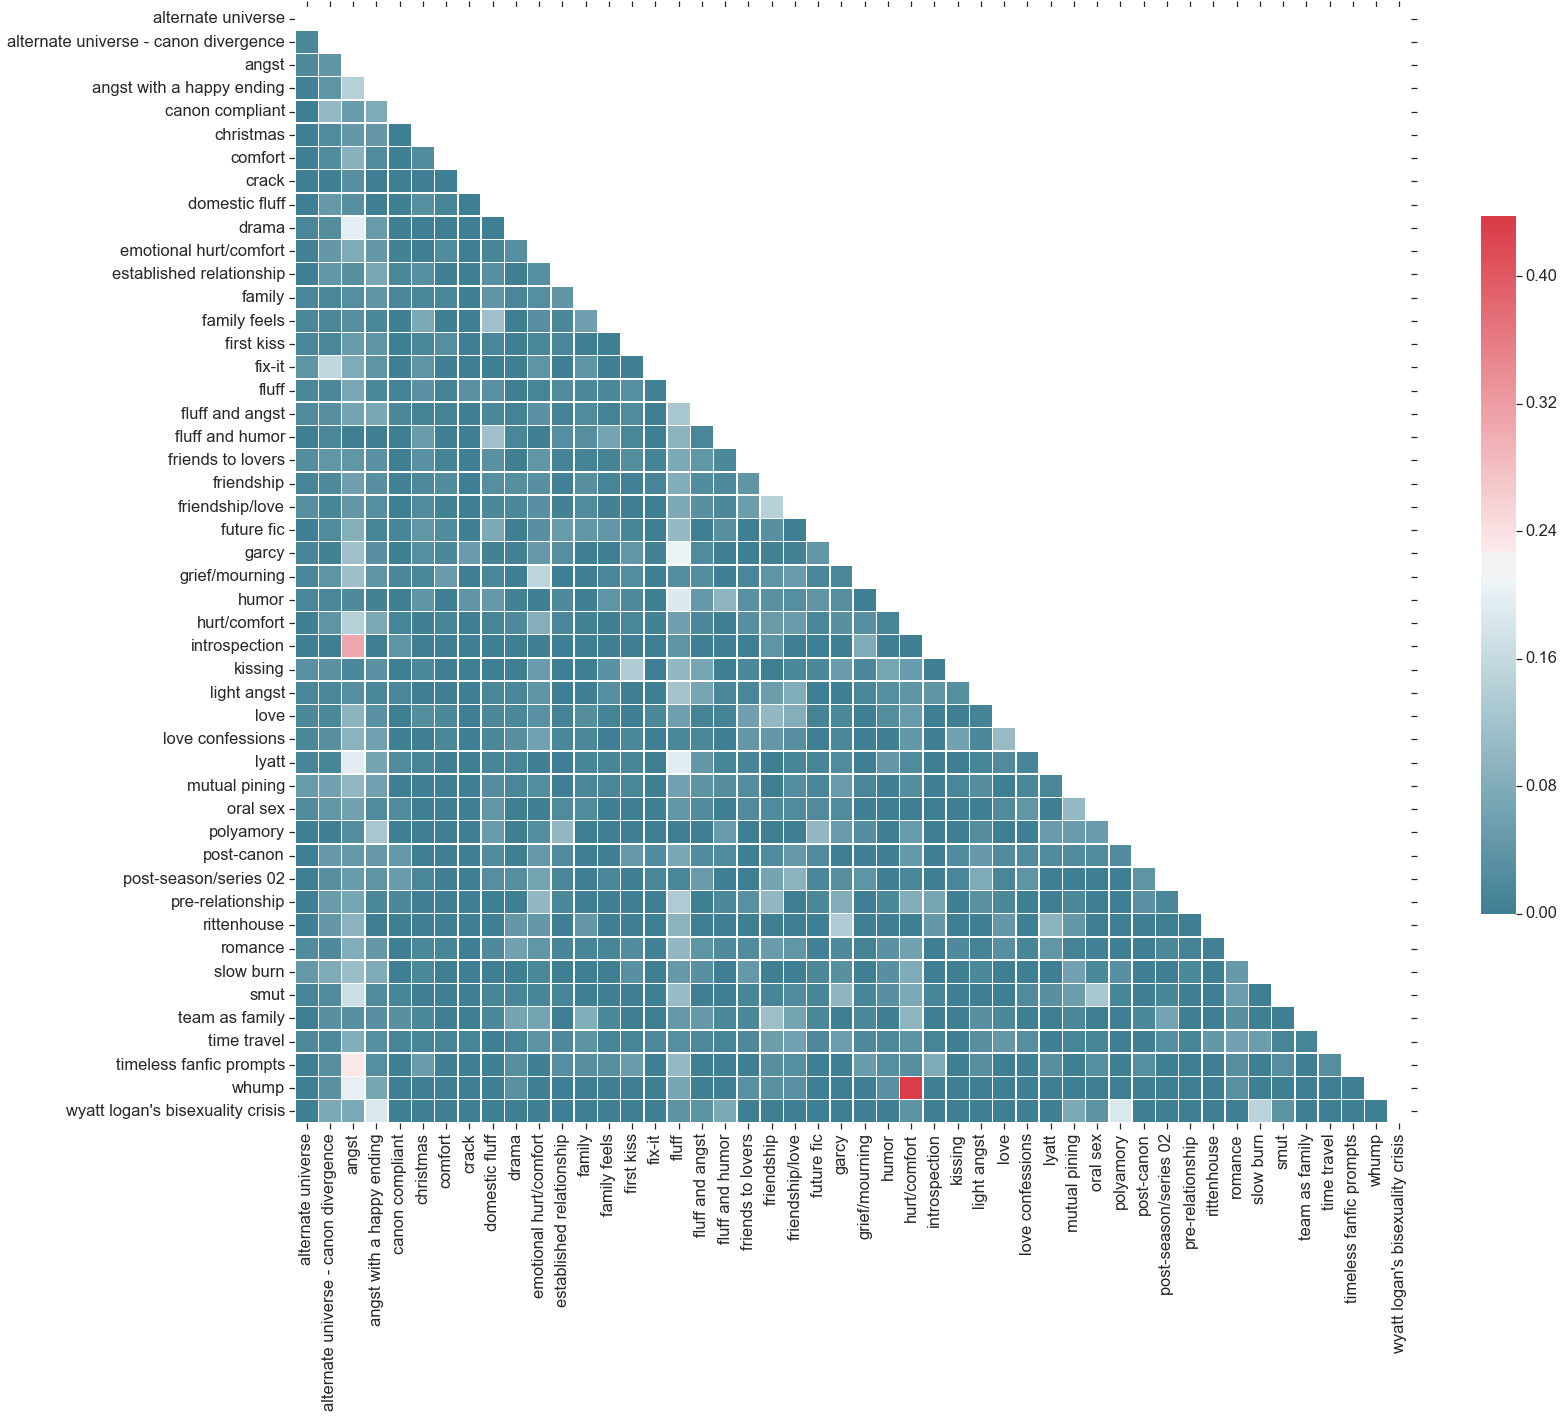

In [212]:
##from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", font_scale=1.5)

# Generate a mask for the upper triangle
mask = np.zeros_like(cooccur_df_norm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cooccur_df_norm, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

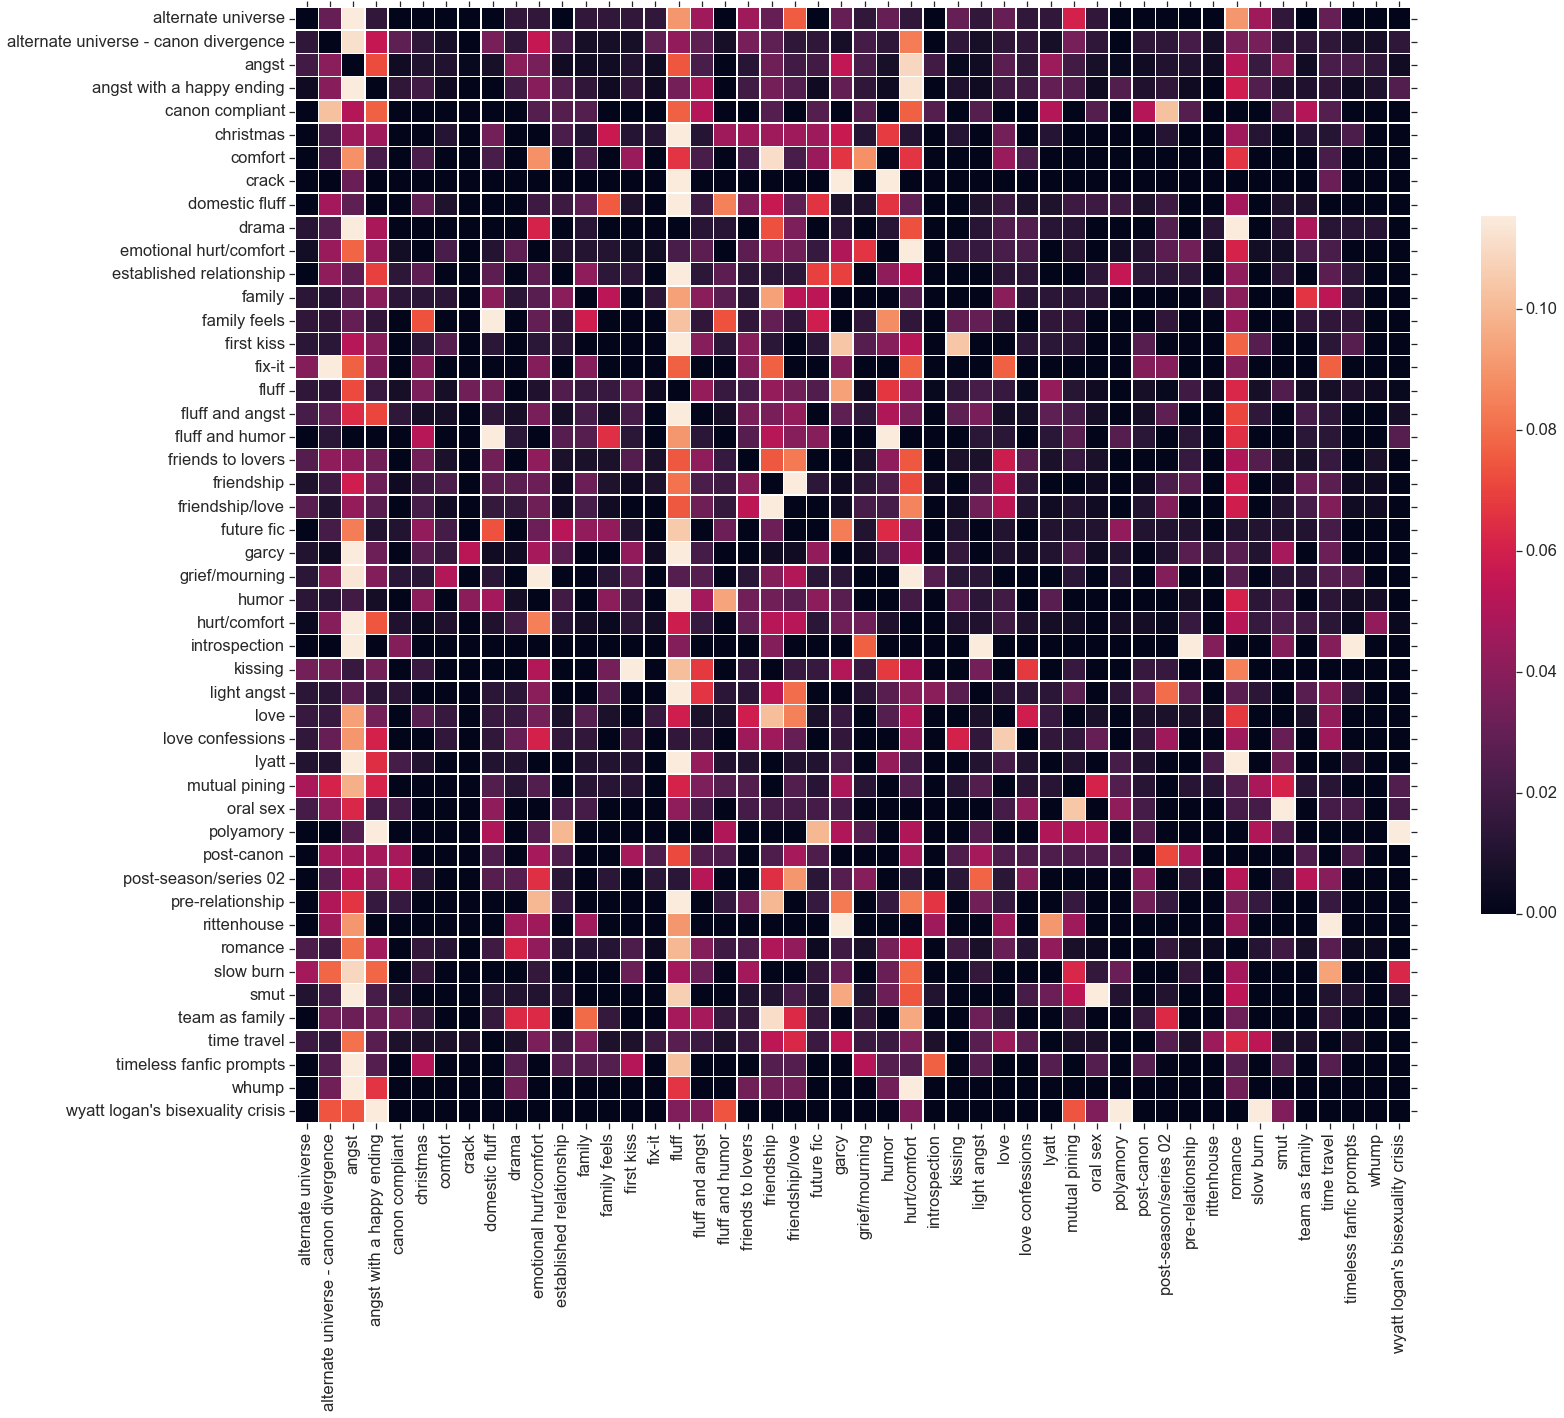

In [213]:
##from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", font_scale=1.5)
#sns.set(font_scale=1.4)

# Generate a mask for the upper triangle
mask = np.zeros_like(cooccur_df_norm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cooccur_df_norm, robust=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})